In [23]:
import numpy as np
import pandas as pd

DATASET_FILE_PATH: str = 'data/dataset.csv'

# Load dataset
dataset = pd.read_csv(DATASET_FILE_PATH)

# Define random seed
RANDOM_SEED: int = 42
np.random.seed(RANDOM_SEED)

### Loading the dataset
We are able to preview the contents of the dataset using head - a function to display the first **n** data points (default n = 5). Looking closely at the dataset, the dataset contains 21 features excluding the target. Some values consistent of values of either 0 or 1, denoting a binary flag of either true(1) or false(0) while other metrics cannot be measured by a binary flag like Age or BMI. In order to contextualize the non-binary values in relation to the rest of the data we need to utilize some normalization techniques that will appear in later sections. We'll additionally set the random seed to **42** to ensure reproducibility of the results.

In [2]:
# Preview the dataset
dataset.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

### Initial Data Analysis
To get a better understanding of how the features relate to the target we can plot a correlation matrix. A correlation matrix uses a method such as Pearson correlation coefficient to measure how two variables x, y scale linearly with one another. Techniques such as Logistic Regression rely on a strong linear relationship between a given feature and the target to accurately model their relationship and provide accurate predictions. Features with a higher correlation coefficient with the target are more likely to be important in predicting the target. For instance in our dataset, the feature High Blood Pressure (labeled HighBP) has a correlation coefficient of 0.21. Although this is a generally low correlation coefficient, relative to the other features in the dataset, it is the highest. Suggesting HighBP is a necessary component in predicting the target. To reduce the possibility of multicollinearity, we can remove features that have a high correlation with one another. Additionally, we can minimize overfitting by removing features that have a low correlation with the target and are less likely to be important in predicting the target. Finally, we can try to minimize subjective features as much as possible to reduce bias or extra noise in the dataset. Some immediate conclusions we can draw from the correlation matrix: Correlations between features and the target are generally low, many overlapping features exist, and there exist some negative correlations between the feature and the target such as Income or Education. 

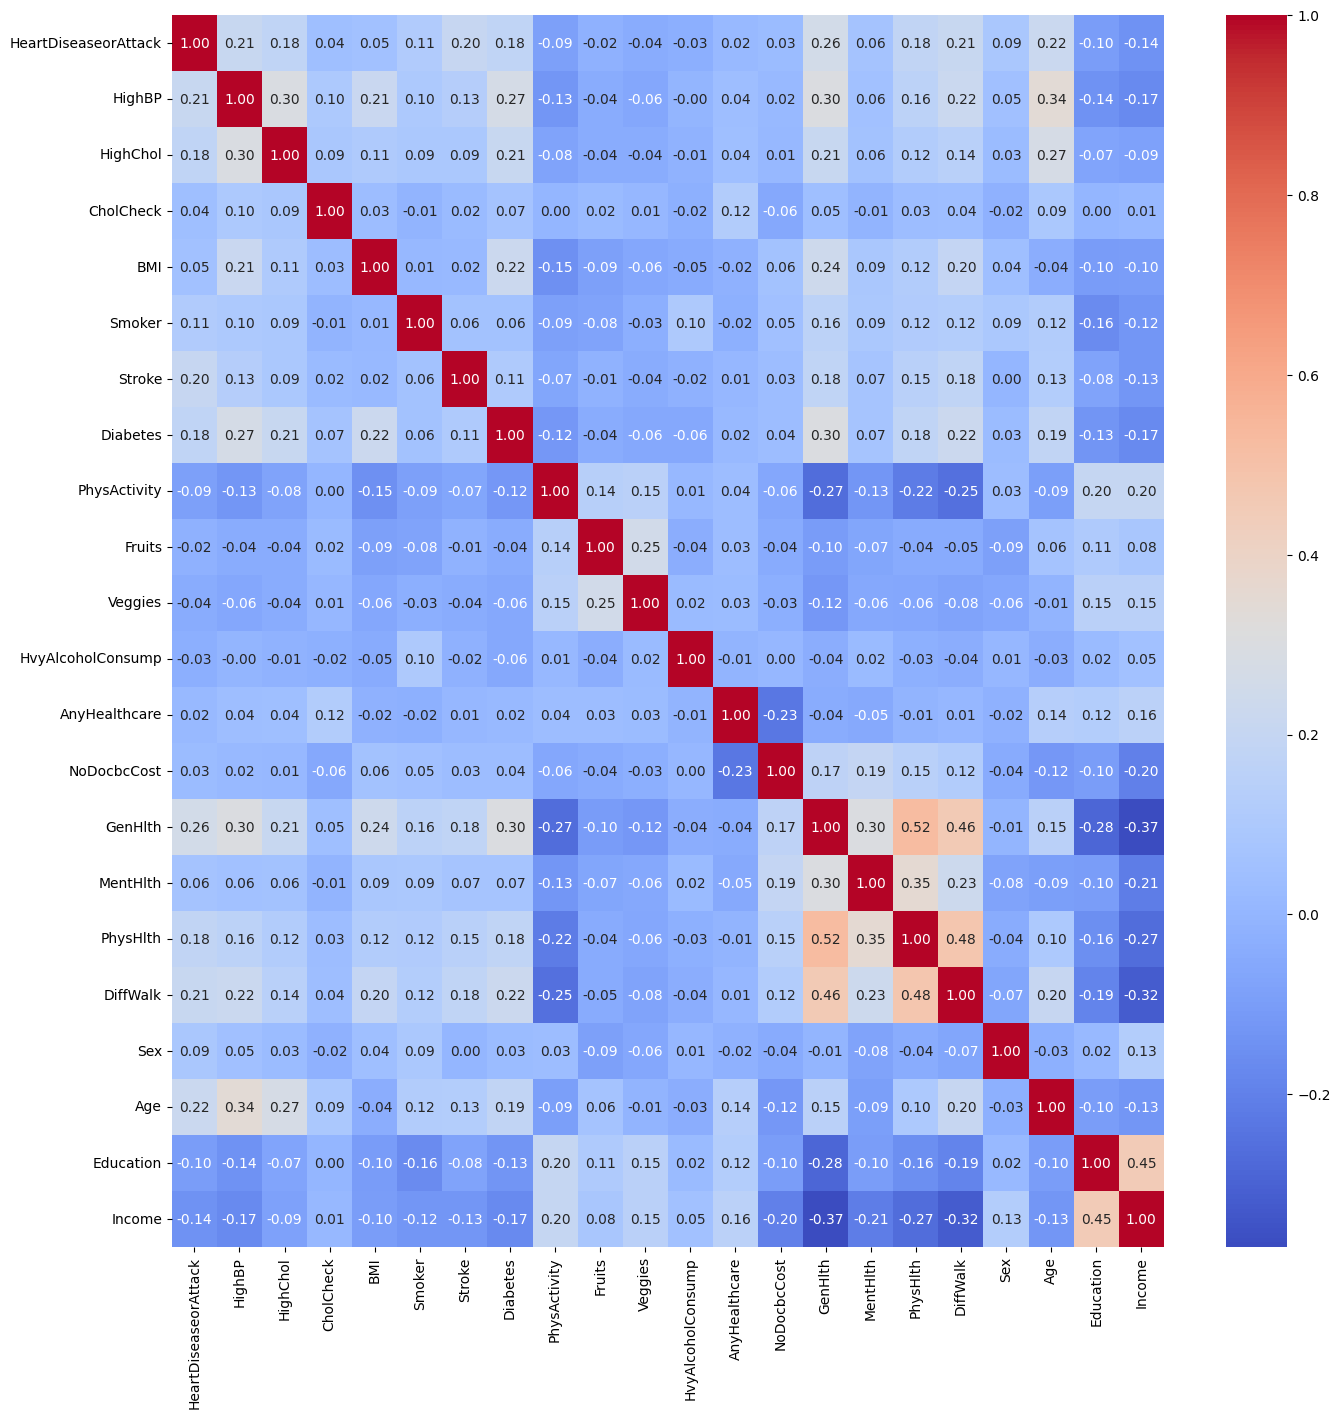

In [3]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [16]:
# Remove uncorrelated columns
cleaned_dataset = dataset.drop(columns=['Sex', 'HvyAlcoholConsump', 'BMI', 'AnyHealthcare', 'Fruits', 'Veggies', 'NoDocbcCost', 'MentHlth', 'CholCheck', "GenHlth", "Education", "Income", "PhysActivity"])

# Preview the dataset
cleaned_dataset.head()

HeartDiseaseorAttack  HighBP  HighChol  Smoker  Stroke  Diabetes  PhysHlth  \
0                   0.0     1.0       1.0     1.0     0.0       0.0      15.0   
1                   0.0     0.0       0.0     1.0     0.0       0.0       0.0   
2                   0.0     1.0       1.0     0.0     0.0       0.0      30.0   
3                   0.0     1.0       0.0     0.0     0.0       0.0       0.0   
4                   0.0     1.0       1.0     0.0     0.0       0.0       0.0   

   DiffWalk   Age  
0       1.0   9.0  
1       0.0   7.0  
2       1.0   9.0  
3       0.0  11.0  
4       0.0  11.0

### Data cleaning and preprocessing
After our initial data analysis, we can remove features characterized by a low correlation with the target, features that have a high correlation with one another, and features that are subjective. We can also remove any missing values in the dataset. We can also normalize the data to ensure that all features are on the same scale. Normalization is important because it ensures that each feature contributes equally to the model. For instance, if we have a feature that ranges from 0 to 1000 and another feature that ranges from 0 to 1, the model will give more weight to the feature that ranges from 0 to 1000. Normalization ensures that the model does not give more weight to a feature simply because it has a larger range. Normalization also ensures features are contextualized with respect to other data observations. We'll utilize a method known as Min-Max scaling to normalize the data. Min-Max scaling scales the data to a fixed range, usually between 0 and 1. This is done by subtracting the minimum value of the feature and dividing by the range of the feature.

In [17]:
# Normalize the dataset using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Transform only phys hlth and age
cleaned_dataset[['PhysHlth', 'Age']] = scaler.fit_transform(cleaned_dataset[['PhysHlth', 'Age']])
normalized_dataset = cleaned_dataset

# Preview the dataset
normalized_dataset.head()

HeartDiseaseorAttack  HighBP  HighChol  Smoker  Stroke  Diabetes  PhysHlth  \
0                   0.0     1.0       1.0     1.0     0.0       0.0       0.5   
1                   0.0     0.0       0.0     1.0     0.0       0.0       0.0   
2                   0.0     1.0       1.0     0.0     0.0       0.0       1.0   
3                   0.0     1.0       0.0     0.0     0.0       0.0       0.0   
4                   0.0     1.0       1.0     0.0     0.0       0.0       0.0   

   DiffWalk       Age  
0       1.0  0.666667  
1       0.0  0.500000  
2       1.0  0.666667  
3       0.0  0.833333  
4       0.0  0.833333

### Final Data Analysis
Now, after normalizing features and removing unnecessary features, we can re-verify the validity of our data by replotting the correlation matrix. Although some features still share some correlation, through reasoning we can determine some features are inherently correlated even though they are somewhat independent. For instance, the feature HighBP and Cholesterol are correlated because HighBP can be caused by high cholesterol. But removing one of these features would only make our model more inaccurate as they are both independent features with importance to the overall prediction.

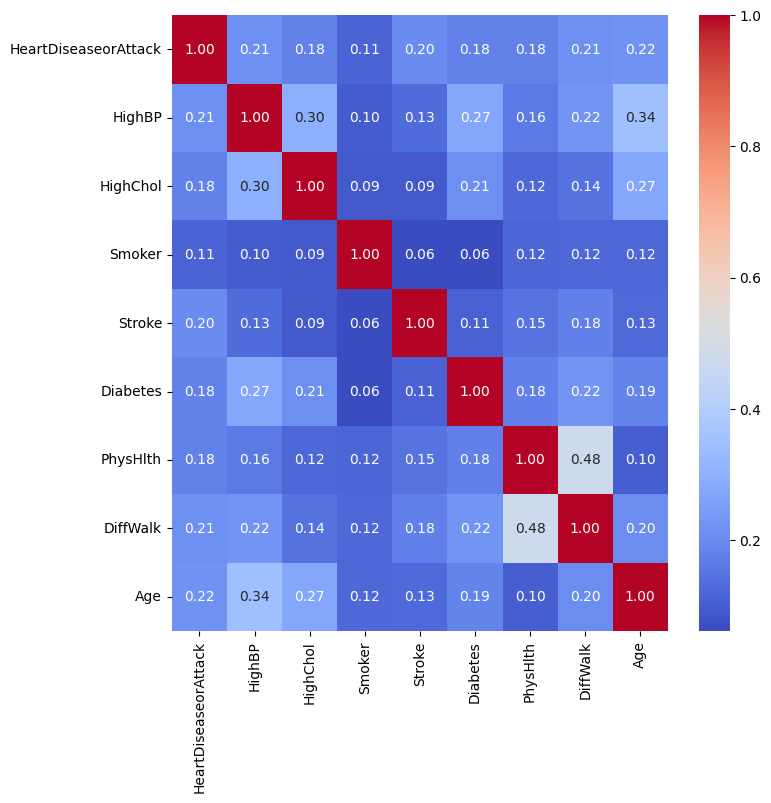

In [18]:
# Plot the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(normalized_dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### Data Splitting and Output Label Encoding
After cleaning and preprocessing the data, we can split the data into training and testing sets. We can then encode the target labels to ensure that the model can understand the target labels. We can use a method known as Label Encoding to convert the target labels into a numerical format. Label Encoding is a technique used to convert categorical data into numerical data. For instance, if we have a target label that consists of the values "Yes" and "No", we can convert these values into 1 and 0 respectively. This allows the model to understand the target labels and make predictions based on the numerical values. We can then train the model on the training data and evaluate the model on the testing data. We'll use a test size of 0.2 to ensure that 20% of the data is used for testing and 80% of the data is used for training. We'll also set the random seed to our predefined value of 42 to ensure reproducibility of the results.

In [26]:
# Test multiple classification models on the cleaned dataset, first let's split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = normalized_dataset.drop(columns=['HeartDiseaseorAttack'])
y = normalized_dataset['HeartDiseaseorAttack']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

### Training Multiple Classification Models
After splitting the data and encoding the target labels, we can train multiple classification models on the training data. We can use models such as Logistic Regression, Random Forest, and Support Vector Machine to make predictions on the testing data. We can then evaluate the performance of each model using metrics such as accuracy, precision, recall, and F1 score. These metrics provide a measure of how well the model is performing on the testing data. For instance, accuracy measures the percentage of correct predictions made by the model, precision measures the percentage of true positive predictions made by the model, recall measures the percentage of true positive predictions made by the model, and F1 score is the harmonic mean of precision and recall. We can use these metrics to determine which model is performing the best on the testing data and make predictions on new data based on the best performing model. Notice we are using an extra parameters "class_weights" in the Logistic Regression model to account for the imbalanced nature of the dataset. This is because the dataset contains more negative samples than positive samples. By using class weights, we can give more importance to the positive samples and ensure that the model is not biased towards the negative samples. This will help improve the performance of the model on the testing data. In our specific application, we want to try to minimize false negatives while maximizing accuracy. Viewing the problem through a medical perspective justifies our approach; patients who are falsely diagnosed as not having a heart disease could potentially lead to fatal consequences. Getting a further evaluation from a medical professional regardless of a false positive is a much safer approach. 

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

class_weights = {
    0: normalized_dataset.shape[0] / (2 * np.bincount(y)[0]),
    1: normalized_dataset.shape[0] / (2 * np.bincount(y)[1])
}

for model_name, model in models.items():
    try:
        model.set_params(class_weight=class_weights, random_state=RANDOM_SEED)
    except:
        model.set_params(random_state=RANDOM_SEED)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} classification report:')
    print(classification_report(y_test, y_pred))
    print(f'{model_name} confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()

    # save the model to pickle file
    import pickle
    with open(f'models/{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)


Logistic Regression accuracy: 0.730861715547146
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Logistic Regression confusion matrix:
[[33395 12573]
 [ 1082  3686]]

Random Forest accuracy: 0.7385879848628193
Random Forest classification report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     45968
           1       0.22      0.70      0.34      4768

    accuracy                           0.74     50736
   macro avg       0.59      0.72      0.59     50736
weighted avg       0.89      0.74      0.79     50736

Random Forest confusion matrix:
[[34124 11844]
 [ 1419  3349]]

Gradient Boosting accuracy: 0.90742273730

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy: 0.9072256385998108
AdaBoost classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45968
           1       0.53      0.11      0.19      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.55      0.57     50736
weighted avg       0.88      0.91      0.88     50736

AdaBoost confusion matrix:
[[45485   483]
 [ 4224   544]]

Support Vector Machine accuracy: 0.6949503311258278
Support Vector Machine classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.74      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Support Vector Machine confusion matrix:
[[31419 14549]
 [  928  3840]]

Decision Tree accuracy: 0.7225835698517817
Dec

### Defining a weighted binary cross-entropy loss function
We can define a weighted binary cross-entropy loss function to account for the imbalanced nature of the dataset. The weighted binary cross-entropy loss function assigns different weights to the positive and negative samples in the dataset. This allows the model to give more importance to the positive samples and ensure that the model is not biased towards the negative samples. Specifically, we'll use the following function when training the Neural Networks in later sections.

In [29]:
# Since sklearn doesn't support class weights for MLPClassifier, we will use tensorflow to build a neural network model
import tensorflow as tf

def weighted_binary_crossentropy(weights):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        weights_v = y_true * weights[1] + (1. - y_true) * weights[0]
        return tf.keras.backend.binary_crossentropy(y_true, y_pred) * weights_v
    return loss

### Defining a series of Neural Networks
A library known as Tensorflow simplifies the process of creating Neural Networks. Neural Networks vary in performance based on numerous factors such as the number of layers, the number of neurons in each layer, the activation function, the optimizer, and dropout. First, we can define a set of multiple neural networks - focusing on the number of layers and neurons in each layer in addition to the dropout. For classification tasks, normally activations such as ReLU are used in hidden layers while the sigmoid activation is used in the output layer. The sigmoid activation function is used in the output layer because it outputs a value between 0 and 1, which is suitable for binary classification tasks. ReLU is used in hidden layers because it is computationally efficient and helps the model learn complex patterns in the data. Dropout is used to prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training. This helps the model generalize better to new data and improve performance on the testing data.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

tensorflow_models = {
    'Neural Network 1': Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    'Neural Network 2': Sequential([
        Dense(128, activation='relu', input_shape=(X.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    'Neural Network 3 with Dropout': Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'Neural Network 4 with Dropout': Sequential([
        Dense(128, activation='relu', input_shape=(X.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'Neural Network 5': Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-07 04:10:56.535368: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-07 04:10:56.758291: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-07 04:10:56.758372: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/nu

### Using Grid Search to find the best Neural Network
We can train the neural networks on the training data and evaluate the performance of each neural network on the testing data using constants for the number of epochs, batch size, and validation split. In the context of training neural networks, an epoch is one complete pass through the training data, batch size is the number of samples processed before the model is updated, and validation split is the fraction of the training data to be used as validation data. All these are known as hyperparameters and can be tuned to improve the performance of the model. We can use a technique known as Grid Search to find the best hyperparameters for the neural networks. Grid Search is a technique used to find the best hyperparameters for a model by searching through a grid of hyperparameters and evaluating the performance of the model on the testing data. Since we defined 11 hyperparameters for each of the 5 neural networks, we'll need to tune 48 hyperparameters in total. So we'll need to train a total of 240 neural network models to find the best hyperparameters. We can then use the best hyperparameters to train the final neural network model and make predictions on new data.

In [36]:
results = {}

grid_params = {
    "batch_size": [16, 32, 64, 128],
    "epochs": [5, 10, 15, 20],
    "validation_split": [0.1, 0.2, 0.3]
}

# Grid search for hyperparameter tuning for the tensorflow models above and save the best model
from sklearn.model_selection import ParameterGrid
import pickle

for model_name, model in tensorflow_models.items():
    for params in ParameterGrid(grid_params):
        print(f'Training {model_name} with params: {params}...')
        model.compile(optimizer=Adam(),
                    loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
                    metrics=['accuracy'])
        model.summary()

        model.fit(X_train, y_train, **params)

        y_pred = model.predict(X_test)
        y_pred = np.round(y_pred)

        accuracy = accuracy_score(y_test, y_pred)

        results[f'{model_name}-{params["batch_size"]}-{params["epochs"]}-{params["validation_split"]}'] = {
            'model': model,
            'accuracy': accuracy,
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'params': params
        }

        with open(f'models/{model_name}-{params["batch_size"]}-{params["epochs"]}-{params["validation_split"]}.pkl', 'wb') as file:
            pickle.dump(model, file)

Training Neural Network 1 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.1}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7110 - loss: 0.5100 - val_accuracy: 0.7104 - val_loss: 0.5164
Epoch 2/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7137 - loss: 0.5054 - val_accuracy: 0.6847 - val_loss: 0.5162
Epoch 3/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7102 - loss: 0.5096 - val_accuracy: 0.6985 - val_loss: 0.5160
Epoch 4/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7135 - loss: 0.5085 - val_accuracy: 0.6995 - val_loss: 0.5237
Epoch 5/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7078 - loss: 0.5093 - val_accuracy: 0.6887 - val_loss: 0.5174
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step
Training Neural Network 1 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7098 - loss: 0.5126 - val_accuracy: 0.7234 - val_loss: 0.5132
Epoch 2/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7116 - loss: 0.5090 - val_accuracy: 0.7156 - val_loss: 0.5128
Epoch 3/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7139 - loss: 0.5030 - val_accuracy: 0.6942 - val_loss: 0.5137
Epoch 4/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7127 - loss: 0.5085 - val_accuracy: 0.7171 - val_loss: 0.5170
Epoch 5/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7077 - loss: 0.5106 - val_accuracy: 0.7308 - val_loss: 0.5142
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step
Training Neural Network 1 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7134 - loss: 0.5116 - val_accuracy: 0.7432 - val_loss: 0.5233
Epoch 2/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7115 - loss: 0.5042 - val_accuracy: 0.7206 - val_loss: 0.5159
Epoch 3/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7086 - loss: 0.5094 - val_accuracy: 0.6934 - val_loss: 0.5154
Epoch 4/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7104 - loss: 0.5011 - val_accuracy: 0.7301 - val_loss: 0.5185
Epoch 5/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7103 - loss: 0.5052 - val_accuracy: 0.6968 - val_loss: 0.5145
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step
Training Neural Network 1 with params: {'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7080 - loss: 0.5150 - val_accuracy: 0.6757 - val_loss: 0.5194
Epoch 2/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7089 - loss: 0.5066 - val_accuracy: 0.6987 - val_loss: 0.5171
Epoch 3/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7126 - loss: 0.5054 - val_accuracy: 0.7072 - val_loss: 0.5175
Epoch 4/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7112 - loss: 0.5095 - val_accuracy: 0.7224 - val_loss: 0.5176
Epoch 5/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7075 - loss: 0.5094 - val_accuracy: 0.6800 - val_loss: 0.5197
Epoch 6/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7094 - loss: 0.5104 - val_accuracy: 0.7139 - val_loss: 0.5207
Epoch 7/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7130 - loss: 0.5093 - val_accuracy: 0.7332 - val_loss: 0.5226
Epoch 8/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7173 - loss: 0.5076 - val_accuracy: 0.7272 - val_loss: 0.5133
Epoch 2/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7153 - loss: 0.5046 - val_accuracy: 0.7028 - val_loss: 0.5139
Epoch 3/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7141 - loss: 0.5078 - val_accuracy: 0.7137 - val_loss: 0.5185
Epoch 4/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7144 - loss: 0.5107 - val_accuracy: 0.7036 - val_loss: 0.5147
Epoch 5/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7098 - loss: 0.5093 - val_accuracy: 0.7462 - val_loss: 0.5183
Epoch 6/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7161 - loss: 0.5057 - val_accuracy: 0.6967 - val_loss: 0.5132
Epoch 7/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7103 - loss: 0.5084 - val_accuracy: 0.6845 - val_loss: 0.5163
Epoch 8/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7152 - loss: 0.5003 - val_accuracy: 0.7230 - val_loss: 0.5175
Epoch 2/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7161 - loss: 0.5079 - val_accuracy: 0.7137 - val_loss: 0.5189
Epoch 3/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7148 - loss: 0.5067 - val_accuracy: 0.7489 - val_loss: 0.5215
Epoch 4/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7170 - loss: 0.5103 - val_accuracy: 0.7400 - val_loss: 0.5200
Epoch 5/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7162 - loss: 0.5034 - val_accuracy: 0.7355 - val_loss: 0.5224
Epoch 6/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7170 - loss: 0.5087 - val_accuracy: 0.7067 - val_loss: 0.5169
Epoch 7/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7137 - loss: 0.5072 - val_accuracy: 0.7243 - val_loss: 0.5287
Epoch 8/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7205 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7163 - loss: 0.5098 - val_accuracy: 0.6960 - val_loss: 0.5189
Epoch 2/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7158 - loss: 0.5075 - val_accuracy: 0.7081 - val_loss: 0.5159
Epoch 3/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7177 - loss: 0.5064 - val_accuracy: 0.7298 - val_loss: 0.5164
Epoch 4/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7194 - loss: 0.5062 - val_accuracy: 0.7417 - val_loss: 0.5205
Epoch 5/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7150 - loss: 0.5096 - val_accuracy: 0.7194 - val_loss: 0.5170
Epoch 6/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7146 - loss: 0.5100 - val_accuracy: 0.7018 - val_loss: 0.5171
Epoch 7/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7142 - loss: 0.5036 - val_accuracy: 0.7119 - val_loss: 0.5174
Epoch 8/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7166 - loss: 0.5251 - val_accuracy: 0.7192 - val_loss: 0.5151
Epoch 2/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7169 - loss: 0.5053 - val_accuracy: 0.7030 - val_loss: 0.5120
Epoch 3/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7155 - loss: 0.5096 - val_accuracy: 0.6917 - val_loss: 0.5137
Epoch 4/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7136 - loss: 0.5066 - val_accuracy: 0.6941 - val_loss: 0.5195
Epoch 5/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7129 - loss: 0.5066 - val_accuracy: 0.6984 - val_loss: 0.5146
Epoch 6/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7201 - loss: 0.5020 - val_accuracy: 0.7208 - val_loss: 0.5191
Epoch 7/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7155 - loss: 0.5072 - val_accuracy: 0.7192 - val_loss: 0.5186
Epoch 8/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7215 - loss: 0.5021 - val_accuracy: 0.7002 - val_loss: 0.5163
Epoch 2/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7195 - loss: 0.5020 - val_accuracy: 0.7170 - val_loss: 0.5168
Epoch 3/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7146 - loss: 0.5056 - val_accuracy: 0.6980 - val_loss: 0.5172
Epoch 4/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7185 - loss: 0.5050 - val_accuracy: 0.7046 - val_loss: 0.5214
Epoch 5/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7164 - loss: 0.5098 - val_accuracy: 0.7013 - val_loss: 0.5151
Epoch 6/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7148 - loss: 0.5047 - val_accuracy: 0.7552 - val_loss: 0.5248
Epoch 7/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7167 - loss: 0.5055 - val_accuracy: 0.7082 - val_loss: 0.5162
Epoch 8/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7100 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7142 - loss: 0.5132 - val_accuracy: 0.7354 - val_loss: 0.5238
Epoch 2/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7165 - loss: 0.5082 - val_accuracy: 0.7418 - val_loss: 0.5221
Epoch 3/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7136 - loss: 0.5044 - val_accuracy: 0.6930 - val_loss: 0.5338
Epoch 4/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7097 - loss: 0.5088 - val_accuracy: 0.7024 - val_loss: 0.5177
Epoch 5/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7150 - loss: 0.5081 - val_accuracy: 0.7138 - val_loss: 0.5186
Epoch 6/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7185 - loss: 0.5029 - val_accuracy: 0.7055 - val_loss: 0.5175
Epoch 7/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7129 - loss: 0.5053 - val_accuracy: 0.6919 - val_loss: 0.5200
Epoch 8/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7193 - loss: 0.5076 - val_accuracy: 0.7359 - val_loss: 0.5152
Epoch 2/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7153 - loss: 0.5107 - val_accuracy: 0.6632 - val_loss: 0.5229
Epoch 3/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7111 - loss: 0.5133 - val_accuracy: 0.7408 - val_loss: 0.5216
Epoch 4/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7174 - loss: 0.5042 - val_accuracy: 0.6782 - val_loss: 0.5154
Epoch 5/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7137 - loss: 0.5033 - val_accuracy: 0.6781 - val_loss: 0.5232
Epoch 6/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7147 - loss: 0.5035 - val_accuracy: 0.6693 - val_loss: 0.5210
Epoch 7/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7142 - loss: 0.5059 - val_accuracy: 0.7042 - val_loss: 0.5140
Epoch 8/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7194 - loss: 0.5089 - val_accuracy: 0.7540 - val_loss: 0.5251
Epoch 2/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7183 - loss: 0.5045 - val_accuracy: 0.7292 - val_loss: 0.5187
Epoch 3/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7141 - loss: 0.5045 - val_accuracy: 0.6920 - val_loss: 0.5159
Epoch 4/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7153 - loss: 0.5034 - val_accuracy: 0.7101 - val_loss: 0.5148
Epoch 5/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7186 - loss: 0.5039 - val_accuracy: 0.7311 - val_loss: 0.5165
Epoch 6/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7150 - loss: 0.5064 - val_accuracy: 0.7004 - val_loss: 0.5197
Epoch 7/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7162 - loss: 0.5091 - val_accuracy: 0.7214 - val_loss: 0.5199
Epoch 8/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7158 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7170 - loss: 0.5094 - val_accuracy: 0.7152 - val_loss: 0.5168
Epoch 2/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7153 - loss: 0.5069 - val_accuracy: 0.7221 - val_loss: 0.5179
Epoch 3/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7145 - loss: 0.5096 - val_accuracy: 0.7179 - val_loss: 0.5205
Epoch 4/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7186 - loss: 0.5016 - val_accuracy: 0.6963 - val_loss: 0.5163
Epoch 5/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7130 - loss: 0.5029 - val_accuracy: 0.7113 - val_loss: 0.5155
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
Training Neural Network 1 with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7163 - loss: 0.5057 - val_accuracy: 0.7186 - val_loss: 0.5128
Epoch 2/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7145 - loss: 0.5099 - val_accuracy: 0.7242 - val_loss: 0.5153
Epoch 3/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7134 - loss: 0.5052 - val_accuracy: 0.7248 - val_loss: 0.5128
Epoch 4/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7160 - loss: 0.5050 - val_accuracy: 0.7293 - val_loss: 0.5140
Epoch 5/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7122 - loss: 0.5114 - val_accuracy: 0.6913 - val_loss: 0.5165
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step
Training Neural Network 1 with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7177 - loss: 0.5059 - val_accuracy: 0.7129 - val_loss: 0.5135
Epoch 2/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7156 - loss: 0.5021 - val_accuracy: 0.7000 - val_loss: 0.5143
Epoch 3/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7146 - loss: 0.5036 - val_accuracy: 0.7372 - val_loss: 0.5171
Epoch 4/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7172 - loss: 0.5013 - val_accuracy: 0.7083 - val_loss: 0.5137
Epoch 5/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7150 - loss: 0.5010 - val_accuracy: 0.7235 - val_loss: 0.5179
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step
Training Neural Network 1 with params: {'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7134 - loss: 0.5086 - val_accuracy: 0.7265 - val_loss: 0.5194
Epoch 2/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7104 - loss: 0.5111 - val_accuracy: 0.7129 - val_loss: 0.5179
Epoch 3/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7133 - loss: 0.5048 - val_accuracy: 0.7003 - val_loss: 0.5266
Epoch 4/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7129 - loss: 0.5057 - val_accuracy: 0.6989 - val_loss: 0.5256
Epoch 5/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7162 - loss: 0.5063 - val_accuracy: 0.7427 - val_loss: 0.5224
Epoch 6/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7178 - loss: 0.5040 - val_accuracy: 0.7094 - val_loss: 0.5190
Epoch 7/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7147 - loss: 0.5048 - val_accuracy: 0.7083 - val_loss: 0.5182
Epoch 8/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7145 - loss: 0.5068 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7153 - loss: 0.5109 - val_accuracy: 0.6985 - val_loss: 0.5147
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7150 - loss: 0.5012 - val_accuracy: 0.7083 - val_loss: 0.5121
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7134 - loss: 0.5020 - val_accuracy: 0.7108 - val_loss: 0.5140
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7170 - loss: 0.5058 - val_accuracy: 0.7000 - val_loss: 0.5165
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7152 - loss: 0.5072 - val_accuracy: 0.6919 - val_loss: 0.5164
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7098 - loss: 0.5080 - val_accuracy: 0.7065 - val_loss: 0.5138
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7121 - loss: 0.5086 - val_accuracy: 0.6986 - val_loss: 0.5170
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7117 - loss: 0.5070 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7174 - loss: 0.5096 - val_accuracy: 0.6967 - val_loss: 0.5152
Epoch 2/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7161 - loss: 0.5033 - val_accuracy: 0.7216 - val_loss: 0.5191
Epoch 3/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7153 - loss: 0.5056 - val_accuracy: 0.6907 - val_loss: 0.5202
Epoch 4/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7118 - loss: 0.5081 - val_accuracy: 0.7048 - val_loss: 0.5147
Epoch 5/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7149 - loss: 0.5095 - val_accuracy: 0.7264 - val_loss: 0.5161
Epoch 6/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7178 - loss: 0.5002 - val_accuracy: 0.7464 - val_loss: 0.5191
Epoch 7/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7212 - loss: 0.5021 - val_accuracy: 0.7158 - val_loss: 0.5157
Epoch 8/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7170 - loss: 0.5025 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7140 - loss: 0.5111 - val_accuracy: 0.6938 - val_loss: 0.5175
Epoch 2/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7079 - loss: 0.5043 - val_accuracy: 0.7129 - val_loss: 0.5197
Epoch 3/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7135 - loss: 0.5047 - val_accuracy: 0.7186 - val_loss: 0.5186
Epoch 4/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7185 - loss: 0.5012 - val_accuracy: 0.6970 - val_loss: 0.5224
Epoch 5/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7121 - loss: 0.5039 - val_accuracy: 0.6914 - val_loss: 0.5179
Epoch 6/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7112 - loss: 0.5085 - val_accuracy: 0.6995 - val_loss: 0.5231
Epoch 7/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7114 - loss: 0.5077 - val_accuracy: 0.7061 - val_loss: 0.5165
Epoch 8/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7115 - loss: 0.5065 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7147 - loss: 0.5071 - val_accuracy: 0.6993 - val_loss: 0.5139
Epoch 2/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7156 - loss: 0.5026 - val_accuracy: 0.7275 - val_loss: 0.5144
Epoch 3/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7184 - loss: 0.5023 - val_accuracy: 0.7586 - val_loss: 0.5223
Epoch 4/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7159 - loss: 0.5099 - val_accuracy: 0.7004 - val_loss: 0.5144
Epoch 5/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7103 - loss: 0.5093 - val_accuracy: 0.7042 - val_loss: 0.5157
Epoch 6/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7142 - loss: 0.5021 - val_accuracy: 0.7309 - val_loss: 0.5141
Epoch 7/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7124 - loss: 0.5073 - val_accuracy: 0.7253 - val_loss: 0.5138
Epoch 8/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7126 - loss: 0.5045 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7161 - loss: 0.5079 - val_accuracy: 0.7421 - val_loss: 0.5198
Epoch 2/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7183 - loss: 0.4994 - val_accuracy: 0.7046 - val_loss: 0.5144
Epoch 3/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7144 - loss: 0.5025 - val_accuracy: 0.6967 - val_loss: 0.5174
Epoch 4/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7130 - loss: 0.5060 - val_accuracy: 0.7149 - val_loss: 0.5172
Epoch 5/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7136 - loss: 0.5103 - val_accuracy: 0.7179 - val_loss: 0.5164
Epoch 6/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7159 - loss: 0.5000 - val_accuracy: 0.7026 - val_loss: 0.5222
Epoch 7/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7141 - loss: 0.5065 - val_accuracy: 0.7118 - val_loss: 0.5161
Epoch 8/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7107 - loss: 0.5043 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7137 - loss: 0.5060 - val_accuracy: 0.6931 - val_loss: 0.5242
Epoch 2/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7148 - loss: 0.5042 - val_accuracy: 0.7061 - val_loss: 0.5197
Epoch 3/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7133 - loss: 0.5062 - val_accuracy: 0.7193 - val_loss: 0.5258
Epoch 4/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7162 - loss: 0.5087 - val_accuracy: 0.7141 - val_loss: 0.5187
Epoch 5/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7175 - loss: 0.5043 - val_accuracy: 0.6800 - val_loss: 0.5174
Epoch 6/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7121 - loss: 0.5043 - val_accuracy: 0.6882 - val_loss: 0.5210
Epoch 7/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7115 - loss: 0.5110 - val_accuracy: 0.7178 - val_loss: 0.5246
Epoch 8/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7148 - loss: 0.5042 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7174 - loss: 0.5111 - val_accuracy: 0.7206 - val_loss: 0.5169
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7179 - loss: 0.5044 - val_accuracy: 0.7239 - val_loss: 0.5141
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7090 - loss: 0.5138 - val_accuracy: 0.6981 - val_loss: 0.5141
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7103 - loss: 0.5053 - val_accuracy: 0.7151 - val_loss: 0.5165
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7125 - loss: 0.5115 - val_accuracy: 0.6755 - val_loss: 0.5179
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7142 - loss: 0.5032 - val_accuracy: 0.7033 - val_loss: 0.5181
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7137 - loss: 0.5082 - val_accuracy: 0.6963 - val_loss: 0.5148
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7121 - loss: 0.5069 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7118 - loss: 0.5046 - val_accuracy: 0.7001 - val_loss: 0.5142
Epoch 2/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7076 - loss: 0.5101 - val_accuracy: 0.7187 - val_loss: 0.5157
Epoch 3/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7136 - loss: 0.5041 - val_accuracy: 0.7353 - val_loss: 0.5183
Epoch 4/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7152 - loss: 0.5034 - val_accuracy: 0.6969 - val_loss: 0.5188
Epoch 5/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7151 - loss: 0.5073 - val_accuracy: 0.7090 - val_loss: 0.5146
Epoch 6/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7127 - loss: 0.5036 - val_accuracy: 0.7121 - val_loss: 0.5172
Epoch 7/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7168 - loss: 0.5021 - val_accuracy: 0.6899 - val_loss: 0.5165
Epoch 8/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7133 - loss: 0.5017 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7103 - loss: 0.5110 - val_accuracy: 0.7014 - val_loss: 0.5177
Epoch 2/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7125 - loss: 0.5025 - val_accuracy: 0.6971 - val_loss: 0.5219
Epoch 3/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7119 - loss: 0.5024 - val_accuracy: 0.6983 - val_loss: 0.5183
Epoch 4/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7110 - loss: 0.5054 - val_accuracy: 0.7101 - val_loss: 0.5166
Epoch 5/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7147 - loss: 0.5047 - val_accuracy: 0.7318 - val_loss: 0.5224
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step
Training Neural Network 1 with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7162 - loss: 0.5055 - val_accuracy: 0.7192 - val_loss: 0.5148
Epoch 2/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7158 - loss: 0.5035 - val_accuracy: 0.6943 - val_loss: 0.5151
Epoch 3/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7135 - loss: 0.5013 - val_accuracy: 0.7165 - val_loss: 0.5155
Epoch 4/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7162 - loss: 0.4990 - val_accuracy: 0.7155 - val_loss: 0.5180
Epoch 5/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7143 - loss: 0.5037 - val_accuracy: 0.7068 - val_loss: 0.5161
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step
Training Neural Network 1 with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7157 - loss: 0.5019 - val_accuracy: 0.7111 - val_loss: 0.5150
Epoch 2/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7139 - loss: 0.5009 - val_accuracy: 0.6922 - val_loss: 0.5199
Epoch 3/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7114 - loss: 0.5005 - val_accuracy: 0.7017 - val_loss: 0.5163
Epoch 4/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7131 - loss: 0.5043 - val_accuracy: 0.7113 - val_loss: 0.5167
Epoch 5/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7128 - loss: 0.5023 - val_accuracy: 0.7029 - val_loss: 0.5151
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step
Training Neural Network 1 with params: {'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7167 - loss: 0.5048 - val_accuracy: 0.7132 - val_loss: 0.5208
Epoch 2/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7132 - loss: 0.5022 - val_accuracy: 0.7086 - val_loss: 0.5185
Epoch 3/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7094 - loss: 0.5060 - val_accuracy: 0.6722 - val_loss: 0.5202
Epoch 4/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7084 - loss: 0.5075 - val_accuracy: 0.7390 - val_loss: 0.5257
Epoch 5/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7133 - loss: 0.5057 - val_accuracy: 0.7101 - val_loss: 0.5180
Epoch 6/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7176 - loss: 0.4988 - val_accuracy: 0.6942 - val_loss: 0.5204
Epoch 7/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7131 - loss: 0.5022 - val_accuracy: 0.7184 - val_loss: 0.5198
Epoch 8/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7145 - loss: 0.5001 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7173 - loss: 0.5021 - val_accuracy: 0.7025 - val_loss: 0.5136
Epoch 2/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7124 - loss: 0.5042 - val_accuracy: 0.7319 - val_loss: 0.5165
Epoch 3/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7108 - loss: 0.5065 - val_accuracy: 0.7014 - val_loss: 0.5143
Epoch 4/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7151 - loss: 0.4980 - val_accuracy: 0.7089 - val_loss: 0.5160
Epoch 5/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7112 - loss: 0.5082 - val_accuracy: 0.7108 - val_loss: 0.5133
Epoch 6/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7116 - loss: 0.5045 - val_accuracy: 0.7019 - val_loss: 0.5136
Epoch 7/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7113 - loss: 0.5054 - val_accuracy: 0.7121 - val_loss: 0.5130
Epoch 8/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7134 - loss: 0.5047 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7144 - loss: 0.5065 - val_accuracy: 0.7153 - val_loss: 0.5155
Epoch 2/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7101 - loss: 0.5059 - val_accuracy: 0.7130 - val_loss: 0.5146
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7169 - loss: 0.5013 - val_accuracy: 0.7214 - val_loss: 0.5156
Epoch 4/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7094 - loss: 0.5056 - val_accuracy: 0.7127 - val_loss: 0.5150
Epoch 5/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7112 - loss: 0.5091 - val_accuracy: 0.6994 - val_loss: 0.5160
Epoch 6/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7152 - loss: 0.5013 - val_accuracy: 0.7175 - val_loss: 0.5191
Epoch 7/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7154 - loss: 0.5021 - val_accuracy: 0.7038 - val_loss: 0.5171
Epoch 8/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7108 - loss: 0.5075 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7125 - loss: 0.5051 - val_accuracy: 0.6945 - val_loss: 0.5219
Epoch 2/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7126 - loss: 0.5026 - val_accuracy: 0.7155 - val_loss: 0.5218
Epoch 3/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7131 - loss: 0.5039 - val_accuracy: 0.7346 - val_loss: 0.5202
Epoch 4/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7135 - loss: 0.5049 - val_accuracy: 0.7069 - val_loss: 0.5200
Epoch 5/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7133 - loss: 0.5037 - val_accuracy: 0.6902 - val_loss: 0.5216
Epoch 6/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7135 - loss: 0.5015 - val_accuracy: 0.7113 - val_loss: 0.5215
Epoch 7/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7122 - loss: 0.5042 - val_accuracy: 0.7110 - val_loss: 0.5205
Epoch 8/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7165 - loss: 0.5019 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7096 - loss: 0.5100 - val_accuracy: 0.7008 - val_loss: 0.5135
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7127 - loss: 0.5015 - val_accuracy: 0.7118 - val_loss: 0.5149
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7126 - loss: 0.5046 - val_accuracy: 0.6996 - val_loss: 0.5142
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7128 - loss: 0.5013 - val_accuracy: 0.7061 - val_loss: 0.5143
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7163 - loss: 0.5001 - val_accuracy: 0.7035 - val_loss: 0.5133
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7152 - loss: 0.5007 - val_accuracy: 0.7100 - val_loss: 0.5145
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7103 - loss: 0.5065 - val_accuracy: 0.7388 - val_loss: 0.5173
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7140 - loss: 0.5055 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7123 - loss: 0.5095 - val_accuracy: 0.7416 - val_loss: 0.5166
Epoch 2/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7192 - loss: 0.4992 - val_accuracy: 0.6882 - val_loss: 0.5244
Epoch 3/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7118 - loss: 0.5033 - val_accuracy: 0.6923 - val_loss: 0.5164
Epoch 4/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7155 - loss: 0.4999 - val_accuracy: 0.7037 - val_loss: 0.5159
Epoch 5/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7121 - loss: 0.5023 - val_accuracy: 0.7066 - val_loss: 0.5171
Epoch 6/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7136 - loss: 0.5017 - val_accuracy: 0.7121 - val_loss: 0.5152
Epoch 7/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7146 - loss: 0.5010 - val_accuracy: 0.7106 - val_loss: 0.5151
Epoch 8/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7149 - loss: 0.5042 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7100 - loss: 0.5089 - val_accuracy: 0.6913 - val_loss: 0.5195
Epoch 2/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7106 - loss: 0.5038 - val_accuracy: 0.7117 - val_loss: 0.5201
Epoch 3/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7141 - loss: 0.5073 - val_accuracy: 0.7010 - val_loss: 0.5188
Epoch 4/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7138 - loss: 0.5025 - val_accuracy: 0.7006 - val_loss: 0.5210
Epoch 5/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7107 - loss: 0.5079 - val_accuracy: 0.7000 - val_loss: 0.5202
Epoch 6/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7127 - loss: 0.5075 - val_accuracy: 0.7110 - val_loss: 0.5201
Epoch 7/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7134 - loss: 0.5045 - val_accuracy: 0.6988 - val_loss: 0.5176
Epoch 8/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7118 - loss: 0.5084 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7167 - loss: 0.5052 - val_accuracy: 0.7142 - val_loss: 0.5138
Epoch 2/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7133 - loss: 0.5048 - val_accuracy: 0.7159 - val_loss: 0.5154
Epoch 3/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7102 - loss: 0.5088 - val_accuracy: 0.7000 - val_loss: 0.5205
Epoch 4/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7140 - loss: 0.5042 - val_accuracy: 0.7093 - val_loss: 0.5128
Epoch 5/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7125 - loss: 0.5067 - val_accuracy: 0.7029 - val_loss: 0.5150
Epoch 6/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7139 - loss: 0.5069 - val_accuracy: 0.7175 - val_loss: 0.5152
Epoch 7/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7150 - loss: 0.5012 - val_accuracy: 0.6966 - val_loss: 0.5149
Epoch 8/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7138 - loss: 0.5054 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7141 - loss: 0.5062 - val_accuracy: 0.7043 - val_loss: 0.5147
Epoch 2/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7137 - loss: 0.5029 - val_accuracy: 0.7031 - val_loss: 0.5171
Epoch 3/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7134 - loss: 0.5064 - val_accuracy: 0.7070 - val_loss: 0.5183
Epoch 4/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7155 - loss: 0.5025 - val_accuracy: 0.7036 - val_loss: 0.5168
Epoch 5/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7089 - loss: 0.5064 - val_accuracy: 0.7250 - val_loss: 0.5195
Epoch 6/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7111 - loss: 0.5030 - val_accuracy: 0.7247 - val_loss: 0.5185
Epoch 7/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7134 - loss: 0.5088 - val_accuracy: 0.7000 - val_loss: 0.5194
Epoch 8/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7135 - loss: 0.5025 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7110 - loss: 0.5067 - val_accuracy: 0.7049 - val_loss: 0.5191
Epoch 2/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7135 - loss: 0.5020 - val_accuracy: 0.6895 - val_loss: 0.5223
Epoch 3/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7079 - loss: 0.5095 - val_accuracy: 0.6986 - val_loss: 0.5199
Epoch 4/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7105 - loss: 0.5073 - val_accuracy: 0.7071 - val_loss: 0.5329
Epoch 5/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7125 - loss: 0.5016 - val_accuracy: 0.7001 - val_loss: 0.5222
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step
Training Neural Network 1 with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7141 - loss: 0.5040 - val_accuracy: 0.7270 - val_loss: 0.5169
Epoch 2/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7139 - loss: 0.5052 - val_accuracy: 0.7060 - val_loss: 0.5149
Epoch 3/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7097 - loss: 0.5056 - val_accuracy: 0.6966 - val_loss: 0.5152
Epoch 4/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7110 - loss: 0.5032 - val_accuracy: 0.7051 - val_loss: 0.5164
Epoch 5/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7177 - loss: 0.4983 - val_accuracy: 0.6862 - val_loss: 0.5156
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Neural Network 1 with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7120 - loss: 0.5049 - val_accuracy: 0.7177 - val_loss: 0.5162
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7146 - loss: 0.5013 - val_accuracy: 0.7022 - val_loss: 0.5186
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7122 - loss: 0.5008 - val_accuracy: 0.7144 - val_loss: 0.5200
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7154 - loss: 0.4938 - val_accuracy: 0.6969 - val_loss: 0.5189
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7105 - loss: 0.5047 - val_accuracy: 0.7154 - val_loss: 0.5175
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step
Training Neural Network 1 with params: {'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7144 - loss: 0.4984 - val_accuracy: 0.7384 - val_loss: 0.5234
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7122 - loss: 0.5032 - val_accuracy: 0.6989 - val_loss: 0.5211
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7094 - loss: 0.5064 - val_accuracy: 0.6978 - val_loss: 0.5248
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7098 - loss: 0.5015 - val_accuracy: 0.7368 - val_loss: 0.5247
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7136 - loss: 0.5028 - val_accuracy: 0.7146 - val_loss: 0.5201
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7145 - loss: 0.5014 - val_accuracy: 0.7020 - val_loss: 0.5204
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7133 - loss: 0.4992 - val_accuracy: 0.7004 - val_loss: 0.5204
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7126 - loss: 0.5034 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7147 - loss: 0.5045 - val_accuracy: 0.7150 - val_loss: 0.5170
Epoch 2/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7114 - loss: 0.5046 - val_accuracy: 0.6989 - val_loss: 0.5134
Epoch 3/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7095 - loss: 0.5024 - val_accuracy: 0.7186 - val_loss: 0.5148
Epoch 4/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7099 - loss: 0.5047 - val_accuracy: 0.7026 - val_loss: 0.5159
Epoch 5/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7133 - loss: 0.5069 - val_accuracy: 0.7128 - val_loss: 0.5151
Epoch 6/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7135 - loss: 0.5027 - val_accuracy: 0.7201 - val_loss: 0.5163
Epoch 7/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7147 - loss: 0.5035 - val_accuracy: 0.7016 - val_loss: 0.5141
Epoch 8/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7097 - loss: 0.5037 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7147 - loss: 0.5053 - val_accuracy: 0.7258 - val_loss: 0.5183
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7105 - loss: 0.5035 - val_accuracy: 0.7362 - val_loss: 0.5196
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7134 - loss: 0.5039 - val_accuracy: 0.7152 - val_loss: 0.5159
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7144 - loss: 0.5038 - val_accuracy: 0.7028 - val_loss: 0.5143
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7124 - loss: 0.5046 - val_accuracy: 0.7122 - val_loss: 0.5172
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7135 - loss: 0.5015 - val_accuracy: 0.7045 - val_loss: 0.5200
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7142 - loss: 0.5055 - val_accuracy: 0.6955 - val_loss: 0.5173
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7132 - loss: 0.5042 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7124 - loss: 0.5042 - val_accuracy: 0.6974 - val_loss: 0.5229
Epoch 2/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7102 - loss: 0.5043 - val_accuracy: 0.7408 - val_loss: 0.5276
Epoch 3/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7143 - loss: 0.5014 - val_accuracy: 0.7100 - val_loss: 0.5183
Epoch 4/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7094 - loss: 0.5072 - val_accuracy: 0.7348 - val_loss: 0.5227
Epoch 5/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7149 - loss: 0.5010 - val_accuracy: 0.7186 - val_loss: 0.5228
Epoch 6/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7119 - loss: 0.5025 - val_accuracy: 0.6829 - val_loss: 0.5268
Epoch 7/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7105 - loss: 0.5070 - val_accuracy: 0.7127 - val_loss: 0.5234
Epoch 8/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7175 - loss: 0.4982 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7126 - loss: 0.5054 - val_accuracy: 0.7163 - val_loss: 0.5143
Epoch 2/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7113 - loss: 0.5079 - val_accuracy: 0.6958 - val_loss: 0.5143
Epoch 3/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7101 - loss: 0.5054 - val_accuracy: 0.7196 - val_loss: 0.5172
Epoch 4/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7087 - loss: 0.5079 - val_accuracy: 0.7458 - val_loss: 0.5199
Epoch 5/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7135 - loss: 0.5018 - val_accuracy: 0.7012 - val_loss: 0.5147
Epoch 6/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7106 - loss: 0.5057 - val_accuracy: 0.7195 - val_loss: 0.5157
Epoch 7/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7107 - loss: 0.5050 - val_accuracy: 0.7012 - val_loss: 0.5139
Epoch 8/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7114 - loss: 0.5054 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7126 - loss: 0.5048 - val_accuracy: 0.7016 - val_loss: 0.5175
Epoch 2/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7169 - loss: 0.4986 - val_accuracy: 0.7404 - val_loss: 0.5214
Epoch 3/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7129 - loss: 0.5071 - val_accuracy: 0.7207 - val_loss: 0.5187
Epoch 4/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7110 - loss: 0.5079 - val_accuracy: 0.7213 - val_loss: 0.5201
Epoch 5/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7143 - loss: 0.4996 - val_accuracy: 0.7285 - val_loss: 0.5220
Epoch 6/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7148 - loss: 0.5033 - val_accuracy: 0.7273 - val_loss: 0.5183
Epoch 7/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7129 - loss: 0.5043 - val_accuracy: 0.7019 - val_loss: 0.5184
Epoch 8/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7138 - loss: 0.5019 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7079 - loss: 0.5134 - val_accuracy: 0.7152 - val_loss: 0.5225
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7138 - loss: 0.5020 - val_accuracy: 0.7125 - val_loss: 0.5244
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7115 - loss: 0.5001 - val_accuracy: 0.7001 - val_loss: 0.5172
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7119 - loss: 0.5043 - val_accuracy: 0.6970 - val_loss: 0.5207
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7083 - loss: 0.5053 - val_accuracy: 0.6932 - val_loss: 0.5232
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7115 - loss: 0.5036 - val_accuracy: 0.7137 - val_loss: 0.5214
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7144 - loss: 0.5059 - val_accuracy: 0.7180 - val_loss: 0.5238
Epoch 8/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7132 - loss: 0.5014 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7131 - loss: 0.5063 - val_accuracy: 0.7107 - val_loss: 0.5156
Epoch 2/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7088 - loss: 0.5105 - val_accuracy: 0.7082 - val_loss: 0.5172
Epoch 3/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7115 - loss: 0.5026 - val_accuracy: 0.7106 - val_loss: 0.5128
Epoch 4/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7166 - loss: 0.5021 - val_accuracy: 0.7020 - val_loss: 0.5135
Epoch 5/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7113 - loss: 0.5061 - val_accuracy: 0.6982 - val_loss: 0.5163
Epoch 6/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7127 - loss: 0.5045 - val_accuracy: 0.7067 - val_loss: 0.5167
Epoch 7/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7101 - loss: 0.5057 - val_accuracy: 0.7238 - val_loss: 0.5155
Epoch 8/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7133 - loss: 0.5019 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7141 - loss: 0.5069 - val_accuracy: 0.7119 - val_loss: 0.5181
Epoch 2/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7150 - loss: 0.5007 - val_accuracy: 0.7160 - val_loss: 0.5154
Epoch 3/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7154 - loss: 0.4999 - val_accuracy: 0.7349 - val_loss: 0.5190
Epoch 4/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7099 - loss: 0.5072 - val_accuracy: 0.7246 - val_loss: 0.5179
Epoch 5/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7151 - loss: 0.5014 - val_accuracy: 0.7164 - val_loss: 0.5165
Epoch 6/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7117 - loss: 0.5059 - val_accuracy: 0.7074 - val_loss: 0.5155
Epoch 7/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7153 - loss: 0.5014 - val_accuracy: 0.7148 - val_loss: 0.5209
Epoch 8/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7153 - loss: 0.5003 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6808 - loss: 0.5291 - val_accuracy: 0.6623 - val_loss: 0.5161
Epoch 2/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6932 - loss: 0.5120 - val_accuracy: 0.6672 - val_loss: 0.5139
Epoch 3/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.6948 - loss: 0.5081 - val_accuracy: 0.6966 - val_loss: 0.5153
Epoch 4/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7041 - loss: 0.5077 - val_accuracy: 0.6738 - val_loss: 0.5137
Epoch 5/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6982 - loss: 0.5075 - val_accuracy: 0.6687 - val_loss: 0.5147
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Neural Network 2 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6985 - loss: 0.5109 - val_accuracy: 0.6852 - val_loss: 0.5124
Epoch 2/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7025 - loss: 0.5045 - val_accuracy: 0.6448 - val_loss: 0.5159
Epoch 3/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6998 - loss: 0.5036 - val_accuracy: 0.7152 - val_loss: 0.5147
Epoch 4/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7032 - loss: 0.5095 - val_accuracy: 0.7034 - val_loss: 0.5117
Epoch 5/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7018 - loss: 0.5090 - val_accuracy: 0.7334 - val_loss: 0.5164
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Neural Network 2 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7019 - loss: 0.5102 - val_accuracy: 0.7018 - val_loss: 0.5139
Epoch 2/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7006 - loss: 0.5106 - val_accuracy: 0.7302 - val_loss: 0.5168
Epoch 3/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7071 - loss: 0.5065 - val_accuracy: 0.6808 - val_loss: 0.5143
Epoch 4/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7051 - loss: 0.5037 - val_accuracy: 0.6797 - val_loss: 0.5134
Epoch 5/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6993 - loss: 0.5048 - val_accuracy: 0.7134 - val_loss: 0.5150
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step
Training Neural Network 2 with params: {'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.7031 - loss: 0.5076 - val_accuracy: 0.6977 - val_loss: 0.5131
Epoch 2/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6991 - loss: 0.5106 - val_accuracy: 0.6915 - val_loss: 0.5143
Epoch 3/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7012 - loss: 0.5072 - val_accuracy: 0.7017 - val_loss: 0.5148
Epoch 4/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7011 - loss: 0.5107 - val_accuracy: 0.6983 - val_loss: 0.5124
Epoch 5/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7082 - loss: 0.5108 - val_accuracy: 0.7104 - val_loss: 0.5224
Epoch 6/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7049 - loss: 0.5078 - val_accuracy: 0.7004 - val_loss: 0.5148
Epoch 7/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7027 - loss: 0.5071 - val_accuracy: 0.7181 - val_loss: 0.5296
Epoch 8/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7057 - loss: 0.5132 - val_accuracy: 0.6989 - val_loss: 0.5133
Epoch 2/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7083 - loss: 0.5060 - val_accuracy: 0.7153 - val_loss: 0.5119
Epoch 3/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7061 - loss: 0.5090 - val_accuracy: 0.6953 - val_loss: 0.5105
Epoch 4/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7055 - loss: 0.5090 - val_accuracy: 0.6936 - val_loss: 0.5164
Epoch 5/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7093 - loss: 0.5073 - val_accuracy: 0.6993 - val_loss: 0.5122
Epoch 6/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7029 - loss: 0.5091 - val_accuracy: 0.6893 - val_loss: 0.5142
Epoch 7/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6993 - loss: 0.5080 - val_accuracy: 0.6793 - val_loss: 0.5119
Epoch 8/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7068 - loss: 0.5109 - val_accuracy: 0.7173 - val_loss: 0.5142
Epoch 2/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7082 - loss: 0.5095 - val_accuracy: 0.7241 - val_loss: 0.5168
Epoch 3/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7057 - loss: 0.5088 - val_accuracy: 0.7081 - val_loss: 0.5176
Epoch 4/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7019 - loss: 0.5078 - val_accuracy: 0.6995 - val_loss: 0.5139
Epoch 5/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7007 - loss: 0.5094 - val_accuracy: 0.7110 - val_loss: 0.5192
Epoch 6/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7026 - loss: 0.5044 - val_accuracy: 0.6917 - val_loss: 0.5227
Epoch 7/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7105 - loss: 0.5088 - val_accuracy: 0.7047 - val_loss: 0.5151
Epoch 8/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6984 - loss: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7041 - loss: 0.5253 - val_accuracy: 0.7030 - val_loss: 0.5208
Epoch 2/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6983 - loss: 0.5115 - val_accuracy: 0.7043 - val_loss: 0.5172
Epoch 3/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7015 - loss: 0.5095 - val_accuracy: 0.7599 - val_loss: 0.5315
Epoch 4/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7035 - loss: 0.5108 - val_accuracy: 0.6801 - val_loss: 0.5189
Epoch 5/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6977 - loss: 0.5147 - val_accuracy: 0.6551 - val_loss: 0.5199
Epoch 6/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7009 - loss: 0.5093 - val_accuracy: 0.6949 - val_loss: 0.5142
Epoch 7/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7040 - loss: 0.5070 - val_accuracy: 0.7366 - val_loss: 0.5247
Epoch 8/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7074 - loss: 0.5115 - val_accuracy: 0.7177 - val_loss: 0.5142
Epoch 2/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7096 - loss: 0.5116 - val_accuracy: 0.6982 - val_loss: 0.5123
Epoch 3/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7156 - loss: 0.5048 - val_accuracy: 0.6757 - val_loss: 0.5123
Epoch 4/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7102 - loss: 0.5050 - val_accuracy: 0.6729 - val_loss: 0.5128
Epoch 5/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7111 - loss: 0.5084 - val_accuracy: 0.6921 - val_loss: 0.5120
Epoch 6/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7113 - loss: 0.5098 - val_accuracy: 0.7380 - val_loss: 0.5151
Epoch 7/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7170 - loss: 0.5075 - val_accuracy: 0.7552 - val_loss: 0.5207
Epoch 8/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7198 - loss: 0.5102 - val_accuracy: 0.7214 - val_loss: 0.5153
Epoch 2/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7213 - loss: 0.5027 - val_accuracy: 0.6912 - val_loss: 0.5153
Epoch 3/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7124 - loss: 0.5108 - val_accuracy: 0.7300 - val_loss: 0.5189
Epoch 4/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7147 - loss: 0.5148 - val_accuracy: 0.7116 - val_loss: 0.5150
Epoch 5/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7179 - loss: 0.5101 - val_accuracy: 0.7184 - val_loss: 0.5192
Epoch 6/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7164 - loss: 0.5083 - val_accuracy: 0.7130 - val_loss: 0.5143
Epoch 7/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7176 - loss: 0.5054 - val_accuracy: 0.7058 - val_loss: 0.5173
Epoch 8/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7185 - loss: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7143 - loss: 0.5148 - val_accuracy: 0.7105 - val_loss: 0.5178
Epoch 2/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7130 - loss: 0.5096 - val_accuracy: 0.7273 - val_loss: 0.5655
Epoch 3/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7133 - loss: 0.5114 - val_accuracy: 0.7105 - val_loss: 0.5163
Epoch 4/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7138 - loss: 0.5059 - val_accuracy: 0.7117 - val_loss: 0.5163
Epoch 5/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7145 - loss: 0.5071 - val_accuracy: 0.6867 - val_loss: 0.5215
Epoch 6/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7140 - loss: 0.5080 - val_accuracy: 0.6249 - val_loss: 0.5515
Epoch 7/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7120 - loss: 0.5114 - val_accuracy: 0.7465 - val_loss: 0.5262
Epoch 8/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7127 - loss: 0.5070 - val_accuracy: 0.7056 - val_loss: 0.5184
Epoch 2/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7130 - loss: 0.5138 - val_accuracy: 0.7109 - val_loss: 0.5157
Epoch 3/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7175 - loss: 0.5065 - val_accuracy: 0.6968 - val_loss: 0.5144
Epoch 4/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7152 - loss: 0.5090 - val_accuracy: 0.7045 - val_loss: 0.5147
Epoch 5/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7113 - loss: 0.5110 - val_accuracy: 0.7222 - val_loss: 0.5147
Epoch 6/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7155 - loss: 0.5075 - val_accuracy: 0.6997 - val_loss: 0.5121
Epoch 7/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7142 - loss: 0.5057 - val_accuracy: 0.6963 - val_loss: 0.5760
Epoch 8/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7185 - loss: 0.5230 - val_accuracy: 0.7429 - val_loss: 0.5345
Epoch 2/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7150 - loss: 0.5197 - val_accuracy: 0.7109 - val_loss: 0.5179
Epoch 3/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7094 - loss: 0.5164 - val_accuracy: 0.7202 - val_loss: 0.5178
Epoch 4/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7176 - loss: 0.5215 - val_accuracy: 0.6760 - val_loss: 0.5187
Epoch 5/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7138 - loss: 0.5058 - val_accuracy: 0.7257 - val_loss: 0.5226
Epoch 6/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7193 - loss: 0.5134 - val_accuracy: 0.6784 - val_loss: 0.5264
Epoch 7/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7153 - loss: 0.5122 - val_accuracy: 0.7213 - val_loss: 0.5220
Epoch 8/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7143 - loss: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7086 - loss: 0.5409 - val_accuracy: 0.6871 - val_loss: 0.5246
Epoch 2/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7128 - loss: 0.5098 - val_accuracy: 0.7055 - val_loss: 0.5160
Epoch 3/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7115 - loss: 0.5117 - val_accuracy: 0.7019 - val_loss: 0.5167
Epoch 4/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7118 - loss: 0.5153 - val_accuracy: 0.7118 - val_loss: 0.5271
Epoch 5/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7097 - loss: 0.5166 - val_accuracy: 0.7086 - val_loss: 0.5192
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step
Training Neural Network 2 with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7131 - loss: 0.5119 - val_accuracy: 0.6914 - val_loss: 0.5157
Epoch 2/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7127 - loss: 0.5058 - val_accuracy: 0.7241 - val_loss: 0.5136
Epoch 3/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7140 - loss: 0.5048 - val_accuracy: 0.7123 - val_loss: 0.5146
Epoch 4/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7133 - loss: 0.5072 - val_accuracy: 0.7025 - val_loss: 0.5154
Epoch 5/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7123 - loss: 0.5077 - val_accuracy: 0.7503 - val_loss: 0.5291
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step
Training Neural Network 2 with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7139 - loss: 0.5091 - val_accuracy: 0.7149 - val_loss: 0.5185
Epoch 2/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7113 - loss: 0.5103 - val_accuracy: 0.7152 - val_loss: 0.5171
Epoch 3/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7097 - loss: 0.5089 - val_accuracy: 0.6996 - val_loss: 0.5150
Epoch 4/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7159 - loss: 0.5034 - val_accuracy: 0.7056 - val_loss: 0.5163
Epoch 5/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7119 - loss: 0.5157 - val_accuracy: 0.7218 - val_loss: 0.5697
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step
Training Neural Network 2 with params: {'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7178 - loss: 0.5482 - val_accuracy: 0.6688 - val_loss: 0.5347
Epoch 2/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7130 - loss: 0.5162 - val_accuracy: 0.6936 - val_loss: 0.5197
Epoch 3/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7131 - loss: 0.5067 - val_accuracy: 0.7420 - val_loss: 0.5247
Epoch 4/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7128 - loss: 0.5086 - val_accuracy: 0.7082 - val_loss: 0.5205
Epoch 5/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7121 - loss: 0.5078 - val_accuracy: 0.7305 - val_loss: 0.5211
Epoch 6/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7132 - loss: 0.5089 - val_accuracy: 0.7174 - val_loss: 0.5205
Epoch 7/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7174 - loss: 0.5056 - val_accuracy: 0.6753 - val_loss: 0.5242
Epoch 8/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7147 - loss: 0.5130 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7150 - loss: 0.5144 - val_accuracy: 0.6897 - val_loss: 0.5162
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7149 - loss: 0.5081 - val_accuracy: 0.7007 - val_loss: 0.5135
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7131 - loss: 0.5104 - val_accuracy: 0.7142 - val_loss: 0.5190
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7140 - loss: 0.5172 - val_accuracy: 0.6998 - val_loss: 0.5214
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7095 - loss: 0.5091 - val_accuracy: 0.7073 - val_loss: 0.5153
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7144 - loss: 0.5064 - val_accuracy: 0.7161 - val_loss: 0.5162
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7152 - loss: 0.5041 - val_accuracy: 0.6618 - val_loss: 0.5239
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7108 - loss: 0.5089 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7151 - loss: 0.5141 - val_accuracy: 0.6915 - val_loss: 0.5191
Epoch 2/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7179 - loss: 0.5057 - val_accuracy: 0.7512 - val_loss: 0.5234
Epoch 3/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7122 - loss: 0.5074 - val_accuracy: 0.6975 - val_loss: 0.5187
Epoch 4/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7193 - loss: 0.5073 - val_accuracy: 0.7454 - val_loss: 0.5272
Epoch 5/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7154 - loss: 0.5244 - val_accuracy: 0.7047 - val_loss: 0.5191
Epoch 6/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7171 - loss: 0.5101 - val_accuracy: 0.6897 - val_loss: 0.5199
Epoch 7/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7124 - loss: 0.5064 - val_accuracy: 0.6987 - val_loss: 0.5191
Epoch 8/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7137 - loss: 0.5078 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7164 - loss: 0.5218 - val_accuracy: 0.7096 - val_loss: 0.5208
Epoch 2/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7160 - loss: 0.5100 - val_accuracy: 0.7379 - val_loss: 0.5196
Epoch 3/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7164 - loss: 0.5123 - val_accuracy: 0.6990 - val_loss: 0.5165
Epoch 4/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7118 - loss: 0.5066 - val_accuracy: 0.7358 - val_loss: 0.5186
Epoch 5/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7111 - loss: 0.5096 - val_accuracy: 0.7051 - val_loss: 0.5177
Epoch 6/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7129 - loss: 0.5090 - val_accuracy: 0.7100 - val_loss: 0.5164
Epoch 7/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7096 - loss: 0.5078 - val_accuracy: 0.6997 - val_loss: 0.5160
Epoch 8/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7126 - loss: 0.5118 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7107 - loss: 0.5125 - val_accuracy: 0.7114 - val_loss: 0.5214
Epoch 2/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7169 - loss: 0.5060 - val_accuracy: 0.6999 - val_loss: 0.5119
Epoch 3/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7121 - loss: 0.5099 - val_accuracy: 0.7033 - val_loss: 0.5142
Epoch 4/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7122 - loss: 0.5035 - val_accuracy: 0.6803 - val_loss: 0.5251
Epoch 5/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7150 - loss: 0.5066 - val_accuracy: 0.6866 - val_loss: 0.5126
Epoch 6/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7102 - loss: 0.5080 - val_accuracy: 0.7266 - val_loss: 0.5175
Epoch 7/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7141 - loss: 0.5058 - val_accuracy: 0.7109 - val_loss: 0.5182
Epoch 8/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7132 - loss: 0.5111 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7173 - loss: 0.5118 - val_accuracy: 0.7251 - val_loss: 0.5270
Epoch 2/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7151 - loss: 0.5002 - val_accuracy: 0.7134 - val_loss: 0.5223
Epoch 3/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7123 - loss: 0.5125 - val_accuracy: 0.7167 - val_loss: 0.5276
Epoch 4/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7107 - loss: 0.5171 - val_accuracy: 0.7239 - val_loss: 0.5196
Epoch 5/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7120 - loss: 0.5054 - val_accuracy: 0.6887 - val_loss: 0.5245
Epoch 6/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7127 - loss: 0.5097 - val_accuracy: 0.7067 - val_loss: 0.5284
Epoch 7/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7141 - loss: 0.5268 - val_accuracy: 0.6911 - val_loss: 0.5218
Epoch 8/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7088 - loss: 0.5103 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7085 - loss: 0.5141 - val_accuracy: 0.6921 - val_loss: 0.5243
Epoch 2/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7113 - loss: 0.5118 - val_accuracy: 0.7393 - val_loss: 0.5264
Epoch 3/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7151 - loss: 0.5075 - val_accuracy: 0.6825 - val_loss: 0.5202
Epoch 4/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7105 - loss: 0.5092 - val_accuracy: 0.7014 - val_loss: 0.5282
Epoch 5/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7112 - loss: 0.5114 - val_accuracy: 0.7151 - val_loss: 0.5260
Epoch 6/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7145 - loss: 0.5119 - val_accuracy: 0.7115 - val_loss: 0.5206
Epoch 7/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7119 - loss: 0.5069 - val_accuracy: 0.7126 - val_loss: 0.5203
Epoch 8/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7120 - loss: 0.5091 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7128 - loss: 0.5117 - val_accuracy: 0.7105 - val_loss: 0.5174
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7117 - loss: 0.5084 - val_accuracy: 0.7554 - val_loss: 0.5245
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7134 - loss: 0.5048 - val_accuracy: 0.6919 - val_loss: 0.5260
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7144 - loss: 0.5063 - val_accuracy: 0.7080 - val_loss: 0.5174
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7139 - loss: 0.5064 - val_accuracy: 0.7432 - val_loss: 0.5186
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7152 - loss: 0.5054 - val_accuracy: 0.7098 - val_loss: 0.5175
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7111 - loss: 0.5101 - val_accuracy: 0.7030 - val_loss: 0.5153
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7152 - loss: 0.5065 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7132 - loss: 0.5142 - val_accuracy: 0.6823 - val_loss: 0.5229
Epoch 2/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7100 - loss: 0.5114 - val_accuracy: 0.7069 - val_loss: 0.5169
Epoch 3/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7150 - loss: 0.5066 - val_accuracy: 0.6860 - val_loss: 0.5190
Epoch 4/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7136 - loss: 0.5045 - val_accuracy: 0.7109 - val_loss: 0.5180
Epoch 5/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7139 - loss: 0.5084 - val_accuracy: 0.7370 - val_loss: 0.5174
Epoch 6/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7138 - loss: 0.5072 - val_accuracy: 0.7059 - val_loss: 0.5145
Epoch 7/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7132 - loss: 0.5008 - val_accuracy: 0.7568 - val_loss: 0.5231
Epoch 8/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7153 - loss: 0.5036 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2852/2854 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7084 - loss: 0.5034

I0000 00:00:1717770363.109246  197961 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_486', 4 bytes spill stores, 4 bytes spill loads



2854/2854 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7084 - loss: 0.5034 - val_accuracy: 0.7320 - val_loss: 0.5262
Epoch 2/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7109 - loss: 0.5032 - val_accuracy: 0.7033 - val_loss: 0.5201
Epoch 3/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7120 - loss: 0.5044 - val_accuracy: 0.6604 - val_loss: 0.5278
Epoch 4/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7089 - loss: 0.5070 - val_accuracy: 0.7358 - val_loss: 0.5265
Epoch 5/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7100 - loss: 0.5033 - val_accuracy: 0.6795 - val_loss: 0.5262
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step
Training Neural Network 2 with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7126 - loss: 0.5056 - val_accuracy: 0.7144 - val_loss: 0.5218
Epoch 2/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7096 - loss: 0.5110 - val_accuracy: 0.7017 - val_loss: 0.5199
Epoch 3/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7111 - loss: 0.5061 - val_accuracy: 0.7143 - val_loss: 0.5168
Epoch 4/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7136 - loss: 0.4990 - val_accuracy: 0.7183 - val_loss: 0.5170
Epoch 5/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7092 - loss: 0.5071 - val_accuracy: 0.7039 - val_loss: 0.5166
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step
Training Neural Network 2 with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7137 - loss: 0.5065 - val_accuracy: 0.6955 - val_loss: 0.5148
Epoch 2/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7120 - loss: 0.5031 - val_accuracy: 0.7135 - val_loss: 0.5169
Epoch 3/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7125 - loss: 0.5030 - val_accuracy: 0.6966 - val_loss: 0.5177
Epoch 4/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7142 - loss: 0.5044 - val_accuracy: 0.7161 - val_loss: 0.5157
Epoch 5/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7107 - loss: 0.5081 - val_accuracy: 0.6825 - val_loss: 0.5183
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step
Training Neural Network 2 with params: {'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7130 - loss: 0.5059 - val_accuracy: 0.6974 - val_loss: 0.5238
Epoch 2/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7156 - loss: 0.5016 - val_accuracy: 0.7301 - val_loss: 0.5222
Epoch 3/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7114 - loss: 0.5072 - val_accuracy: 0.7366 - val_loss: 0.5200
Epoch 4/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7107 - loss: 0.5054 - val_accuracy: 0.7047 - val_loss: 0.5235
Epoch 5/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7133 - loss: 0.5006 - val_accuracy: 0.7054 - val_loss: 0.5200
Epoch 6/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7099 - loss: 0.5073 - val_accuracy: 0.7089 - val_loss: 0.5199
Epoch 7/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7116 - loss: 0.5059 - val_accuracy: 0.6813 - val_loss: 0.5176
Epoch 8/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7107 - loss: 0.5031 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7105 - loss: 0.5095 - val_accuracy: 0.7025 - val_loss: 0.5178
Epoch 2/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7096 - loss: 0.5048 - val_accuracy: 0.7280 - val_loss: 0.5167
Epoch 3/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7132 - loss: 0.4997 - val_accuracy: 0.6909 - val_loss: 0.5222
Epoch 4/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7076 - loss: 0.5096 - val_accuracy: 0.7199 - val_loss: 0.5223
Epoch 5/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7089 - loss: 0.5088 - val_accuracy: 0.7283 - val_loss: 0.5172
Epoch 6/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7106 - loss: 0.5042 - val_accuracy: 0.6982 - val_loss: 0.5197
Epoch 7/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7132 - loss: 0.5040 - val_accuracy: 0.7408 - val_loss: 0.5232
Epoch 8/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7117 - loss: 0.5056 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7144 - loss: 0.5006 - val_accuracy: 0.7196 - val_loss: 0.5290
Epoch 2/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7157 - loss: 0.5060 - val_accuracy: 0.7062 - val_loss: 0.5171
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7099 - loss: 0.5070 - val_accuracy: 0.7377 - val_loss: 0.5185
Epoch 4/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7142 - loss: 0.5023 - val_accuracy: 0.7070 - val_loss: 0.5164
Epoch 5/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7120 - loss: 0.4997 - val_accuracy: 0.6993 - val_loss: 0.5181
Epoch 6/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7153 - loss: 0.5004 - val_accuracy: 0.7096 - val_loss: 0.5217
Epoch 7/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7113 - loss: 0.5062 - val_accuracy: 0.7309 - val_loss: 0.5207
Epoch 8/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7112 - loss: 0.5032 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7055 - loss: 0.5120 - val_accuracy: 0.7347 - val_loss: 0.5388
Epoch 2/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7133 - loss: 0.5159 - val_accuracy: 0.7076 - val_loss: 0.5350
Epoch 3/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7107 - loss: 0.5139 - val_accuracy: 0.7025 - val_loss: 0.5234
Epoch 4/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7102 - loss: 0.5063 - val_accuracy: 0.6948 - val_loss: 0.5277
Epoch 5/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7077 - loss: 0.5083 - val_accuracy: 0.6953 - val_loss: 0.5239
Epoch 6/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7096 - loss: 0.5102 - val_accuracy: 0.7452 - val_loss: 0.5291
Epoch 7/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7147 - loss: 0.5015 - val_accuracy: 0.7281 - val_loss: 0.5246
Epoch 8/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7142 - loss: 0.5027 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7099 - loss: 0.5280 - val_accuracy: 0.7091 - val_loss: 0.5207
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7147 - loss: 0.5127 - val_accuracy: 0.6870 - val_loss: 0.5178
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7122 - loss: 0.5038 - val_accuracy: 0.7096 - val_loss: 0.5165
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7119 - loss: 0.5044 - val_accuracy: 0.6834 - val_loss: 0.5196
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7121 - loss: 0.5009 - val_accuracy: 0.7025 - val_loss: 0.5155
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7094 - loss: 0.5100 - val_accuracy: 0.7005 - val_loss: 0.5184
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7129 - loss: 0.5113 - val_accuracy: 0.7013 - val_loss: 0.5262
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7130 - loss: 0.5165 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7072 - loss: 0.5154 - val_accuracy: 0.7137 - val_loss: 0.5171
Epoch 2/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7126 - loss: 0.5016 - val_accuracy: 0.7352 - val_loss: 0.5185
Epoch 3/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7111 - loss: 0.5078 - val_accuracy: 0.7020 - val_loss: 0.5166
Epoch 4/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7122 - loss: 0.5047 - val_accuracy: 0.7053 - val_loss: 0.5203
Epoch 5/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7149 - loss: 0.4979 - val_accuracy: 0.7120 - val_loss: 0.5187
Epoch 6/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7124 - loss: 0.5081 - val_accuracy: 0.7373 - val_loss: 0.5266
Epoch 7/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7136 - loss: 0.5049 - val_accuracy: 0.6940 - val_loss: 0.5218
Epoch 8/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7113 - loss: 0.5047 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7104 - loss: 0.5067 - val_accuracy: 0.7089 - val_loss: 0.5272
Epoch 2/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7116 - loss: 0.5098 - val_accuracy: 0.6999 - val_loss: 0.5235
Epoch 3/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7059 - loss: 0.5119 - val_accuracy: 0.7358 - val_loss: 0.5266
Epoch 4/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7121 - loss: 0.5097 - val_accuracy: 0.7046 - val_loss: 0.5234
Epoch 5/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7092 - loss: 0.5079 - val_accuracy: 0.7143 - val_loss: 0.5208
Epoch 6/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7063 - loss: 0.5100 - val_accuracy: 0.6917 - val_loss: 0.5207
Epoch 7/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7137 - loss: 0.4996 - val_accuracy: 0.7141 - val_loss: 0.5251
Epoch 8/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7102 - loss: 0.5091 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7103 - loss: 0.5202 - val_accuracy: 0.7386 - val_loss: 0.5243
Epoch 2/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7104 - loss: 0.5120 - val_accuracy: 0.7385 - val_loss: 0.5270
Epoch 3/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7105 - loss: 0.5066 - val_accuracy: 0.6958 - val_loss: 0.5192
Epoch 4/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7087 - loss: 0.5111 - val_accuracy: 0.7315 - val_loss: 0.5223
Epoch 5/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7160 - loss: 0.5029 - val_accuracy: 0.7406 - val_loss: 0.5251
Epoch 6/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7105 - loss: 0.5081 - val_accuracy: 0.7091 - val_loss: 0.5216
Epoch 7/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7111 - loss: 0.5061 - val_accuracy: 0.6918 - val_loss: 0.5183
Epoch 8/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7088 - loss: 0.5059 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7142 - loss: 0.5088 - val_accuracy: 0.7093 - val_loss: 0.5240
Epoch 2/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7123 - loss: 0.5065 - val_accuracy: 0.7340 - val_loss: 0.5189
Epoch 3/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7145 - loss: 0.5035 - val_accuracy: 0.7161 - val_loss: 0.5189
Epoch 4/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7166 - loss: 0.5005 - val_accuracy: 0.6995 - val_loss: 0.5178
Epoch 5/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7077 - loss: 0.5037 - val_accuracy: 0.6995 - val_loss: 0.5200
Epoch 6/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7124 - loss: 0.5035 - val_accuracy: 0.7088 - val_loss: 0.5234
Epoch 7/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7138 - loss: 0.5012 - val_accuracy: 0.7138 - val_loss: 0.5193
Epoch 8/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7159 - loss: 0.4996 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7107 - loss: 0.5060 - val_accuracy: 0.6874 - val_loss: 0.5249
Epoch 2/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7097 - loss: 0.5021 - val_accuracy: 0.7002 - val_loss: 0.5238
Epoch 3/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7104 - loss: 0.5070 - val_accuracy: 0.7100 - val_loss: 0.5239
Epoch 4/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7113 - loss: 0.5094 - val_accuracy: 0.7112 - val_loss: 0.5238
Epoch 5/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7093 - loss: 0.5052 - val_accuracy: 0.7019 - val_loss: 0.5240
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step
Training Neural Network 2 with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7123 - loss: 0.5020 - val_accuracy: 0.7069 - val_loss: 0.5174
Epoch 2/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7111 - loss: 0.5052 - val_accuracy: 0.7061 - val_loss: 0.5173
Epoch 3/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7102 - loss: 0.5066 - val_accuracy: 0.6828 - val_loss: 0.5198
Epoch 4/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7108 - loss: 0.5037 - val_accuracy: 0.6809 - val_loss: 0.5220
Epoch 5/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7087 - loss: 0.5010 - val_accuracy: 0.7182 - val_loss: 0.5214
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step
Training Neural Network 2 with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7122 - loss: 0.5020 - val_accuracy: 0.7296 - val_loss: 0.5229
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7142 - loss: 0.4993 - val_accuracy: 0.7110 - val_loss: 0.5207
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7111 - loss: 0.5016 - val_accuracy: 0.7068 - val_loss: 0.5193
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7116 - loss: 0.5026 - val_accuracy: 0.6955 - val_loss: 0.5209
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7107 - loss: 0.5048 - val_accuracy: 0.7065 - val_loss: 0.5199
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step
Training Neural Network 2 with params: {'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7112 - loss: 0.5091 - val_accuracy: 0.7077 - val_loss: 0.5236
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7108 - loss: 0.5014 - val_accuracy: 0.7000 - val_loss: 0.5232
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7084 - loss: 0.5089 - val_accuracy: 0.6933 - val_loss: 0.5238
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7122 - loss: 0.5025 - val_accuracy: 0.7049 - val_loss: 0.5236
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7135 - loss: 0.5017 - val_accuracy: 0.7139 - val_loss: 0.5239
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7085 - loss: 0.5070 - val_accuracy: 0.7219 - val_loss: 0.5254
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7102 - loss: 0.5041 - val_accuracy: 0.7059 - val_loss: 0.5239
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7088 - loss: 0.5112 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7153 - loss: 0.5003 - val_accuracy: 0.6756 - val_loss: 0.5246
Epoch 2/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7104 - loss: 0.5053 - val_accuracy: 0.7130 - val_loss: 0.5256
Epoch 3/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7144 - loss: 0.5000 - val_accuracy: 0.6995 - val_loss: 0.5174
Epoch 4/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7084 - loss: 0.5056 - val_accuracy: 0.7067 - val_loss: 0.5201
Epoch 5/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7125 - loss: 0.4994 - val_accuracy: 0.6953 - val_loss: 0.5177
Epoch 6/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7101 - loss: 0.5012 - val_accuracy: 0.7062 - val_loss: 0.5194
Epoch 7/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7107 - loss: 0.5070 - val_accuracy: 0.7049 - val_loss: 0.5244
Epoch 8/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7139 - loss: 0.5006 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7120 - loss: 0.5095 - val_accuracy: 0.7308 - val_loss: 0.5228
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7150 - loss: 0.5026 - val_accuracy: 0.7054 - val_loss: 0.5191
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7143 - loss: 0.5021 - val_accuracy: 0.7050 - val_loss: 0.5216
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7097 - loss: 0.5052 - val_accuracy: 0.7017 - val_loss: 0.5219
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7126 - loss: 0.5021 - val_accuracy: 0.7095 - val_loss: 0.5234
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7113 - loss: 0.5071 - val_accuracy: 0.6965 - val_loss: 0.5219
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7184 - loss: 0.4906 - val_accuracy: 0.7058 - val_loss: 0.5233
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7129 - loss: 0.4984 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7108 - loss: 0.5061 - val_accuracy: 0.7070 - val_loss: 0.5236
Epoch 2/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7148 - loss: 0.5015 - val_accuracy: 0.6881 - val_loss: 0.5244
Epoch 3/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7075 - loss: 0.5108 - val_accuracy: 0.7099 - val_loss: 0.5240
Epoch 4/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7099 - loss: 0.5087 - val_accuracy: 0.7064 - val_loss: 0.5241
Epoch 5/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7111 - loss: 0.5033 - val_accuracy: 0.7229 - val_loss: 0.5253
Epoch 6/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7091 - loss: 0.5037 - val_accuracy: 0.6943 - val_loss: 0.5244
Epoch 7/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7078 - loss: 0.5086 - val_accuracy: 0.6959 - val_loss: 0.5238
Epoch 8/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7088 - loss: 0.5087 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7110 - loss: 0.5000 - val_accuracy: 0.7105 - val_loss: 0.5193
Epoch 2/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7113 - loss: 0.5031 - val_accuracy: 0.7362 - val_loss: 0.5286
Epoch 3/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7158 - loss: 0.4995 - val_accuracy: 0.7091 - val_loss: 0.5195
Epoch 4/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7106 - loss: 0.5057 - val_accuracy: 0.6890 - val_loss: 0.5198
Epoch 5/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7108 - loss: 0.5027 - val_accuracy: 0.7450 - val_loss: 0.5324
Epoch 6/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7136 - loss: 0.5020 - val_accuracy: 0.7059 - val_loss: 0.5159
Epoch 7/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7102 - loss: 0.5039 - val_accuracy: 0.6745 - val_loss: 0.5202
Epoch 8/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7077 - loss: 0.5070 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7115 - loss: 0.4991 - val_accuracy: 0.7221 - val_loss: 0.5193
Epoch 2/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7131 - loss: 0.5006 - val_accuracy: 0.7289 - val_loss: 0.5220
Epoch 3/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7181 - loss: 0.4958 - val_accuracy: 0.6878 - val_loss: 0.5202
Epoch 4/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7101 - loss: 0.5036 - val_accuracy: 0.7044 - val_loss: 0.5196
Epoch 5/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7119 - loss: 0.5005 - val_accuracy: 0.7025 - val_loss: 0.5222
Epoch 6/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7101 - loss: 0.5063 - val_accuracy: 0.6842 - val_loss: 0.5262
Epoch 7/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7145 - loss: 0.4980 - val_accuracy: 0.7119 - val_loss: 0.5175
Epoch 8/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7139 - loss: 0.5003 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7125 - loss: 0.5061 - val_accuracy: 0.6942 - val_loss: 0.5303
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7111 - loss: 0.5109 - val_accuracy: 0.7344 - val_loss: 0.5262
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7094 - loss: 0.5082 - val_accuracy: 0.7051 - val_loss: 0.5234
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7142 - loss: 0.5001 - val_accuracy: 0.7239 - val_loss: 0.5251
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7110 - loss: 0.5054 - val_accuracy: 0.7092 - val_loss: 0.5242
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7130 - loss: 0.5003 - val_accuracy: 0.6855 - val_loss: 0.5245
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7086 - loss: 0.5070 - val_accuracy: 0.7334 - val_loss: 0.5254
Epoch 8/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7152 - loss: 0.5048 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7113 - loss: 0.5041 - val_accuracy: 0.7059 - val_loss: 0.5247
Epoch 2/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7102 - loss: 0.5068 - val_accuracy: 0.6915 - val_loss: 0.5267
Epoch 3/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7097 - loss: 0.5065 - val_accuracy: 0.7039 - val_loss: 0.5181
Epoch 4/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7108 - loss: 0.5034 - val_accuracy: 0.7074 - val_loss: 0.5177
Epoch 5/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7105 - loss: 0.5036 - val_accuracy: 0.6911 - val_loss: 0.5162
Epoch 6/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7072 - loss: 0.5106 - val_accuracy: 0.6987 - val_loss: 0.5215
Epoch 7/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7114 - loss: 0.5030 - val_accuracy: 0.6967 - val_loss: 0.5252
Epoch 8/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7103 - loss: 0.5028 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7093 - loss: 0.5062 - val_accuracy: 0.7119 - val_loss: 0.5239
Epoch 2/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7108 - loss: 0.5081 - val_accuracy: 0.7129 - val_loss: 0.5236
Epoch 3/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7094 - loss: 0.5116 - val_accuracy: 0.7381 - val_loss: 0.5257
Epoch 4/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7122 - loss: 0.5055 - val_accuracy: 0.7118 - val_loss: 0.5196
Epoch 5/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7131 - loss: 0.5035 - val_accuracy: 0.7035 - val_loss: 0.5162
Epoch 6/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7079 - loss: 0.5059 - val_accuracy: 0.7008 - val_loss: 0.5168
Epoch 7/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7085 - loss: 0.5068 - val_accuracy: 0.7051 - val_loss: 0.5191
Epoch 8/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7109 - loss: 0.5053 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6751 - loss: 0.5696 - val_accuracy: 0.6674 - val_loss: 0.5170
Epoch 2/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6813 - loss: 0.5300 - val_accuracy: 0.7017 - val_loss: 0.5194
Epoch 3/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6890 - loss: 0.5248 - val_accuracy: 0.6809 - val_loss: 0.5135
Epoch 4/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6823 - loss: 0.5250 - val_accuracy: 0.6697 - val_loss: 0.5184
Epoch 5/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6857 - loss: 0.5244 - val_accuracy: 0.6970 - val_loss: 0.5147
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6835 - loss: 0.5247 - val_accuracy: 0.6578 - val_loss: 0.5158
Epoch 2/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6797 - loss: 0.5230 - val_accuracy: 0.6829 - val_loss: 0.5179
Epoch 3/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6816 - loss: 0.5273 - val_accuracy: 0.6746 - val_loss: 0.5124
Epoch 4/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6871 - loss: 0.5197 - val_accuracy: 0.6794 - val_loss: 0.5122
Epoch 5/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6798 - loss: 0.5270 - val_accuracy: 0.7131 - val_loss: 0.5146
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6899 - loss: 0.5143 - val_accuracy: 0.6871 - val_loss: 0.5147
Epoch 2/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6853 - loss: 0.5268 - val_accuracy: 0.7194 - val_loss: 0.5182
Epoch 3/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6881 - loss: 0.5217 - val_accuracy: 0.6356 - val_loss: 0.5204
Epoch 4/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6808 - loss: 0.5239 - val_accuracy: 0.6896 - val_loss: 0.5164
Epoch 5/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6775 - loss: 0.5257 - val_accuracy: 0.6722 - val_loss: 0.5167
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6826 - loss: 0.5251 - val_accuracy: 0.7012 - val_loss: 0.5139
Epoch 2/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6848 - loss: 0.5272 - val_accuracy: 0.6975 - val_loss: 0.5157
Epoch 3/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6836 - loss: 0.5223 - val_accuracy: 0.6911 - val_loss: 0.5140
Epoch 4/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6859 - loss: 0.5273 - val_accuracy: 0.6784 - val_loss: 0.5147
Epoch 5/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6802 - loss: 0.5259 - val_accuracy: 0.6670 - val_loss: 0.5148
Epoch 6/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6799 - loss: 0.5239 - val_accuracy: 0.6551 - val_loss: 0.5156
Epoch 7/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6882 - loss: 0.5248 - val_accuracy: 0.6637 - val_loss: 0.5140
Epoch 8/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6803 - loss: 0.5238 - val_accuracy: 0.6698 - val_loss: 0.5135
Epoch 2/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6842 - loss: 0.5176 - val_accuracy: 0.6358 - val_loss: 0.5171
Epoch 3/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6789 - loss: 0.5216 - val_accuracy: 0.6794 - val_loss: 0.5134
Epoch 4/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6823 - loss: 0.5229 - val_accuracy: 0.6759 - val_loss: 0.5127
Epoch 5/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6889 - loss: 0.5165 - val_accuracy: 0.6552 - val_loss: 0.5146
Epoch 6/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6757 - loss: 0.5270 - val_accuracy: 0.6751 - val_loss: 0.5136
Epoch 7/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6828 - loss: 0.5283 - val_accuracy: 0.6809 - val_loss: 0.5142
Epoch 8/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6917 - loss: 0.5197 - val_accuracy: 0.6986 - val_loss: 0.5162
Epoch 2/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6927 - loss: 0.5193 - val_accuracy: 0.6934 - val_loss: 0.5177
Epoch 3/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6780 - loss: 0.5240 - val_accuracy: 0.6436 - val_loss: 0.5184
Epoch 4/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6814 - loss: 0.5202 - val_accuracy: 0.6708 - val_loss: 0.5198
Epoch 5/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6818 - loss: 0.5194 - val_accuracy: 0.6867 - val_loss: 0.5152
Epoch 6/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6807 - loss: 0.5195 - val_accuracy: 0.6752 - val_loss: 0.5174
Epoch 7/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6827 - loss: 0.5222 - val_accuracy: 0.6547 - val_loss: 0.5219
Epoch 8/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6758 - loss: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6774 - loss: 0.5279 - val_accuracy: 0.6641 - val_loss: 0.5160
Epoch 2/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6760 - loss: 0.5231 - val_accuracy: 0.6662 - val_loss: 0.5168
Epoch 3/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6720 - loss: 0.5242 - val_accuracy: 0.6982 - val_loss: 0.5141
Epoch 4/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6807 - loss: 0.5282 - val_accuracy: 0.6904 - val_loss: 0.5156
Epoch 5/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6814 - loss: 0.5253 - val_accuracy: 0.6712 - val_loss: 0.5146
Epoch 6/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6815 - loss: 0.5197 - val_accuracy: 0.6880 - val_loss: 0.5199
Epoch 7/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6852 - loss: 0.5244 - val_accuracy: 0.6837 - val_loss: 0.5131
Epoch 8/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6804 - loss: 0.5268 - val_accuracy: 0.6749 - val_loss: 0.5145
Epoch 2/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6828 - loss: 0.5252 - val_accuracy: 0.6522 - val_loss: 0.5192
Epoch 3/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6875 - loss: 0.5205 - val_accuracy: 0.6712 - val_loss: 0.5161
Epoch 4/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6751 - loss: 0.5326 - val_accuracy: 0.6980 - val_loss: 0.5166
Epoch 5/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6827 - loss: 0.5219 - val_accuracy: 0.6906 - val_loss: 0.5154
Epoch 6/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6736 - loss: 0.5290 - val_accuracy: 0.6906 - val_loss: 0.5189
Epoch 7/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6783 - loss: 0.5258 - val_accuracy: 0.7077 - val_loss: 0.5183
Epoch 8/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6868 - loss: 0.5246 - val_accuracy: 0.6910 - val_loss: 0.5196
Epoch 2/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6804 - loss: 0.5229 - val_accuracy: 0.6790 - val_loss: 0.5167
Epoch 3/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6806 - loss: 0.5192 - val_accuracy: 0.6747 - val_loss: 0.5179
Epoch 4/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6793 - loss: 0.5185 - val_accuracy: 0.6877 - val_loss: 0.5155
Epoch 5/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6841 - loss: 0.5199 - val_accuracy: 0.6679 - val_loss: 0.5167
Epoch 6/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6818 - loss: 0.5235 - val_accuracy: 0.6514 - val_loss: 0.5180
Epoch 7/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6791 - loss: 0.5234 - val_accuracy: 0.6773 - val_loss: 0.5175
Epoch 8/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6739 - loss: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6825 - loss: 0.5321 - val_accuracy: 0.6860 - val_loss: 0.5178
Epoch 2/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6755 - loss: 0.5277 - val_accuracy: 0.6916 - val_loss: 0.5141
Epoch 3/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6809 - loss: 0.5247 - val_accuracy: 0.6981 - val_loss: 0.5154
Epoch 4/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6792 - loss: 0.5311 - val_accuracy: 0.6731 - val_loss: 0.5144
Epoch 5/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6781 - loss: 0.5265 - val_accuracy: 0.6726 - val_loss: 0.5182
Epoch 6/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6795 - loss: 0.5246 - val_accuracy: 0.6945 - val_loss: 0.5172
Epoch 7/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6851 - loss: 0.5238 - val_accuracy: 0.6768 - val_loss: 0.5190
Epoch 8/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6827 - loss: 0.5293 - val_accuracy: 0.6913 - val_loss: 0.5156
Epoch 2/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6796 - loss: 0.5242 - val_accuracy: 0.6576 - val_loss: 0.5146
Epoch 3/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6712 - loss: 0.5259 - val_accuracy: 0.6978 - val_loss: 0.5181
Epoch 4/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6771 - loss: 0.5268 - val_accuracy: 0.6605 - val_loss: 0.5136
Epoch 5/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6762 - loss: 0.5224 - val_accuracy: 0.6613 - val_loss: 0.5149
Epoch 6/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6777 - loss: 0.5240 - val_accuracy: 0.6880 - val_loss: 0.5140
Epoch 7/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6803 - loss: 0.5260 - val_accuracy: 0.6891 - val_loss: 0.5147
Epoch 8/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6852 - loss: 0.5249 - val_accuracy: 0.6816 - val_loss: 0.5169
Epoch 2/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6746 - loss: 0.5252 - val_accuracy: 0.6907 - val_loss: 0.5160
Epoch 3/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6807 - loss: 0.5286 - val_accuracy: 0.6671 - val_loss: 0.5166
Epoch 4/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6736 - loss: 0.5215 - val_accuracy: 0.7095 - val_loss: 0.5171
Epoch 5/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6892 - loss: 0.5224 - val_accuracy: 0.6976 - val_loss: 0.5178
Epoch 6/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6828 - loss: 0.5215 - val_accuracy: 0.6722 - val_loss: 0.5200
Epoch 7/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6811 - loss: 0.5208 - val_accuracy: 0.6619 - val_loss: 0.5171
Epoch 8/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6718 - loss: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6793 - loss: 0.5290 - val_accuracy: 0.6760 - val_loss: 0.5150
Epoch 2/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6842 - loss: 0.5180 - val_accuracy: 0.6785 - val_loss: 0.5153
Epoch 3/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6788 - loss: 0.5210 - val_accuracy: 0.6976 - val_loss: 0.5171
Epoch 4/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6873 - loss: 0.5224 - val_accuracy: 0.6848 - val_loss: 0.5158
Epoch 5/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6821 - loss: 0.5259 - val_accuracy: 0.6912 - val_loss: 0.5163
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6869 - loss: 0.5260 - val_accuracy: 0.6990 - val_loss: 0.5158
Epoch 2/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6884 - loss: 0.5218 - val_accuracy: 0.6547 - val_loss: 0.5131
Epoch 3/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6730 - loss: 0.5247 - val_accuracy: 0.6917 - val_loss: 0.5151
Epoch 4/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6884 - loss: 0.5236 - val_accuracy: 0.6845 - val_loss: 0.5165
Epoch 5/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6841 - loss: 0.5237 - val_accuracy: 0.7203 - val_loss: 0.5153
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6909 - loss: 0.5254 - val_accuracy: 0.6951 - val_loss: 0.5168
Epoch 2/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6827 - loss: 0.5237 - val_accuracy: 0.7138 - val_loss: 0.5184
Epoch 3/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6899 - loss: 0.5166 - val_accuracy: 0.6979 - val_loss: 0.5173
Epoch 4/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6824 - loss: 0.5229 - val_accuracy: 0.6648 - val_loss: 0.5186
Epoch 5/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6771 - loss: 0.5218 - val_accuracy: 0.6874 - val_loss: 0.5177
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6745 - loss: 0.5243 - val_accuracy: 0.6593 - val_loss: 0.5163
Epoch 2/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6743 - loss: 0.5260 - val_accuracy: 0.6829 - val_loss: 0.5142
Epoch 3/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6855 - loss: 0.5256 - val_accuracy: 0.6724 - val_loss: 0.5147
Epoch 4/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6755 - loss: 0.5183 - val_accuracy: 0.6751 - val_loss: 0.5161
Epoch 5/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6808 - loss: 0.5224 - val_accuracy: 0.6808 - val_loss: 0.5144
Epoch 6/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6885 - loss: 0.5212 - val_accuracy: 0.6877 - val_loss: 0.5147
Epoch 7/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6827 - loss: 0.5212 - val_accuracy: 0.6811 - val_loss: 0.5162
Epoch 8/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6762 - loss: 0.5261 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6785 - loss: 0.5233 - val_accuracy: 0.7104 - val_loss: 0.5153
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6879 - loss: 0.5200 - val_accuracy: 0.6934 - val_loss: 0.5140
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6810 - loss: 0.5231 - val_accuracy: 0.7074 - val_loss: 0.5154
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6838 - loss: 0.5210 - val_accuracy: 0.7024 - val_loss: 0.5150
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6818 - loss: 0.5236 - val_accuracy: 0.7077 - val_loss: 0.5151
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6846 - loss: 0.5247 - val_accuracy: 0.6920 - val_loss: 0.5142
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6889 - loss: 0.5203 - val_accuracy: 0.6543 - val_loss: 0.5176
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6743 - loss: 0.5251 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6809 - loss: 0.5263 - val_accuracy: 0.6758 - val_loss: 0.5154
Epoch 2/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6815 - loss: 0.5231 - val_accuracy: 0.6927 - val_loss: 0.5174
Epoch 3/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6854 - loss: 0.5224 - val_accuracy: 0.7069 - val_loss: 0.5177
Epoch 4/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6897 - loss: 0.5208 - val_accuracy: 0.6988 - val_loss: 0.5178
Epoch 5/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6863 - loss: 0.5219 - val_accuracy: 0.6759 - val_loss: 0.5162
Epoch 6/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6786 - loss: 0.5181 - val_accuracy: 0.6893 - val_loss: 0.5156
Epoch 7/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6806 - loss: 0.5256 - val_accuracy: 0.6969 - val_loss: 0.5160
Epoch 8/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6918 - loss: 0.5222 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6894 - loss: 0.5267 - val_accuracy: 0.6917 - val_loss: 0.5169
Epoch 2/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6794 - loss: 0.5242 - val_accuracy: 0.6891 - val_loss: 0.5161
Epoch 3/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6852 - loss: 0.5228 - val_accuracy: 0.6702 - val_loss: 0.5157
Epoch 4/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6793 - loss: 0.5240 - val_accuracy: 0.6539 - val_loss: 0.5180
Epoch 5/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6718 - loss: 0.5295 - val_accuracy: 0.7019 - val_loss: 0.5167
Epoch 6/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6818 - loss: 0.5253 - val_accuracy: 0.6923 - val_loss: 0.5153
Epoch 7/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6788 - loss: 0.5219 - val_accuracy: 0.6970 - val_loss: 0.5153
Epoch 8/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6816 - loss: 0.5257 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6871 - loss: 0.5236 - val_accuracy: 0.6706 - val_loss: 0.5146
Epoch 2/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6754 - loss: 0.5244 - val_accuracy: 0.6949 - val_loss: 0.5143
Epoch 3/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6879 - loss: 0.5205 - val_accuracy: 0.6772 - val_loss: 0.5157
Epoch 4/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6841 - loss: 0.5236 - val_accuracy: 0.6732 - val_loss: 0.5145
Epoch 5/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6818 - loss: 0.5194 - val_accuracy: 0.6933 - val_loss: 0.5135
Epoch 6/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6766 - loss: 0.5229 - val_accuracy: 0.6650 - val_loss: 0.5151
Epoch 7/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6740 - loss: 0.5240 - val_accuracy: 0.6815 - val_loss: 0.5167
Epoch 8/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6804 - loss: 0.5299 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6893 - loss: 0.5202 - val_accuracy: 0.6892 - val_loss: 0.5168
Epoch 2/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6863 - loss: 0.5244 - val_accuracy: 0.6874 - val_loss: 0.5176
Epoch 3/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6786 - loss: 0.5245 - val_accuracy: 0.6930 - val_loss: 0.5156
Epoch 4/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6861 - loss: 0.5204 - val_accuracy: 0.6917 - val_loss: 0.5178
Epoch 5/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6837 - loss: 0.5198 - val_accuracy: 0.6932 - val_loss: 0.5177
Epoch 6/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6845 - loss: 0.5234 - val_accuracy: 0.6676 - val_loss: 0.5174
Epoch 7/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6788 - loss: 0.5167 - val_accuracy: 0.6748 - val_loss: 0.5160
Epoch 8/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6806 - loss: 0.5214 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6842 - loss: 0.5260 - val_accuracy: 0.6919 - val_loss: 0.5148
Epoch 2/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6868 - loss: 0.5214 - val_accuracy: 0.6960 - val_loss: 0.5162
Epoch 3/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6837 - loss: 0.5243 - val_accuracy: 0.6925 - val_loss: 0.5158
Epoch 4/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6862 - loss: 0.5220 - val_accuracy: 0.6798 - val_loss: 0.5209
Epoch 5/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6788 - loss: 0.5234 - val_accuracy: 0.6967 - val_loss: 0.5187
Epoch 6/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6908 - loss: 0.5229 - val_accuracy: 0.6774 - val_loss: 0.5140
Epoch 7/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6793 - loss: 0.5249 - val_accuracy: 0.6797 - val_loss: 0.5150
Epoch 8/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6832 - loss: 0.5203 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6835 - loss: 0.5242 - val_accuracy: 0.6905 - val_loss: 0.5135
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6812 - loss: 0.5245 - val_accuracy: 0.6642 - val_loss: 0.5145
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6816 - loss: 0.5242 - val_accuracy: 0.6815 - val_loss: 0.5138
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6776 - loss: 0.5204 - val_accuracy: 0.6637 - val_loss: 0.5165
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6827 - loss: 0.5245 - val_accuracy: 0.6745 - val_loss: 0.5177
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6787 - loss: 0.5203 - val_accuracy: 0.6788 - val_loss: 0.5171
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6743 - loss: 0.5232 - val_accuracy: 0.6853 - val_loss: 0.5135
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6808 - loss: 0.5233 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6852 - loss: 0.5229 - val_accuracy: 0.6720 - val_loss: 0.5181
Epoch 2/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6808 - loss: 0.5194 - val_accuracy: 0.6937 - val_loss: 0.5166
Epoch 3/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6923 - loss: 0.5209 - val_accuracy: 0.6678 - val_loss: 0.5189
Epoch 4/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6818 - loss: 0.5202 - val_accuracy: 0.6719 - val_loss: 0.5165
Epoch 5/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6889 - loss: 0.5189 - val_accuracy: 0.7088 - val_loss: 0.5223
Epoch 6/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6881 - loss: 0.5197 - val_accuracy: 0.6754 - val_loss: 0.5169
Epoch 7/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6806 - loss: 0.5254 - val_accuracy: 0.6972 - val_loss: 0.5176
Epoch 8/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6860 - loss: 0.5183 -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6807 - loss: 0.5278 - val_accuracy: 0.6733 - val_loss: 0.5139
Epoch 2/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6805 - loss: 0.5177 - val_accuracy: 0.6697 - val_loss: 0.5151
Epoch 3/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6816 - loss: 0.5215 - val_accuracy: 0.6881 - val_loss: 0.5154
Epoch 4/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6889 - loss: 0.5222 - val_accuracy: 0.6613 - val_loss: 0.5171
Epoch 5/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6837 - loss: 0.5207 - val_accuracy: 0.6763 - val_loss: 0.5163
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6939 - loss: 0.5208 - val_accuracy: 0.6598 - val_loss: 0.5189
Epoch 2/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6879 - loss: 0.5129 - val_accuracy: 0.6872 - val_loss: 0.5138
Epoch 3/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6891 - loss: 0.5221 - val_accuracy: 0.6737 - val_loss: 0.5149
Epoch 4/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6826 - loss: 0.5152 - val_accuracy: 0.6830 - val_loss: 0.5188
Epoch 5/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6899 - loss: 0.5162 - val_accuracy: 0.6805 - val_loss: 0.5152
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6890 - loss: 0.5252 - val_accuracy: 0.6738 - val_loss: 0.5162
Epoch 2/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6783 - loss: 0.5197 - val_accuracy: 0.6824 - val_loss: 0.5163
Epoch 3/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6870 - loss: 0.5187 - val_accuracy: 0.6774 - val_loss: 0.5165
Epoch 4/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6693 - loss: 0.5212 - val_accuracy: 0.6831 - val_loss: 0.5169
Epoch 5/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6825 - loss: 0.5186 - val_accuracy: 0.6864 - val_loss: 0.5172
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6869 - loss: 0.5279 - val_accuracy: 0.6542 - val_loss: 0.5180
Epoch 2/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6757 - loss: 0.5276 - val_accuracy: 0.6829 - val_loss: 0.5158
Epoch 3/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6870 - loss: 0.5195 - val_accuracy: 0.6813 - val_loss: 0.5144
Epoch 4/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6782 - loss: 0.5226 - val_accuracy: 0.6858 - val_loss: 0.5173
Epoch 5/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6786 - loss: 0.5293 - val_accuracy: 0.6997 - val_loss: 0.5147
Epoch 6/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6891 - loss: 0.5211 - val_accuracy: 0.6875 - val_loss: 0.5160
Epoch 7/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6875 - loss: 0.5189 - val_accuracy: 0.6761 - val_loss: 0.5157
Epoch 8/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6864 - loss: 0.5249 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6866 - loss: 0.5148 - val_accuracy: 0.6895 - val_loss: 0.5191
Epoch 2/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6899 - loss: 0.5190 - val_accuracy: 0.6846 - val_loss: 0.5158
Epoch 3/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6826 - loss: 0.5221 - val_accuracy: 0.6742 - val_loss: 0.5170
Epoch 4/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6824 - loss: 0.5220 - val_accuracy: 0.6828 - val_loss: 0.5180
Epoch 5/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6781 - loss: 0.5190 - val_accuracy: 0.6929 - val_loss: 0.5153
Epoch 6/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6862 - loss: 0.5230 - val_accuracy: 0.6918 - val_loss: 0.5144
Epoch 7/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6831 - loss: 0.5240 - val_accuracy: 0.6966 - val_loss: 0.5163
Epoch 8/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6853 - loss: 0.5178 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6881 - loss: 0.5191 - val_accuracy: 0.6908 - val_loss: 0.5199
Epoch 2/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6821 - loss: 0.5161 - val_accuracy: 0.6904 - val_loss: 0.5176
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6862 - loss: 0.5202 - val_accuracy: 0.6822 - val_loss: 0.5181
Epoch 4/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6848 - loss: 0.5230 - val_accuracy: 0.6775 - val_loss: 0.5167
Epoch 5/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6873 - loss: 0.5174 - val_accuracy: 0.6804 - val_loss: 0.5170
Epoch 6/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6813 - loss: 0.5232 - val_accuracy: 0.6868 - val_loss: 0.5171
Epoch 7/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6867 - loss: 0.5166 - val_accuracy: 0.6754 - val_loss: 0.5170
Epoch 8/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6833 - loss: 0.5177 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6848 - loss: 0.5273 - val_accuracy: 0.6642 - val_loss: 0.5167
Epoch 2/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6779 - loss: 0.5190 - val_accuracy: 0.6801 - val_loss: 0.5166
Epoch 3/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6811 - loss: 0.5245 - val_accuracy: 0.6852 - val_loss: 0.5186
Epoch 4/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6838 - loss: 0.5178 - val_accuracy: 0.6905 - val_loss: 0.5177
Epoch 5/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6890 - loss: 0.5193 - val_accuracy: 0.6910 - val_loss: 0.5178
Epoch 6/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6841 - loss: 0.5264 - val_accuracy: 0.6729 - val_loss: 0.5154
Epoch 7/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6775 - loss: 0.5229 - val_accuracy: 0.6917 - val_loss: 0.5154
Epoch 8/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6840 - loss: 0.5219 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6871 - loss: 0.5197 - val_accuracy: 0.6765 - val_loss: 0.5155
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6801 - loss: 0.5200 - val_accuracy: 0.6745 - val_loss: 0.5149
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6838 - loss: 0.5213 - val_accuracy: 0.6855 - val_loss: 0.5139
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6869 - loss: 0.5206 - val_accuracy: 0.6837 - val_loss: 0.5144
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6878 - loss: 0.5166 - val_accuracy: 0.6942 - val_loss: 0.5151
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6853 - loss: 0.5152 - val_accuracy: 0.6781 - val_loss: 0.5157
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6852 - loss: 0.5239 - val_accuracy: 0.6975 - val_loss: 0.5159
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6854 - loss: 0.5165 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6889 - loss: 0.5302 - val_accuracy: 0.6836 - val_loss: 0.5182
Epoch 2/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6809 - loss: 0.5214 - val_accuracy: 0.6740 - val_loss: 0.5194
Epoch 3/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6817 - loss: 0.5237 - val_accuracy: 0.6844 - val_loss: 0.5191
Epoch 4/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6810 - loss: 0.5203 - val_accuracy: 0.6924 - val_loss: 0.5166
Epoch 5/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6826 - loss: 0.5228 - val_accuracy: 0.7019 - val_loss: 0.5177
Epoch 6/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6860 - loss: 0.5185 - val_accuracy: 0.6794 - val_loss: 0.5164
Epoch 7/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6835 - loss: 0.5200 - val_accuracy: 0.6938 - val_loss: 0.5194
Epoch 8/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6850 - loss: 0.5179 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6905 - loss: 0.5226 - val_accuracy: 0.6881 - val_loss: 0.5165
Epoch 2/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6892 - loss: 0.5205 - val_accuracy: 0.6791 - val_loss: 0.5164
Epoch 3/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6811 - loss: 0.5200 - val_accuracy: 0.6826 - val_loss: 0.5167
Epoch 4/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6849 - loss: 0.5211 - val_accuracy: 0.6879 - val_loss: 0.5182
Epoch 5/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6854 - loss: 0.5236 - val_accuracy: 0.6749 - val_loss: 0.5163
Epoch 6/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6853 - loss: 0.5233 - val_accuracy: 0.6846 - val_loss: 0.5164
Epoch 7/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6830 - loss: 0.5225 - val_accuracy: 0.6838 - val_loss: 0.5165
Epoch 8/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6852 - loss: 0.5174 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6861 - loss: 0.5264 - val_accuracy: 0.6577 - val_loss: 0.5197
Epoch 2/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6776 - loss: 0.5243 - val_accuracy: 0.6774 - val_loss: 0.5151
Epoch 3/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6828 - loss: 0.5170 - val_accuracy: 0.6994 - val_loss: 0.5160
Epoch 4/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6885 - loss: 0.5230 - val_accuracy: 0.6838 - val_loss: 0.5167
Epoch 5/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6817 - loss: 0.5178 - val_accuracy: 0.6933 - val_loss: 0.5158
Epoch 6/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6860 - loss: 0.5232 - val_accuracy: 0.6713 - val_loss: 0.5163
Epoch 7/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6810 - loss: 0.5229 - val_accuracy: 0.6908 - val_loss: 0.5166
Epoch 8/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6872 - loss: 0.5164 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6815 - loss: 0.5199 - val_accuracy: 0.6907 - val_loss: 0.5197
Epoch 2/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6842 - loss: 0.5266 - val_accuracy: 0.6805 - val_loss: 0.5182
Epoch 3/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6824 - loss: 0.5213 - val_accuracy: 0.6839 - val_loss: 0.5179
Epoch 4/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6820 - loss: 0.5201 - val_accuracy: 0.6829 - val_loss: 0.5184
Epoch 5/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6857 - loss: 0.5123 - val_accuracy: 0.6826 - val_loss: 0.5200
Epoch 6/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6824 - loss: 0.5203 - val_accuracy: 0.6885 - val_loss: 0.5174
Epoch 7/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6840 - loss: 0.5188 - val_accuracy: 0.7010 - val_loss: 0.5195
Epoch 8/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6892 - loss: 0.5249 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6863 - loss: 0.5223 - val_accuracy: 0.6859 - val_loss: 0.5173
Epoch 2/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6876 - loss: 0.5233 - val_accuracy: 0.6818 - val_loss: 0.5174
Epoch 3/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6810 - loss: 0.5205 - val_accuracy: 0.6806 - val_loss: 0.5173
Epoch 4/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6802 - loss: 0.5246 - val_accuracy: 0.6867 - val_loss: 0.5172
Epoch 5/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6887 - loss: 0.5150 - val_accuracy: 0.6941 - val_loss: 0.5176
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6947 - loss: 0.5234 - val_accuracy: 0.6869 - val_loss: 0.5203
Epoch 2/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6850 - loss: 0.5231 - val_accuracy: 0.6924 - val_loss: 0.5187
Epoch 3/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6848 - loss: 0.5163 - val_accuracy: 0.6805 - val_loss: 0.5148
Epoch 4/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6858 - loss: 0.5148 - val_accuracy: 0.6852 - val_loss: 0.5161
Epoch 5/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6870 - loss: 0.5156 - val_accuracy: 0.6673 - val_loss: 0.5165
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6841 - loss: 0.5235 - val_accuracy: 0.6835 - val_loss: 0.5209
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6876 - loss: 0.5246 - val_accuracy: 0.6940 - val_loss: 0.5215
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6834 - loss: 0.5179 - val_accuracy: 0.6720 - val_loss: 0.5179
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6837 - loss: 0.5216 - val_accuracy: 0.6881 - val_loss: 0.5177
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6856 - loss: 0.5221 - val_accuracy: 0.6945 - val_loss: 0.5185
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
Training Neural Network 3 with Dropout with params: {'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6896 - loss: 0.5181 - val_accuracy: 0.6871 - val_loss: 0.5192
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6819 - loss: 0.5263 - val_accuracy: 0.6937 - val_loss: 0.5178
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6894 - loss: 0.5190 - val_accuracy: 0.6776 - val_loss: 0.5166
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6848 - loss: 0.5232 - val_accuracy: 0.6916 - val_loss: 0.5185
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6883 - loss: 0.5206 - val_accuracy: 0.6840 - val_loss: 0.5194
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6831 - loss: 0.5253 - val_accuracy: 0.6784 - val_loss: 0.5153
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6828 - loss: 0.5237 - val_accuracy: 0.6836 - val_loss: 0.5148
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6805 - loss: 0.5247 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6911 - loss: 0.5196 - val_accuracy: 0.6861 - val_loss: 0.5161
Epoch 2/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6878 - loss: 0.5212 - val_accuracy: 0.6854 - val_loss: 0.5155
Epoch 3/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6894 - loss: 0.5208 - val_accuracy: 0.6887 - val_loss: 0.5160
Epoch 4/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6865 - loss: 0.5198 - val_accuracy: 0.6857 - val_loss: 0.5174
Epoch 5/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6840 - loss: 0.5224 - val_accuracy: 0.6925 - val_loss: 0.5157
Epoch 6/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6839 - loss: 0.5207 - val_accuracy: 0.6953 - val_loss: 0.5165
Epoch 7/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6850 - loss: 0.5242 - val_accuracy: 0.6896 - val_loss: 0.5166
Epoch 8/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6879 - loss: 0.5149 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6908 - loss: 0.5189 - val_accuracy: 0.6874 - val_loss: 0.5199
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6829 - loss: 0.5185 - val_accuracy: 0.6705 - val_loss: 0.5188
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6830 - loss: 0.5148 - val_accuracy: 0.6982 - val_loss: 0.5169
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6858 - loss: 0.5202 - val_accuracy: 0.6828 - val_loss: 0.5182
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6834 - loss: 0.5210 - val_accuracy: 0.6671 - val_loss: 0.5183
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6815 - loss: 0.5197 - val_accuracy: 0.6886 - val_loss: 0.5171
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6841 - loss: 0.5156 - val_accuracy: 0.6947 - val_loss: 0.5172
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6894 - loss: 0.5111 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6873 - loss: 0.5230 - val_accuracy: 0.6913 - val_loss: 0.5203
Epoch 2/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6851 - loss: 0.5242 - val_accuracy: 0.6697 - val_loss: 0.5164
Epoch 3/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6792 - loss: 0.5184 - val_accuracy: 0.6853 - val_loss: 0.5163
Epoch 4/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6871 - loss: 0.5222 - val_accuracy: 0.6826 - val_loss: 0.5165
Epoch 5/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6872 - loss: 0.5213 - val_accuracy: 0.6687 - val_loss: 0.5168
Epoch 6/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6807 - loss: 0.5235 - val_accuracy: 0.6914 - val_loss: 0.5181
Epoch 7/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6847 - loss: 0.5223 - val_accuracy: 0.6802 - val_loss: 0.5173
Epoch 8/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6796 - loss: 0.5238 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6891 - loss: 0.5237 - val_accuracy: 0.6889 - val_loss: 0.5190
Epoch 2/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6858 - loss: 0.5180 - val_accuracy: 0.6969 - val_loss: 0.5197
Epoch 3/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6956 - loss: 0.5162 - val_accuracy: 0.6953 - val_loss: 0.5168
Epoch 4/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6842 - loss: 0.5214 - val_accuracy: 0.6921 - val_loss: 0.5169
Epoch 5/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6830 - loss: 0.5224 - val_accuracy: 0.6815 - val_loss: 0.5187
Epoch 6/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6836 - loss: 0.5211 - val_accuracy: 0.6706 - val_loss: 0.5157
Epoch 7/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6779 - loss: 0.5219 - val_accuracy: 0.6908 - val_loss: 0.5169
Epoch 8/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6882 - loss: 0.5201 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6947 - loss: 0.5213 - val_accuracy: 0.6875 - val_loss: 0.5209
Epoch 2/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6925 - loss: 0.5150 - val_accuracy: 0.6765 - val_loss: 0.5193
Epoch 3/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6854 - loss: 0.5202 - val_accuracy: 0.6880 - val_loss: 0.5187
Epoch 4/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6832 - loss: 0.5182 - val_accuracy: 0.6901 - val_loss: 0.5180
Epoch 5/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6855 - loss: 0.5183 - val_accuracy: 0.6766 - val_loss: 0.5186
Epoch 6/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6879 - loss: 0.5209 - val_accuracy: 0.6926 - val_loss: 0.5191
Epoch 7/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6861 - loss: 0.5147 - val_accuracy: 0.6877 - val_loss: 0.5177
Epoch 8/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6884 - loss: 0.5180 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6940 - loss: 0.5254 - val_accuracy: 0.6914 - val_loss: 0.5191
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6893 - loss: 0.5167 - val_accuracy: 0.6878 - val_loss: 0.5202
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6869 - loss: 0.5198 - val_accuracy: 0.6762 - val_loss: 0.5177
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6796 - loss: 0.5274 - val_accuracy: 0.6857 - val_loss: 0.5181
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6826 - loss: 0.5265 - val_accuracy: 0.6824 - val_loss: 0.5197
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6848 - loss: 0.5254 - val_accuracy: 0.6915 - val_loss: 0.5180
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6855 - loss: 0.5198 - val_accuracy: 0.6740 - val_loss: 0.5174
Epoch 8/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6802 - loss: 0.5237 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6863 - loss: 0.5226 - val_accuracy: 0.6907 - val_loss: 0.5155
Epoch 2/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6858 - loss: 0.5222 - val_accuracy: 0.6931 - val_loss: 0.5159
Epoch 3/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6852 - loss: 0.5250 - val_accuracy: 0.6895 - val_loss: 0.5170
Epoch 4/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6874 - loss: 0.5162 - val_accuracy: 0.6670 - val_loss: 0.5183
Epoch 5/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6814 - loss: 0.5193 - val_accuracy: 0.6948 - val_loss: 0.5186
Epoch 6/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6890 - loss: 0.5203 - val_accuracy: 0.6888 - val_loss: 0.5152
Epoch 7/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6896 - loss: 0.5161 - val_accuracy: 0.6693 - val_loss: 0.5162
Epoch 8/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6833 - loss: 0.5182 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6886 - loss: 0.5210 - val_accuracy: 0.6952 - val_loss: 0.5187
Epoch 2/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6877 - loss: 0.5225 - val_accuracy: 0.6942 - val_loss: 0.5188
Epoch 3/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6843 - loss: 0.5197 - val_accuracy: 0.6843 - val_loss: 0.5182
Epoch 4/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6783 - loss: 0.5243 - val_accuracy: 0.6919 - val_loss: 0.5191
Epoch 5/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6862 - loss: 0.5172 - val_accuracy: 0.6899 - val_loss: 0.5187
Epoch 6/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6863 - loss: 0.5229 - val_accuracy: 0.6889 - val_loss: 0.5181
Epoch 7/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6858 - loss: 0.5172 - val_accuracy: 0.6803 - val_loss: 0.5181
Epoch 8/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6865 - loss: 0.5093 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6621 - loss: 0.5740 - val_accuracy: 0.6816 - val_loss: 0.5169
Epoch 2/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6794 - loss: 0.5351 - val_accuracy: 0.6929 - val_loss: 0.5151
Epoch 3/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6870 - loss: 0.5345 - val_accuracy: 0.6751 - val_loss: 0.5170
Epoch 4/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6925 - loss: 0.5298 - val_accuracy: 0.6917 - val_loss: 0.5230
Epoch 5/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6999 - loss: 0.5289 - val_accuracy: 0.7226 - val_loss: 0.5236
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.6959 - loss: 0.5326 - val_accuracy: 0.7243 - val_loss: 0.5185
Epoch 2/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7051 - loss: 0.5296 - val_accuracy: 0.6760 - val_loss: 0.5152
Epoch 3/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6939 - loss: 0.5345 - val_accuracy: 0.7007 - val_loss: 0.5152
Epoch 4/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6944 - loss: 0.5322 - val_accuracy: 0.7088 - val_loss: 0.5212
Epoch 5/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6971 - loss: 0.5314 - val_accuracy: 0.7175 - val_loss: 0.5188
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7070 - loss: 0.5356 - val_accuracy: 0.7102 - val_loss: 0.5169
Epoch 2/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6974 - loss: 0.5315 - val_accuracy: 0.6904 - val_loss: 0.5180
Epoch 3/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7071 - loss: 0.5272 - val_accuracy: 0.7237 - val_loss: 0.5309
Epoch 4/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6975 - loss: 0.5305 - val_accuracy: 0.7004 - val_loss: 0.5155
Epoch 5/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7058 - loss: 0.5339 - val_accuracy: 0.7067 - val_loss: 0.5224
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7021 - loss: 0.5339 - val_accuracy: 0.7238 - val_loss: 0.5260
Epoch 2/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6884 - loss: 0.5365 - val_accuracy: 0.6713 - val_loss: 0.5163
Epoch 3/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6994 - loss: 0.5302 - val_accuracy: 0.7007 - val_loss: 0.5215
Epoch 4/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6974 - loss: 0.5325 - val_accuracy: 0.7016 - val_loss: 0.5244
Epoch 5/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6931 - loss: 0.5346 - val_accuracy: 0.7463 - val_loss: 0.5233
Epoch 6/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7016 - loss: 0.5331 - val_accuracy: 0.7444 - val_loss: 0.5198
Epoch 7/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7040 - loss: 0.5350 - val_accuracy: 0.7522 - val_loss: 0.5235
Epoch 8/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7017 - loss: 0.5427 - val_accuracy: 0.6608 - val_loss: 0.5317
Epoch 2/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6870 - loss: 0.5320 - val_accuracy: 0.6701 - val_loss: 0.5220
Epoch 3/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6816 - loss: 0.5425 - val_accuracy: 0.7080 - val_loss: 0.5215
Epoch 4/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6915 - loss: 0.5368 - val_accuracy: 0.6985 - val_loss: 0.5294
Epoch 5/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6794 - loss: 0.5353 - val_accuracy: 0.6911 - val_loss: 0.5167
Epoch 6/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6806 - loss: 0.5334 - val_accuracy: 0.7133 - val_loss: 0.5176
Epoch 7/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6982 - loss: 0.5298 - val_accuracy: 0.6691 - val_loss: 0.5244
Epoch 8/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6904 - loss: 0.5346 - val_accuracy: 0.6796 - val_loss: 0.5318
Epoch 2/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6895 - loss: 0.5372 - val_accuracy: 0.6722 - val_loss: 0.5250
Epoch 3/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6883 - loss: 0.5320 - val_accuracy: 0.6687 - val_loss: 0.5220
Epoch 4/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6910 - loss: 0.5347 - val_accuracy: 0.7086 - val_loss: 0.5250
Epoch 5/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6891 - loss: 0.5298 - val_accuracy: 0.6748 - val_loss: 0.5207
Epoch 6/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6919 - loss: 0.5298 - val_accuracy: 0.6626 - val_loss: 0.5200
Epoch 7/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6808 - loss: 0.5366 - val_accuracy: 0.6929 - val_loss: 0.5263
Epoch 8/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6847 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6735 - loss: 0.5483 - val_accuracy: 0.7004 - val_loss: 0.5203
Epoch 2/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6911 - loss: 0.5327 - val_accuracy: 0.7021 - val_loss: 0.5287
Epoch 3/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6801 - loss: 0.5444 - val_accuracy: 0.7066 - val_loss: 0.5178
Epoch 4/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6862 - loss: 0.5330 - val_accuracy: 0.6932 - val_loss: 0.5225
Epoch 5/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6852 - loss: 0.5381 - val_accuracy: 0.6853 - val_loss: 0.5227
Epoch 6/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6730 - loss: 0.5382 - val_accuracy: 0.6642 - val_loss: 0.5213
Epoch 7/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6657 - loss: 0.5426 - val_accuracy: 0.7069 - val_loss: 0.5252
Epoch 8/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6756 - loss: 0.5434 - val_accuracy: 0.6589 - val_loss: 0.5205
Epoch 2/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6745 - loss: 0.5368 - val_accuracy: 0.6843 - val_loss: 0.5288
Epoch 3/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6814 - loss: 0.5360 - val_accuracy: 0.6982 - val_loss: 0.5249
Epoch 4/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6860 - loss: 0.5418 - val_accuracy: 0.6795 - val_loss: 0.5202
Epoch 5/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6756 - loss: 0.5355 - val_accuracy: 0.6711 - val_loss: 0.5274
Epoch 6/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6790 - loss: 0.5409 - val_accuracy: 0.6682 - val_loss: 0.5218
Epoch 7/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6746 - loss: 0.5376 - val_accuracy: 0.6710 - val_loss: 0.5250
Epoch 8/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6817 - loss: 0.5377 - val_accuracy: 0.6775 - val_loss: 0.5257
Epoch 2/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6850 - loss: 0.5327 - val_accuracy: 0.6857 - val_loss: 0.5237
Epoch 3/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6721 - loss: 0.5360 - val_accuracy: 0.6868 - val_loss: 0.5271
Epoch 4/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6875 - loss: 0.5342 - val_accuracy: 0.6912 - val_loss: 0.5213
Epoch 5/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6918 - loss: 0.5309 - val_accuracy: 0.6605 - val_loss: 0.5288
Epoch 6/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6765 - loss: 0.5417 - val_accuracy: 0.6845 - val_loss: 0.5230
Epoch 7/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6786 - loss: 0.5369 - val_accuracy: 0.6967 - val_loss: 0.5283
Epoch 8/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6823 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6767 - loss: 0.5477 - val_accuracy: 0.6917 - val_loss: 0.5263
Epoch 2/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6836 - loss: 0.5342 - val_accuracy: 0.6571 - val_loss: 0.5162
Epoch 3/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6769 - loss: 0.5370 - val_accuracy: 0.6696 - val_loss: 0.5223
Epoch 4/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6811 - loss: 0.5361 - val_accuracy: 0.6874 - val_loss: 0.5163
Epoch 5/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6835 - loss: 0.5378 - val_accuracy: 0.6808 - val_loss: 0.5165
Epoch 6/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6824 - loss: 0.5353 - val_accuracy: 0.7169 - val_loss: 0.5230
Epoch 7/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6876 - loss: 0.5385 - val_accuracy: 0.7073 - val_loss: 0.5179
Epoch 8/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6849 - loss: 0.5476 - val_accuracy: 0.7164 - val_loss: 0.5188
Epoch 2/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6827 - loss: 0.5373 - val_accuracy: 0.6873 - val_loss: 0.5191
Epoch 3/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6847 - loss: 0.5372 - val_accuracy: 0.6401 - val_loss: 0.5186
Epoch 4/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6776 - loss: 0.5333 - val_accuracy: 0.6937 - val_loss: 0.5283
Epoch 5/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6816 - loss: 0.5363 - val_accuracy: 0.7151 - val_loss: 0.5164
Epoch 6/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6829 - loss: 0.5459 - val_accuracy: 0.6682 - val_loss: 0.5253
Epoch 7/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6723 - loss: 0.5392 - val_accuracy: 0.6876 - val_loss: 0.5198
Epoch 8/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6890 - loss: 0.5435 - val_accuracy: 0.6794 - val_loss: 0.5262
Epoch 2/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6943 - loss: 0.5312 - val_accuracy: 0.6860 - val_loss: 0.5276
Epoch 3/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6869 - loss: 0.5348 - val_accuracy: 0.6910 - val_loss: 0.5243
Epoch 4/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6834 - loss: 0.5330 - val_accuracy: 0.7218 - val_loss: 0.5227
Epoch 5/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6829 - loss: 0.5343 - val_accuracy: 0.6946 - val_loss: 0.5259
Epoch 6/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6858 - loss: 0.5302 - val_accuracy: 0.6861 - val_loss: 0.5236
Epoch 7/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6722 - loss: 0.5442 - val_accuracy: 0.6858 - val_loss: 0.5210
Epoch 8/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6806 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6821 - loss: 0.5368 - val_accuracy: 0.6851 - val_loss: 0.5222
Epoch 2/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6915 - loss: 0.5271 - val_accuracy: 0.6691 - val_loss: 0.5194
Epoch 3/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6808 - loss: 0.5359 - val_accuracy: 0.6985 - val_loss: 0.5255
Epoch 4/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6817 - loss: 0.5358 - val_accuracy: 0.6884 - val_loss: 0.5174
Epoch 5/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6801 - loss: 0.5339 - val_accuracy: 0.6730 - val_loss: 0.5213
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6871 - loss: 0.5413 - val_accuracy: 0.6706 - val_loss: 0.5202
Epoch 2/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6880 - loss: 0.5286 - val_accuracy: 0.7115 - val_loss: 0.5181
Epoch 3/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6886 - loss: 0.5279 - val_accuracy: 0.6922 - val_loss: 0.5314
Epoch 4/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6878 - loss: 0.5331 - val_accuracy: 0.6678 - val_loss: 0.5207
Epoch 5/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6842 - loss: 0.5267 - val_accuracy: 0.6756 - val_loss: 0.5158
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6855 - loss: 0.5353 - val_accuracy: 0.6832 - val_loss: 0.5222
Epoch 2/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6871 - loss: 0.5240 - val_accuracy: 0.6764 - val_loss: 0.5241
Epoch 3/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6744 - loss: 0.5326 - val_accuracy: 0.6918 - val_loss: 0.5231
Epoch 4/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6807 - loss: 0.5372 - val_accuracy: 0.6727 - val_loss: 0.5224
Epoch 5/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6861 - loss: 0.5299 - val_accuracy: 0.6637 - val_loss: 0.5220
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6834 - loss: 0.5345 - val_accuracy: 0.6920 - val_loss: 0.5212
Epoch 2/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6732 - loss: 0.5339 - val_accuracy: 0.6899 - val_loss: 0.5242
Epoch 3/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6826 - loss: 0.5371 - val_accuracy: 0.6987 - val_loss: 0.5210
Epoch 4/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6879 - loss: 0.5292 - val_accuracy: 0.6977 - val_loss: 0.5265
Epoch 5/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6884 - loss: 0.5262 - val_accuracy: 0.6820 - val_loss: 0.5250
Epoch 6/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6880 - loss: 0.5324 - val_accuracy: 0.6824 - val_loss: 0.5231
Epoch 7/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6844 - loss: 0.5287 - val_accuracy: 0.6600 - val_loss: 0.5222
Epoch 8/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6829 - loss: 0.5

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6875 - loss: 0.5408 - val_accuracy: 0.6926 - val_loss: 0.5195
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6865 - loss: 0.5325 - val_accuracy: 0.7041 - val_loss: 0.5183
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6838 - loss: 0.5383 - val_accuracy: 0.6545 - val_loss: 0.5231
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6831 - loss: 0.5317 - val_accuracy: 0.6726 - val_loss: 0.5211
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6899 - loss: 0.5264 - val_accuracy: 0.6961 - val_loss: 0.5235
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6878 - loss: 0.5278 - val_accuracy: 0.6778 - val_loss: 0.5232
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6830 - loss: 0.5318 - val_accuracy: 0.7010 - val_loss: 0.5242
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6899 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6910 - loss: 0.5348 - val_accuracy: 0.6828 - val_loss: 0.5197
Epoch 2/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6831 - loss: 0.5258 - val_accuracy: 0.6457 - val_loss: 0.5309
Epoch 3/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6859 - loss: 0.5284 - val_accuracy: 0.7013 - val_loss: 0.5220
Epoch 4/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6892 - loss: 0.5329 - val_accuracy: 0.6894 - val_loss: 0.5211
Epoch 5/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6869 - loss: 0.5308 - val_accuracy: 0.6761 - val_loss: 0.5202
Epoch 6/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6840 - loss: 0.5249 - val_accuracy: 0.6826 - val_loss: 0.5213
Epoch 7/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6902 - loss: 0.5230 - val_accuracy: 0.6694 - val_loss: 0.5211
Epoch 8/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6841 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6831 - loss: 0.5477 - val_accuracy: 0.6857 - val_loss: 0.5236
Epoch 2/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6852 - loss: 0.5302 - val_accuracy: 0.6929 - val_loss: 0.5238
Epoch 3/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6921 - loss: 0.5247 - val_accuracy: 0.6678 - val_loss: 0.5252
Epoch 4/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6859 - loss: 0.5265 - val_accuracy: 0.6734 - val_loss: 0.5260
Epoch 5/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6903 - loss: 0.5270 - val_accuracy: 0.6911 - val_loss: 0.5224
Epoch 6/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6887 - loss: 0.5306 - val_accuracy: 0.6820 - val_loss: 0.5247
Epoch 7/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6837 - loss: 0.5351 - val_accuracy: 0.6819 - val_loss: 0.5165
Epoch 8/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6838 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6917 - loss: 0.5445 - val_accuracy: 0.6800 - val_loss: 0.5204
Epoch 2/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6839 - loss: 0.5337 - val_accuracy: 0.7063 - val_loss: 0.5257
Epoch 3/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6991 - loss: 0.5325 - val_accuracy: 0.6947 - val_loss: 0.5267
Epoch 4/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6804 - loss: 0.5395 - val_accuracy: 0.6812 - val_loss: 0.5197
Epoch 5/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6890 - loss: 0.5256 - val_accuracy: 0.6775 - val_loss: 0.5215
Epoch 6/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6889 - loss: 0.5343 - val_accuracy: 0.6940 - val_loss: 0.5204
Epoch 7/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6819 - loss: 0.5309 - val_accuracy: 0.6969 - val_loss: 0.5271
Epoch 8/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6873 - loss: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6938 - loss: 0.5445 - val_accuracy: 0.7013 - val_loss: 0.5307
Epoch 2/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6813 - loss: 0.5380 - val_accuracy: 0.6998 - val_loss: 0.5217
Epoch 3/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6924 - loss: 0.5263 - val_accuracy: 0.7117 - val_loss: 0.5268
Epoch 4/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6936 - loss: 0.5276 - val_accuracy: 0.6864 - val_loss: 0.5261
Epoch 5/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6904 - loss: 0.5322 - val_accuracy: 0.6976 - val_loss: 0.5250
Epoch 6/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6907 - loss: 0.5260 - val_accuracy: 0.6929 - val_loss: 0.5281
Epoch 7/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6849 - loss: 0.5278 - val_accuracy: 0.7175 - val_loss: 0.5235
Epoch 8/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6887 - loss: 0.5

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6956 - loss: 0.5390 - val_accuracy: 0.6760 - val_loss: 0.5254
Epoch 2/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6977 - loss: 0.5295 - val_accuracy: 0.6805 - val_loss: 0.5220
Epoch 3/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6841 - loss: 0.5292 - val_accuracy: 0.6916 - val_loss: 0.5199
Epoch 4/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6932 - loss: 0.5302 - val_accuracy: 0.6833 - val_loss: 0.5318
Epoch 5/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6850 - loss: 0.5317 - val_accuracy: 0.7137 - val_loss: 0.5301
Epoch 6/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6901 - loss: 0.5262 - val_accuracy: 0.6885 - val_loss: 0.5294
Epoch 7/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6850 - loss: 0.5336 - val_accuracy: 0.6857 - val_loss: 0.5251
Epoch 8/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6892 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6865 - loss: 0.5440 - val_accuracy: 0.6713 - val_loss: 0.5243
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6894 - loss: 0.5287 - val_accuracy: 0.6951 - val_loss: 0.5227
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6854 - loss: 0.5283 - val_accuracy: 0.6598 - val_loss: 0.5224
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6858 - loss: 0.5347 - val_accuracy: 0.6869 - val_loss: 0.5183
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6810 - loss: 0.5288 - val_accuracy: 0.6745 - val_loss: 0.5232
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6814 - loss: 0.5318 - val_accuracy: 0.6677 - val_loss: 0.5255
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6830 - loss: 0.5291 - val_accuracy: 0.6699 - val_loss: 0.5200
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6784 - loss: 0.5

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6817 - loss: 0.5572 - val_accuracy: 0.6987 - val_loss: 0.5225
Epoch 2/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6852 - loss: 0.5315 - val_accuracy: 0.6870 - val_loss: 0.5238
Epoch 3/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6865 - loss: 0.5285 - val_accuracy: 0.6978 - val_loss: 0.5242
Epoch 4/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6961 - loss: 0.5179 - val_accuracy: 0.6915 - val_loss: 0.5251
Epoch 5/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6938 - loss: 0.5352 - val_accuracy: 0.6990 - val_loss: 0.5226
Epoch 6/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7005 - loss: 0.5217 - val_accuracy: 0.7020 - val_loss: 0.5257
Epoch 7/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6849 - loss: 0.5326 - val_accuracy: 0.6603 - val_loss: 0.5262
Epoch 8/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6894 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6839 - loss: 0.5378 - val_accuracy: 0.6767 - val_loss: 0.5322
Epoch 2/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6889 - loss: 0.5277 - val_accuracy: 0.6669 - val_loss: 0.5264
Epoch 3/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6829 - loss: 0.5277 - val_accuracy: 0.7053 - val_loss: 0.5253
Epoch 4/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6857 - loss: 0.5308 - val_accuracy: 0.6856 - val_loss: 0.5249
Epoch 5/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6884 - loss: 0.5262 - val_accuracy: 0.6787 - val_loss: 0.5243
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6882 - loss: 0.5316 - val_accuracy: 0.6644 - val_loss: 0.5301
Epoch 2/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6858 - loss: 0.5316 - val_accuracy: 0.6507 - val_loss: 0.5279
Epoch 3/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6883 - loss: 0.5243 - val_accuracy: 0.6500 - val_loss: 0.5225
Epoch 4/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6826 - loss: 0.5288 - val_accuracy: 0.6973 - val_loss: 0.5214
Epoch 5/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6845 - loss: 0.5329 - val_accuracy: 0.7024 - val_loss: 0.5269
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6892 - loss: 0.5351 - val_accuracy: 0.6914 - val_loss: 0.5205
Epoch 2/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6864 - loss: 0.5279 - val_accuracy: 0.6716 - val_loss: 0.5256
Epoch 3/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6821 - loss: 0.5293 - val_accuracy: 0.6605 - val_loss: 0.5274
Epoch 4/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6797 - loss: 0.5261 - val_accuracy: 0.6824 - val_loss: 0.5236
Epoch 5/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6822 - loss: 0.5299 - val_accuracy: 0.6708 - val_loss: 0.5270
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6901 - loss: 0.5324 - val_accuracy: 0.6755 - val_loss: 0.5264
Epoch 2/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6830 - loss: 0.5287 - val_accuracy: 0.6864 - val_loss: 0.5246
Epoch 3/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6869 - loss: 0.5317 - val_accuracy: 0.6916 - val_loss: 0.5257
Epoch 4/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6852 - loss: 0.5290 - val_accuracy: 0.6622 - val_loss: 0.5287
Epoch 5/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6840 - loss: 0.5293 - val_accuracy: 0.6750 - val_loss: 0.5271
Epoch 6/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6875 - loss: 0.5298 - val_accuracy: 0.6804 - val_loss: 0.5274
Epoch 7/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6825 - loss: 0.5291 - val_accuracy: 0.6771 - val_loss: 0.5273
Epoch 8/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6880 - loss: 0.5267 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6888 - loss: 0.5346 - val_accuracy: 0.6728 - val_loss: 0.5296
Epoch 2/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6865 - loss: 0.5338 - val_accuracy: 0.6619 - val_loss: 0.5233
Epoch 3/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6796 - loss: 0.5269 - val_accuracy: 0.6931 - val_loss: 0.5232
Epoch 4/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6886 - loss: 0.5347 - val_accuracy: 0.7023 - val_loss: 0.5221
Epoch 5/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6885 - loss: 0.5267 - val_accuracy: 0.7051 - val_loss: 0.5253
Epoch 6/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6913 - loss: 0.5262 - val_accuracy: 0.6946 - val_loss: 0.5188
Epoch 7/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6839 - loss: 0.5288 - val_accuracy: 0.6937 - val_loss: 0.5218
Epoch 8/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6839 - loss: 0.5263 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6901 - loss: 0.5285 - val_accuracy: 0.6853 - val_loss: 0.5300
Epoch 2/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6885 - loss: 0.5346 - val_accuracy: 0.6978 - val_loss: 0.5204
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6876 - loss: 0.5353 - val_accuracy: 0.6943 - val_loss: 0.5212
Epoch 4/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6933 - loss: 0.5263 - val_accuracy: 0.6868 - val_loss: 0.5216
Epoch 5/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6870 - loss: 0.5232 - val_accuracy: 0.7026 - val_loss: 0.5252
Epoch 6/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6896 - loss: 0.5219 - val_accuracy: 0.7020 - val_loss: 0.5213
Epoch 7/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6989 - loss: 0.5242 - val_accuracy: 0.6862 - val_loss: 0.5230
Epoch 8/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6932 - loss: 0.5201 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6875 - loss: 0.5388 - val_accuracy: 0.6768 - val_loss: 0.5261
Epoch 2/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6877 - loss: 0.5364 - val_accuracy: 0.6893 - val_loss: 0.5270
Epoch 3/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6843 - loss: 0.5319 - val_accuracy: 0.7199 - val_loss: 0.5249
Epoch 4/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6894 - loss: 0.5266 - val_accuracy: 0.6936 - val_loss: 0.5182
Epoch 5/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6848 - loss: 0.5329 - val_accuracy: 0.6980 - val_loss: 0.5243
Epoch 6/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6844 - loss: 0.5304 - val_accuracy: 0.6944 - val_loss: 0.5242
Epoch 7/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6880 - loss: 0.5290 - val_accuracy: 0.6795 - val_loss: 0.5260
Epoch 8/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6893 - loss: 0.5231 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6884 - loss: 0.5350 - val_accuracy: 0.7072 - val_loss: 0.5229
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6912 - loss: 0.5301 - val_accuracy: 0.6902 - val_loss: 0.5228
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6843 - loss: 0.5288 - val_accuracy: 0.6898 - val_loss: 0.5210
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6857 - loss: 0.5288 - val_accuracy: 0.6877 - val_loss: 0.5209
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6863 - loss: 0.5213 - val_accuracy: 0.6540 - val_loss: 0.5270
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6872 - loss: 0.5244 - val_accuracy: 0.6534 - val_loss: 0.5237
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6817 - loss: 0.5288 - val_accuracy: 0.6565 - val_loss: 0.5208
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6858 - loss: 0.5279 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6895 - loss: 0.5433 - val_accuracy: 0.6790 - val_loss: 0.5257
Epoch 2/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6824 - loss: 0.5314 - val_accuracy: 0.6967 - val_loss: 0.5239
Epoch 3/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6884 - loss: 0.5196 - val_accuracy: 0.6800 - val_loss: 0.5225
Epoch 4/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6824 - loss: 0.5254 - val_accuracy: 0.6910 - val_loss: 0.5222
Epoch 5/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6899 - loss: 0.5313 - val_accuracy: 0.7069 - val_loss: 0.5290
Epoch 6/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6949 - loss: 0.5238 - val_accuracy: 0.6925 - val_loss: 0.5218
Epoch 7/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6917 - loss: 0.5290 - val_accuracy: 0.6975 - val_loss: 0.5218
Epoch 8/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6940 - loss: 0.5288 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6826 - loss: 0.5324 - val_accuracy: 0.6800 - val_loss: 0.5264
Epoch 2/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6870 - loss: 0.5367 - val_accuracy: 0.6908 - val_loss: 0.5227
Epoch 3/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6863 - loss: 0.5293 - val_accuracy: 0.6880 - val_loss: 0.5232
Epoch 4/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6804 - loss: 0.5295 - val_accuracy: 0.6935 - val_loss: 0.5230
Epoch 5/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6897 - loss: 0.5252 - val_accuracy: 0.6953 - val_loss: 0.5265
Epoch 6/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6873 - loss: 0.5293 - val_accuracy: 0.6926 - val_loss: 0.5298
Epoch 7/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6903 - loss: 0.5277 - val_accuracy: 0.6936 - val_loss: 0.5244
Epoch 8/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6898 - loss: 0.5304 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6825 - loss: 0.5424 - val_accuracy: 0.7060 - val_loss: 0.5253
Epoch 2/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6899 - loss: 0.5305 - val_accuracy: 0.7031 - val_loss: 0.5209
Epoch 3/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6914 - loss: 0.5273 - val_accuracy: 0.6742 - val_loss: 0.5216
Epoch 4/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6835 - loss: 0.5269 - val_accuracy: 0.6814 - val_loss: 0.5210
Epoch 5/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6844 - loss: 0.5245 - val_accuracy: 0.6830 - val_loss: 0.5232
Epoch 6/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6844 - loss: 0.5300 - val_accuracy: 0.6850 - val_loss: 0.5211
Epoch 7/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6797 - loss: 0.5321 - val_accuracy: 0.6845 - val_loss: 0.5255
Epoch 8/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6843 - loss: 0.5310 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6907 - loss: 0.5290 - val_accuracy: 0.6783 - val_loss: 0.5259
Epoch 2/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6791 - loss: 0.5347 - val_accuracy: 0.6916 - val_loss: 0.5219
Epoch 3/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6897 - loss: 0.5221 - val_accuracy: 0.6947 - val_loss: 0.5234
Epoch 4/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6880 - loss: 0.5214 - val_accuracy: 0.6741 - val_loss: 0.5225
Epoch 5/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6869 - loss: 0.5259 - val_accuracy: 0.6986 - val_loss: 0.5239
Epoch 6/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6910 - loss: 0.5293 - val_accuracy: 0.6909 - val_loss: 0.5199
Epoch 7/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6851 - loss: 0.5222 - val_accuracy: 0.6905 - val_loss: 0.5233
Epoch 8/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6827 - loss: 0.5279 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6885 - loss: 0.5324 - val_accuracy: 0.6974 - val_loss: 0.5256
Epoch 2/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6909 - loss: 0.5295 - val_accuracy: 0.6760 - val_loss: 0.5231
Epoch 3/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6862 - loss: 0.5291 - val_accuracy: 0.6787 - val_loss: 0.5223
Epoch 4/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6861 - loss: 0.5261 - val_accuracy: 0.6941 - val_loss: 0.5239
Epoch 5/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6851 - loss: 0.5269 - val_accuracy: 0.7001 - val_loss: 0.5264
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6941 - loss: 0.5296 - val_accuracy: 0.6974 - val_loss: 0.5272
Epoch 2/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6921 - loss: 0.5338 - val_accuracy: 0.6858 - val_loss: 0.5211
Epoch 3/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6889 - loss: 0.5218 - val_accuracy: 0.6825 - val_loss: 0.5238
Epoch 4/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6806 - loss: 0.5306 - val_accuracy: 0.6873 - val_loss: 0.5216
Epoch 5/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6845 - loss: 0.5275 - val_accuracy: 0.6932 - val_loss: 0.5217
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6825 - loss: 0.5342 - val_accuracy: 0.6961 - val_loss: 0.5259
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6928 - loss: 0.5254 - val_accuracy: 0.6773 - val_loss: 0.5250
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6853 - loss: 0.5281 - val_accuracy: 0.6917 - val_loss: 0.5219
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6911 - loss: 0.5208 - val_accuracy: 0.6900 - val_loss: 0.5213
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6910 - loss: 0.5213 - val_accuracy: 0.6633 - val_loss: 0.5241
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step
Training Neural Network 4 with Dropout with params: {'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6864 - loss: 0.5324 - val_accuracy: 0.6797 - val_loss: 0.5265
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6918 - loss: 0.5265 - val_accuracy: 0.6882 - val_loss: 0.5232
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6809 - loss: 0.5303 - val_accuracy: 0.6778 - val_loss: 0.5250
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6905 - loss: 0.5257 - val_accuracy: 0.6712 - val_loss: 0.5193
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6891 - loss: 0.5243 - val_accuracy: 0.6998 - val_loss: 0.5204
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6933 - loss: 0.5261 - val_accuracy: 0.6758 - val_loss: 0.5198
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6921 - loss: 0.5230 - val_accuracy: 0.6795 - val_loss: 0.5210
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6853 - loss: 0.5286 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6951 - loss: 0.5288 - val_accuracy: 0.6918 - val_loss: 0.5227
Epoch 2/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6896 - loss: 0.5276 - val_accuracy: 0.6907 - val_loss: 0.5254
Epoch 3/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6866 - loss: 0.5271 - val_accuracy: 0.6801 - val_loss: 0.5216
Epoch 4/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6862 - loss: 0.5235 - val_accuracy: 0.6531 - val_loss: 0.5239
Epoch 5/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6875 - loss: 0.5230 - val_accuracy: 0.6737 - val_loss: 0.5244
Epoch 6/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6888 - loss: 0.5229 - val_accuracy: 0.6745 - val_loss: 0.5171
Epoch 7/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6859 - loss: 0.5191 - val_accuracy: 0.6910 - val_loss: 0.5173
Epoch 8/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6821 - loss: 0.5303 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6927 - loss: 0.5250 - val_accuracy: 0.6956 - val_loss: 0.5227
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6945 - loss: 0.5232 - val_accuracy: 0.6983 - val_loss: 0.5214
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6922 - loss: 0.5204 - val_accuracy: 0.6795 - val_loss: 0.5218
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6849 - loss: 0.5251 - val_accuracy: 0.6852 - val_loss: 0.5194
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6812 - loss: 0.5284 - val_accuracy: 0.6702 - val_loss: 0.5225
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6865 - loss: 0.5260 - val_accuracy: 0.6904 - val_loss: 0.5185
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6887 - loss: 0.5301 - val_accuracy: 0.6898 - val_loss: 0.5224
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6944 - loss: 0.5163 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6874 - loss: 0.5260 - val_accuracy: 0.6976 - val_loss: 0.5239
Epoch 2/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6960 - loss: 0.5218 - val_accuracy: 0.6822 - val_loss: 0.5233
Epoch 3/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6856 - loss: 0.5285 - val_accuracy: 0.6934 - val_loss: 0.5220
Epoch 4/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6908 - loss: 0.5267 - val_accuracy: 0.6804 - val_loss: 0.5242
Epoch 5/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6905 - loss: 0.5206 - val_accuracy: 0.6895 - val_loss: 0.5231
Epoch 6/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6964 - loss: 0.5218 - val_accuracy: 0.7006 - val_loss: 0.5227
Epoch 7/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6900 - loss: 0.5256 - val_accuracy: 0.6811 - val_loss: 0.5202
Epoch 8/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6878 - loss: 0.5288 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6945 - loss: 0.5298 - val_accuracy: 0.7004 - val_loss: 0.5272
Epoch 2/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6901 - loss: 0.5247 - val_accuracy: 0.6852 - val_loss: 0.5229
Epoch 3/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6912 - loss: 0.5253 - val_accuracy: 0.6939 - val_loss: 0.5202
Epoch 4/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6910 - loss: 0.5271 - val_accuracy: 0.6907 - val_loss: 0.5226
Epoch 5/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6868 - loss: 0.5241 - val_accuracy: 0.6980 - val_loss: 0.5221
Epoch 6/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6864 - loss: 0.5233 - val_accuracy: 0.6884 - val_loss: 0.5204
Epoch 7/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6894 - loss: 0.5222 - val_accuracy: 0.6776 - val_loss: 0.5265
Epoch 8/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6907 - loss: 0.5203 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6961 - loss: 0.5327 - val_accuracy: 0.6806 - val_loss: 0.5231
Epoch 2/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6877 - loss: 0.5238 - val_accuracy: 0.6916 - val_loss: 0.5221
Epoch 3/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6826 - loss: 0.5295 - val_accuracy: 0.6997 - val_loss: 0.5223
Epoch 4/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6973 - loss: 0.5198 - val_accuracy: 0.6883 - val_loss: 0.5213
Epoch 5/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6825 - loss: 0.5249 - val_accuracy: 0.6925 - val_loss: 0.5232
Epoch 6/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6919 - loss: 0.5199 - val_accuracy: 0.6770 - val_loss: 0.5244
Epoch 7/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6869 - loss: 0.5252 - val_accuracy: 0.6955 - val_loss: 0.5210
Epoch 8/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6896 - loss: 0.5253 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6890 - loss: 0.5341 - val_accuracy: 0.6923 - val_loss: 0.5249
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6978 - loss: 0.5347 - val_accuracy: 0.6569 - val_loss: 0.5227
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6849 - loss: 0.5366 - val_accuracy: 0.6851 - val_loss: 0.5221
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6868 - loss: 0.5277 - val_accuracy: 0.6970 - val_loss: 0.5233
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6926 - loss: 0.5235 - val_accuracy: 0.6930 - val_loss: 0.5250
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6924 - loss: 0.5285 - val_accuracy: 0.6824 - val_loss: 0.5232
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6812 - loss: 0.5286 - val_accuracy: 0.6847 - val_loss: 0.5228
Epoch 8/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6884 - loss: 0.5269 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6937 - loss: 0.5270 - val_accuracy: 0.6964 - val_loss: 0.5222
Epoch 2/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6814 - loss: 0.5323 - val_accuracy: 0.6863 - val_loss: 0.5229
Epoch 3/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6857 - loss: 0.5293 - val_accuracy: 0.6913 - val_loss: 0.5232
Epoch 4/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6793 - loss: 0.5293 - val_accuracy: 0.6827 - val_loss: 0.5220
Epoch 5/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6802 - loss: 0.5277 - val_accuracy: 0.6833 - val_loss: 0.5230
Epoch 6/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6858 - loss: 0.5255 - val_accuracy: 0.6696 - val_loss: 0.5225
Epoch 7/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6832 - loss: 0.5259 - val_accuracy: 0.7021 - val_loss: 0.5216
Epoch 8/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6910 - loss: 0.5292 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6951 - loss: 0.5224 - val_accuracy: 0.6804 - val_loss: 0.5235
Epoch 2/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6823 - loss: 0.5284 - val_accuracy: 0.6872 - val_loss: 0.5231
Epoch 3/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6867 - loss: 0.5218 - val_accuracy: 0.6940 - val_loss: 0.5233
Epoch 4/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6927 - loss: 0.5242 - val_accuracy: 0.6800 - val_loss: 0.5229
Epoch 5/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6935 - loss: 0.5183 - val_accuracy: 0.6983 - val_loss: 0.5218
Epoch 6/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6867 - loss: 0.5286 - val_accuracy: 0.6981 - val_loss: 0.5219
Epoch 7/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6815 - loss: 0.5263 - val_accuracy: 0.6995 - val_loss: 0.5232
Epoch 8/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6899 - loss: 0.5223 - 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6821 - loss: 0.5298 - val_accuracy: 0.7726 - val_loss: 0.5259
Epoch 2/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6937 - loss: 0.5118 - val_accuracy: 0.7190 - val_loss: 0.5169
Epoch 3/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6967 - loss: 0.5144 - val_accuracy: 0.6969 - val_loss: 0.5179
Epoch 4/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7050 - loss: 0.5066 - val_accuracy: 0.6924 - val_loss: 0.5135
Epoch 5/5
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7041 - loss: 0.5079 - val_accuracy: 0.7317 - val_loss: 0.5278
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step
Training Neural Network 5 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6961 - loss: 0.5107 - val_accuracy: 0.6633 - val_loss: 0.5122
Epoch 2/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6993 - loss: 0.5094 - val_accuracy: 0.7514 - val_loss: 0.5160
Epoch 3/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7090 - loss: 0.5039 - val_accuracy: 0.7169 - val_loss: 0.5116
Epoch 4/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7024 - loss: 0.5152 - val_accuracy: 0.6656 - val_loss: 0.5138
Epoch 5/5
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7023 - loss: 0.5044 - val_accuracy: 0.7292 - val_loss: 0.5128
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step
Training Neural Network 5 with params: {'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7045 - loss: 0.5085 - val_accuracy: 0.7124 - val_loss: 0.5140
Epoch 2/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7093 - loss: 0.5078 - val_accuracy: 0.6641 - val_loss: 0.5143
Epoch 3/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7000 - loss: 0.5063 - val_accuracy: 0.7092 - val_loss: 0.5167
Epoch 4/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7001 - loss: 0.5080 - val_accuracy: 0.7411 - val_loss: 0.5178
Epoch 5/5
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7105 - loss: 0.5046 - val_accuracy: 0.6854 - val_loss: 0.5144
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step
Training Neural Network 5 with params: {'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7052 - loss: 0.5091 - val_accuracy: 0.7013 - val_loss: 0.5140
Epoch 2/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6986 - loss: 0.5100 - val_accuracy: 0.7153 - val_loss: 0.5151
Epoch 3/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7060 - loss: 0.5100 - val_accuracy: 0.7058 - val_loss: 0.5135
Epoch 4/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7127 - loss: 0.5058 - val_accuracy: 0.6832 - val_loss: 0.5128
Epoch 5/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7137 - loss: 0.5023 - val_accuracy: 0.7007 - val_loss: 0.5134
Epoch 6/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6956 - loss: 0.5108 - val_accuracy: 0.7176 - val_loss: 0.5138
Epoch 7/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7114 - loss: 0.5064 - val_accuracy: 0.6829 - val_loss: 0.5127
Epoch 8/10
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7089 - loss: 0.5063 - val_accuracy: 0.6227 - val_loss: 0.5265
Epoch 2/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6871 - loss: 0.5076 - val_accuracy: 0.6912 - val_loss: 0.5117
Epoch 3/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7051 - loss: 0.5092 - val_accuracy: 0.7242 - val_loss: 0.5140
Epoch 4/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6976 - loss: 0.5090 - val_accuracy: 0.6951 - val_loss: 0.5133
Epoch 5/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7039 - loss: 0.5089 - val_accuracy: 0.6692 - val_loss: 0.5112
Epoch 6/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6954 - loss: 0.5051 - val_accuracy: 0.6886 - val_loss: 0.5113
Epoch 7/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6935 - loss: 0.5079 - val_accuracy: 0.7406 - val_loss: 0.5167
Epoch 8/10
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7078 - loss: 0.5094 - val_accuracy: 0.7390 - val_loss: 0.5178
Epoch 2/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7076 - loss: 0.5065 - val_accuracy: 0.6697 - val_loss: 0.5153
Epoch 3/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7027 - loss: 0.5084 - val_accuracy: 0.6925 - val_loss: 0.5147
Epoch 4/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7125 - loss: 0.5049 - val_accuracy: 0.7103 - val_loss: 0.5146
Epoch 5/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7011 - loss: 0.5111 - val_accuracy: 0.7064 - val_loss: 0.5187
Epoch 6/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7035 - loss: 0.5068 - val_accuracy: 0.6928 - val_loss: 0.5174
Epoch 7/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7039 - loss: 0.5087 - val_accuracy: 0.7010 - val_loss: 0.5560
Epoch 8/10
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7049 - loss: 0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6985 - loss: 0.5089 - val_accuracy: 0.6862 - val_loss: 0.5156
Epoch 2/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7112 - loss: 0.5063 - val_accuracy: 0.6987 - val_loss: 0.5149
Epoch 3/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7084 - loss: 0.5076 - val_accuracy: 0.6655 - val_loss: 0.5130
Epoch 4/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7066 - loss: 0.5079 - val_accuracy: 0.7020 - val_loss: 0.5196
Epoch 5/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6964 - loss: 0.5100 - val_accuracy: 0.7029 - val_loss: 0.5174
Epoch 6/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6994 - loss: 0.5086 - val_accuracy: 0.7047 - val_loss: 0.5172
Epoch 7/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7003 - loss: 0.5089 - val_accuracy: 0.7107 - val_loss: 0.5192
Epoch 8/15
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7065 - loss: 0.5141 - val_accuracy: 0.7089 - val_loss: 0.5113
Epoch 2/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7032 - loss: 0.5058 - val_accuracy: 0.7336 - val_loss: 0.5131
Epoch 3/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7088 - loss: 0.5031 - val_accuracy: 0.6846 - val_loss: 0.5136
Epoch 4/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7022 - loss: 0.5100 - val_accuracy: 0.7218 - val_loss: 0.5166
Epoch 5/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7131 - loss: 0.5032 - val_accuracy: 0.6483 - val_loss: 0.5167
Epoch 6/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6957 - loss: 0.5136 - val_accuracy: 0.7250 - val_loss: 0.5163
Epoch 7/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7029 - loss: 0.5058 - val_accuracy: 0.7177 - val_loss: 0.5124
Epoch 8/15
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7119 - loss: 0.5000 - val_accuracy: 0.6924 - val_loss: 0.5148
Epoch 2/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7030 - loss: 0.5051 - val_accuracy: 0.6874 - val_loss: 0.5133
Epoch 3/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7099 - loss: 0.5063 - val_accuracy: 0.7095 - val_loss: 0.5132
Epoch 4/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7040 - loss: 0.5065 - val_accuracy: 0.6847 - val_loss: 0.5147
Epoch 5/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6960 - loss: 0.5080 - val_accuracy: 0.7108 - val_loss: 0.5141
Epoch 6/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7125 - loss: 0.5039 - val_accuracy: 0.6719 - val_loss: 0.5153
Epoch 7/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7039 - loss: 0.5032 - val_accuracy: 0.6968 - val_loss: 0.5135
Epoch 8/15
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7052 - loss: 0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7075 - loss: 0.5098 - val_accuracy: 0.6722 - val_loss: 0.5140
Epoch 2/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7090 - loss: 0.5062 - val_accuracy: 0.7232 - val_loss: 0.5187
Epoch 3/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7097 - loss: 0.5039 - val_accuracy: 0.7063 - val_loss: 0.5162
Epoch 4/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7139 - loss: 0.5063 - val_accuracy: 0.7048 - val_loss: 0.5189
Epoch 5/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7070 - loss: 0.5104 - val_accuracy: 0.7047 - val_loss: 0.5124
Epoch 6/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7080 - loss: 0.5082 - val_accuracy: 0.6610 - val_loss: 0.5129
Epoch 7/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6996 - loss: 0.5083 - val_accuracy: 0.6944 - val_loss: 0.5131
Epoch 8/20
11416/11416 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7064 - loss: 0.5361 - val_accuracy: 0.7426 - val_loss: 0.5274
Epoch 2/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7047 - loss: 0.5201 - val_accuracy: 0.7107 - val_loss: 0.5130
Epoch 3/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7075 - loss: 0.5134 - val_accuracy: 0.7099 - val_loss: 0.5127
Epoch 4/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7015 - loss: 0.5075 - val_accuracy: 0.6882 - val_loss: 0.5108
Epoch 5/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7001 - loss: 0.5043 - val_accuracy: 0.7440 - val_loss: 0.5186
Epoch 6/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7074 - loss: 0.5119 - val_accuracy: 0.6825 - val_loss: 0.5166
Epoch 7/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7057 - loss: 0.5078 - val_accuracy: 0.6716 - val_loss: 0.5156
Epoch 8/20
10148/10148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6991 - loss: 0.5292 - val_accuracy: 0.7087 - val_loss: 0.5153
Epoch 2/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7025 - loss: 0.5073 - val_accuracy: 0.7294 - val_loss: 0.5128
Epoch 3/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7172 - loss: 0.5003 - val_accuracy: 0.7662 - val_loss: 0.5283
Epoch 4/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7079 - loss: 0.5216 - val_accuracy: 0.7298 - val_loss: 0.5180
Epoch 5/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7039 - loss: 0.5076 - val_accuracy: 0.6983 - val_loss: 0.5130
Epoch 6/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7067 - loss: 0.5083 - val_accuracy: 0.7265 - val_loss: 0.5147
Epoch 7/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7140 - loss: 0.5008 - val_accuracy: 0.6845 - val_loss: 0.5140
Epoch 8/20
8879/8879 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7002 - loss: 0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6993 - loss: 0.5211 - val_accuracy: 0.7317 - val_loss: 0.5266
Epoch 2/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7072 - loss: 0.5154 - val_accuracy: 0.6944 - val_loss: 0.5228
Epoch 3/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7024 - loss: 0.5149 - val_accuracy: 0.7151 - val_loss: 0.5362
Epoch 4/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7063 - loss: 0.5148 - val_accuracy: 0.6636 - val_loss: 0.5241
Epoch 5/5
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7026 - loss: 0.5197 - val_accuracy: 0.6804 - val_loss: 0.5230
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step
Training Neural Network 5 with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7047 - loss: 0.5246 - val_accuracy: 0.6614 - val_loss: 0.5309
Epoch 2/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7061 - loss: 0.5591 - val_accuracy: 0.6879 - val_loss: 0.5898
Epoch 3/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7058 - loss: 0.5698 - val_accuracy: 0.7128 - val_loss: 0.5406
Epoch 4/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7055 - loss: 0.5217 - val_accuracy: 0.7226 - val_loss: 0.5244
Epoch 5/5
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7072 - loss: 0.5279 - val_accuracy: 0.7042 - val_loss: 0.5215
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step
Training Neural Network 5 with params: {'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7059 - loss: 0.5576 - val_accuracy: 0.6943 - val_loss: 0.5568
Epoch 2/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7066 - loss: 0.5528 - val_accuracy: 0.6971 - val_loss: 0.5320
Epoch 3/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7112 - loss: 0.5274 - val_accuracy: 0.6886 - val_loss: 0.5229
Epoch 4/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7074 - loss: 0.5188 - val_accuracy: 0.7200 - val_loss: 0.5453
Epoch 5/5
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7085 - loss: 0.5122 - val_accuracy: 0.7288 - val_loss: 0.5208
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step
Training Neural Network 5 with params: {'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7051 - loss: 0.5109 - val_accuracy: 0.6979 - val_loss: 0.5160
Epoch 2/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7080 - loss: 0.5073 - val_accuracy: 0.7091 - val_loss: 0.5238
Epoch 3/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7119 - loss: 0.5222 - val_accuracy: 0.6967 - val_loss: 0.5416
Epoch 4/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7102 - loss: 0.5228 - val_accuracy: 0.6984 - val_loss: 0.5648
Epoch 5/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7119 - loss: 0.5255 - val_accuracy: 0.6824 - val_loss: 0.5399
Epoch 6/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7091 - loss: 0.5237 - val_accuracy: 0.7042 - val_loss: 0.5310
Epoch 7/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7095 - loss: 0.5318 - val_accuracy: 0.6852 - val_loss: 0.5324
Epoch 8/10
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7061 - loss: 0.5159 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7151 - loss: 0.5248 - val_accuracy: 0.7001 - val_loss: 0.5588
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7094 - loss: 0.5476 - val_accuracy: 0.6900 - val_loss: 0.5333
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7137 - loss: 0.5194 - val_accuracy: 0.6584 - val_loss: 0.5353
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7070 - loss: 0.5170 - val_accuracy: 0.6981 - val_loss: 0.5191
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7078 - loss: 0.5195 - val_accuracy: 0.6950 - val_loss: 0.5328
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7121 - loss: 0.5161 - val_accuracy: 0.7051 - val_loss: 0.5208
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7112 - loss: 0.5164 - val_accuracy: 0.7348 - val_loss: 0.5376
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7100 - loss: 0.5190 -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7207 - loss: 0.5917 - val_accuracy: 0.7392 - val_loss: 0.5518
Epoch 2/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7130 - loss: 0.5704 - val_accuracy: 0.6951 - val_loss: 0.5341
Epoch 3/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7087 - loss: 0.5277 - val_accuracy: 0.6989 - val_loss: 0.5201
Epoch 4/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7079 - loss: 0.5120 - val_accuracy: 0.7333 - val_loss: 0.5230
Epoch 5/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7096 - loss: 0.5110 - val_accuracy: 0.7054 - val_loss: 0.5143
Epoch 6/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7130 - loss: 0.5062 - val_accuracy: 0.7104 - val_loss: 0.5213
Epoch 7/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7097 - loss: 0.5391 - val_accuracy: 0.6913 - val_loss: 0.5251
Epoch 8/10
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7110 - loss: 0.5147 -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7111 - loss: 0.5383 - val_accuracy: 0.6899 - val_loss: 0.5601
Epoch 2/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7087 - loss: 0.5322 - val_accuracy: 0.6904 - val_loss: 0.5275
Epoch 3/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7151 - loss: 0.5145 - val_accuracy: 0.6572 - val_loss: 0.5631
Epoch 4/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7138 - loss: 0.5289 - val_accuracy: 0.7086 - val_loss: 0.5305
Epoch 5/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7135 - loss: 0.5229 - val_accuracy: 0.7101 - val_loss: 0.5308
Epoch 6/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7155 - loss: 0.5105 - val_accuracy: 0.7103 - val_loss: 0.5491
Epoch 7/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7161 - loss: 0.5185 - val_accuracy: 0.7283 - val_loss: 0.5332
Epoch 8/15
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7131 - loss: 0.5173 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7171 - loss: 0.5714 - val_accuracy: 0.7108 - val_loss: 0.5812
Epoch 2/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7150 - loss: 0.5457 - val_accuracy: 0.6741 - val_loss: 0.5675
Epoch 3/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7136 - loss: 0.5432 - val_accuracy: 0.7069 - val_loss: 0.5396
Epoch 4/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7134 - loss: 0.5432 - val_accuracy: 0.7384 - val_loss: 0.5758
Epoch 5/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7201 - loss: 0.5609 - val_accuracy: 0.7112 - val_loss: 0.6121
Epoch 6/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7176 - loss: 0.6144 - val_accuracy: 0.7130 - val_loss: 0.5570
Epoch 7/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7140 - loss: 0.5492 - val_accuracy: 0.6863 - val_loss: 0.6291
Epoch 8/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7154 - loss: 0.5510 -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7175 - loss: 0.5469 - val_accuracy: 0.7129 - val_loss: 0.5478
Epoch 2/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7156 - loss: 0.5402 - val_accuracy: 0.6777 - val_loss: 0.5778
Epoch 3/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7149 - loss: 0.5477 - val_accuracy: 0.7315 - val_loss: 0.5678
Epoch 4/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7173 - loss: 0.5329 - val_accuracy: 0.6997 - val_loss: 0.5289
Epoch 5/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7153 - loss: 0.5334 - val_accuracy: 0.7007 - val_loss: 0.5307
Epoch 6/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7194 - loss: 0.5062 - val_accuracy: 0.6875 - val_loss: 0.5194
Epoch 7/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7150 - loss: 0.5178 - val_accuracy: 0.6855 - val_loss: 0.5236
Epoch 8/15
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7119 - loss: 0.5149 -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7208 - loss: 0.6790 - val_accuracy: 0.6990 - val_loss: 0.5684
Epoch 2/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7148 - loss: 0.5587 - val_accuracy: 0.7400 - val_loss: 0.6078
Epoch 3/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7152 - loss: 0.5541 - val_accuracy: 0.6889 - val_loss: 0.5691
Epoch 4/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7139 - loss: 0.5464 - val_accuracy: 0.7160 - val_loss: 0.5682
Epoch 5/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7147 - loss: 0.5637 - val_accuracy: 0.7380 - val_loss: 0.5486
Epoch 6/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7170 - loss: 0.5269 - val_accuracy: 0.7113 - val_loss: 0.5587
Epoch 7/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7161 - loss: 0.5391 - val_accuracy: 0.7132 - val_loss: 0.5496
Epoch 8/20
5708/5708 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7164 - loss: 0.5231 -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7128 - loss: 0.5731 - val_accuracy: 0.7390 - val_loss: 0.6110
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7237 - loss: 0.6382 - val_accuracy: 0.7497 - val_loss: 0.6594
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7202 - loss: 0.6526 - val_accuracy: 0.6845 - val_loss: 0.7940
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7197 - loss: 0.7715 - val_accuracy: 0.7246 - val_loss: 0.6004
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7207 - loss: 0.5666 - val_accuracy: 0.7169 - val_loss: 0.5487
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7138 - loss: 0.5446 - val_accuracy: 0.7148 - val_loss: 0.5614
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7146 - loss: 0.5518 - val_accuracy: 0.7401 - val_loss: 0.5446
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7149 - loss: 0.5384 -

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9070 - loss: 7.6152 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9074 - loss: 7.5805 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9080 - loss: 7.5296 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9074 - loss: 7.5818 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9052 - loss: 7.7648 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9060 - loss: 7.7002 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9064 - loss: 7.6650 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/20
4440/4440 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9054 - loss: 7.7470 -

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9050 - loss: 7.7754 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9061 - loss: 7.6919 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9063 - loss: 7.6713 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9069 - loss: 7.6215 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/5
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9063 - loss: 7.6759 - val_accuracy: 0.9059 - val_loss: 7.7064
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step
Training Neural Network 5 with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}...


/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9062 - loss: 7.6806 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9055 - loss: 7.7358 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 7.7024 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9052 - loss: 7.7635 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/5
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9051 - loss: 7.7705 - val_accuracy: 0.9051 - val_loss: 7.7671
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step
Training Neural Network 5 with params: {'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}...


/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9060 - loss: 7.6996 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9061 - loss: 7.6879 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9063 - loss: 7.6738 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.6984 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/5
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9071 - loss: 7.6061 - val_accuracy: 0.9042 - val_loss: 7.8437
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step
Training Neural Network 5 with params: {'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}...


/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9051 - loss: 7.7671 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9057 - loss: 7.7240 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9057 - loss: 7.7196 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9058 - loss: 7.7165 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9054 - loss: 7.7445 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 6/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9063 - loss: 7.6765 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 7/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9044 - loss: 7.8248 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 8/10
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.6974 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9052 - loss: 7.7614 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9061 - loss: 7.6918 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9052 - loss: 7.7644 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.6968 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9068 - loss: 7.6345 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 6/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9055 - loss: 7.7348 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 7/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 7.6591 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 8/10
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 7.6537 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9059 - loss: 7.7075 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9056 - loss: 7.7278 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9068 - loss: 7.6320 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9061 - loss: 7.6854 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9053 - loss: 7.7536 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.6998 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 7.6537 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9058 - loss: 7.7162 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9065 - loss: 7.6539 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.6991 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9063 - loss: 7.6752 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 7.6772 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9066 - loss: 7.6469 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 6/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 7.6797 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 7/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9058 - loss: 7.7167 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 8/15
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9075 - loss: 7.5762 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9050 - loss: 7.7792 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 7.7090 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9061 - loss: 7.6867 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9061 - loss: 7.6902 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.7006 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9068 - loss: 7.6344 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9066 - loss: 7.6513 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9064 - loss: 7.6609 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9082 - loss: 7.5171 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9057 - loss: 7.7245 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 7.6982 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9054 - loss: 7.7460 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9082 - loss: 7.5139 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9050 - loss: 7.7760 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9057 - loss: 7.7227 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/15
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 7.7094 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9071 - loss: 7.6052 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 7.6820 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 7.7050 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9071 - loss: 7.6094 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9056 - loss: 7.7330 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 6/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9053 - loss: 7.7582 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 7/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9066 - loss: 7.6475 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 8/20
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 7.6829 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9056 - loss: 7.7316 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9056 - loss: 7.7296 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 7.7064 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 7.6600 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9058 - loss: 7.7174 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 6/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 7.6535 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 7/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9056 - loss: 7.7287 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 8/20
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9056 - loss: 7.7317 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9068 - loss: 7.6319 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9058 - loss: 7.7160 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 7.6830 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9052 - loss: 7.7639 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9072 - loss: 7.6010 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9060 - loss: 7.6941 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 7.7017 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9064 - loss: 7.6607 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9052 - loss: 7.7627 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9056 - loss: 7.7294 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9051 - loss: 7.7675 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9058 - loss: 7.7101 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 7.6593 - val_accuracy: 0.9059 - val_loss: 7.7064
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step
Training Neural Network 5 with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}...


/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9053 - loss: 7.7509 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 7.6971 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 7.6974 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7353 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/5
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9058 - loss: 7.7148 - val_accuracy: 0.9051 - val_loss: 7.7671
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step
Training Neural Network 5 with params: {'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}...


/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9078 - loss: 7.5467 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 7.6339 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9077 - loss: 7.5614 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 7.6052 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 7.6548 - val_accuracy: 0.9042 - val_loss: 7.8437
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step
Training Neural Network 5 with params: {'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}...


/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9051 - loss: 7.7686 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9063 - loss: 7.6740 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 7.6923 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 7.6915 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9064 - loss: 7.6634 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 7.7454 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 7.6920 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9061 - loss: 7.6902 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9058 - loss: 7.7177 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 7.6523 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 7.7321 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9058 - loss: 7.7137 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9049 - loss: 7.7886 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 6/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7422 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 7/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 7.7248 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 8/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 7.6475 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9053 - loss: 7.7586 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 7.5785 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 7.6780 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9064 - loss: 7.6686 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9070 - loss: 7.6144 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 7.6451 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9069 - loss: 7.6272 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 7.6480 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9057 - loss: 7.7218 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9051 - loss: 7.7750 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 7.7202 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9064 - loss: 7.6629 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 7.7216 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 6/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9058 - loss: 7.7100 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 7/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9057 - loss: 7.7206 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 8/15
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 7.6654 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9058 - loss: 7.7166 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7417 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 7.6915 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 7.7007 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7351 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 6/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 7.7182 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 7/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 7.7296 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 8/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7384 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9065 - loss: 7.6526 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 7.6330 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 7.6801 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 7.6884 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 7.6306 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 7.6824 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 7.6109 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/15
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9070 - loss: 7.6137 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9047 - loss: 7.8009 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 7.6568 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 7.7751 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 7.6867 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9063 - loss: 7.6729 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9052 - loss: 7.7625 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9051 - loss: 7.7722 - val_accuracy: 0.9059 - val_loss: 7.7064
Epoch 8/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 7.6941 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9052 - loss: 7.7643 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 2/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7405 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 3/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7376 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 4/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9070 - loss: 7.6166 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 5/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9064 - loss: 7.6659 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 6/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 7.7418 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 7/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 7.6307 - val_accuracy: 0.9051 - val_loss: 7.7671
Epoch 8/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9059 - loss: 7.7019 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9060 - loss: 7.6937 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 2/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9045 - loss: 7.8202 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 3/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9063 - loss: 7.6717 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 4/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9059 - loss: 7.7069 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 5/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9049 - loss: 7.7852 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 6/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 7.5730 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 7/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 7.7323 - val_accuracy: 0.9042 - val_loss: 7.8437
Epoch 8/20
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 7.7282 - 

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Evaluating Model Performance
After training the neural networks with hyper-parameter tuning, we can evaluate the performance using metrics such as accuracy, precision, recall, and F1 score. Remember, although some models might have a higher accuracy, we need to consider the other metrics to ensure the model is performing well on the testing data. We can visualize the performance of the model using a confusion matrix. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. The confusion matrix consists of four values: true positive, true negative, false positive, and false negative. We can use these values to calculate metrics such as accuracy, precision, recall, and F1 score. We can also visualize the confusion matrix using a heatmap to get a better understanding of how the model is performing on the testing data. We can then use these metrics to determine if the model is performing well on the testing data and make predictions on new data based on the best performing model.

In [39]:
for model_name, result in results.items():
    model = tensorflow_models[model_name.split('-')[0]]
    model.summary()
    print(f'{model_name} accuracy: {result["accuracy"]}')
    print(f'{model_name} classification report:')
    print(result['classification_report'])
    print(f'{model_name} confusion matrix:')
    print(result['confusion_matrix'])
    print(f'{model_name} params:')
    print(result['params'])
    print()
    
# with open('results.txt', 'w') as f:
#     for model_name, result in results.items():
#         model = tensorflow_models[model_name.split('-')[0]]
#         model.summary(print_fn=lambda x: f.write(x + '\n'))
#         f.write(f'{model_name} accuracy: {result["accuracy"]}\n')
#         f.write(f'{model_name} classification report:\n')
#         f.write(result['classification_report'])
#         f.write(f'{model_name} confusion matrix:\n')
#         f.write(str(result['confusion_matrix']))
#         f.write(f'{model_name} params:\n')
#         f.write(str(result['params']))
#         f.write('\n\n')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-5-0.1 accuracy: 0.6928019552191738
Neural Network 1-16-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 1-16-5-0.1 confusion matrix:
[[31232 14736]
 [  850  3918]]
Neural Network 1-16-5-0.1 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-5-0.2 accuracy: 0.7313938820561338
Neural Network 1-16-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Neural Network 1-16-5-0.2 confusion matrix:
[[33437 12531]
 [ 1097  3671]]
Neural Network 1-16-5-0.2 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-5-0.3 accuracy: 0.698774046042258
Neural Network 1-16-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 1-16-5-0.3 confusion matrix:
[[31564 14404]
 [  879  3889]]
Neural Network 1-16-5-0.3 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-10-0.1 accuracy: 0.7108364869126459
Neural Network 1-16-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-16-10-0.1 confusion matrix:
[[32242 13726]
 [  945  3823]]
Neural Network 1-16-10-0.1 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-10-0.2 accuracy: 0.7166311888994008
Neural Network 1-16-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 1-16-10-0.2 confusion matrix:
[[32560 13408]
 [  969  3799]]
Neural Network 1-16-10-0.2 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-10-0.3 accuracy: 0.7379769788710187
Neural Network 1-16-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.23      0.76      0.35      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 1-16-10-0.3 confusion matrix:
[[33811 12157]
 [ 1137  3631]]
Neural Network 1-16-10-0.3 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-15-0.1 accuracy: 0.6998975086723431
Neural Network 1-16-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 1-16-15-0.1 confusion matrix:
[[31639 14329]
 [  897  3871]]
Neural Network 1-16-15-0.1 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-15-0.2 accuracy: 0.7135564490696941
Neural Network 1-16-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-16-15-0.2 confusion matrix:
[[32397 13571]
 [  962  3806]]
Neural Network 1-16-15-0.2 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-15-0.3 accuracy: 0.7384697256385998
Neural Network 1-16-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.23      0.76      0.35      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 1-16-15-0.3 confusion matrix:
[[33830 12138]
 [ 1131  3637]]
Neural Network 1-16-15-0.3 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-20-0.1 accuracy: 0.7031496373383791
Neural Network 1-16-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 1-16-20-0.1 confusion matrix:
[[31809 14159]
 [  902  3866]]
Neural Network 1-16-20-0.1 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-20-0.2 accuracy: 0.7205534531693472
Neural Network 1-16-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 1-16-20-0.2 confusion matrix:
[[32788 13180]
 [  998  3770]]
Neural Network 1-16-20-0.2 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-16-20-0.3 accuracy: 0.7161384421318197
Neural Network 1-16-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 1-16-20-0.3 confusion matrix:
[[32542 13426]
 [  976  3792]]
Neural Network 1-16-20-0.3 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-5-0.1 accuracy: 0.7152712078208767
Neural Network 1-32-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 1-32-5-0.1 confusion matrix:
[[32484 13484]
 [  962  3806]]
Neural Network 1-32-5-0.1 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-5-0.2 accuracy: 0.69290050457269
Neural Network 1-32-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 1-32-5-0.2 confusion matrix:
[[31238 14730]
 [  851  3917]]
Neural Network 1-32-5-0.2 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-5-0.3 accuracy: 0.7241800693787449
Neural Network 1-32-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.22      0.78      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 1-32-5-0.3 confusion matrix:
[[33038 12930]
 [ 1064  3704]]
Neural Network 1-32-5-0.3 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-10-0.1 accuracy: 0.7433380637023022
Neural Network 1-32-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.23      0.75      0.36      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 1-32-10-0.1 confusion matrix:
[[34124 11844]
 [ 1178  3590]]
Neural Network 1-32-10-0.1 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-10-0.2 accuracy: 0.7195285398927783
Neural Network 1-32-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 1-32-10-0.2 confusion matrix:
[[32741 13227]
 [ 1003  3765]]
Neural Network 1-32-10-0.2 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-10-0.3 accuracy: 0.7401253547776726
Neural Network 1-32-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.23      0.76      0.35      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 1-32-10-0.3 confusion matrix:
[[33936 12032]
 [ 1153  3615]]
Neural Network 1-32-10-0.3 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-15-0.1 accuracy: 0.7118219804478083
Neural Network 1-32-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-32-15-0.1 confusion matrix:
[[32293 13675]
 [  946  3822]]
Neural Network 1-32-15-0.1 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-15-0.2 accuracy: 0.7147587511825922
Neural Network 1-32-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-32-15-0.2 confusion matrix:
[[32462 13506]
 [  966  3802]]
Neural Network 1-32-15-0.2 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-15-0.3 accuracy: 0.7324385052034059
Neural Network 1-32-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Neural Network 1-32-15-0.3 confusion matrix:
[[33494 12474]
 [ 1101  3667]]
Neural Network 1-32-15-0.3 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-20-0.1 accuracy: 0.716414380321665
Neural Network 1-32-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 1-32-20-0.1 confusion matrix:
[[32556 13412]
 [  976  3792]]
Neural Network 1-32-20-0.1 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-20-0.2 accuracy: 0.7346460107221696
Neural Network 1-32-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Neural Network 1-32-20-0.2 confusion matrix:
[[33610 12358]
 [ 1105  3663]]
Neural Network 1-32-20-0.2 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-32-20-0.3 accuracy: 0.7081756543677074
Neural Network 1-32-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-32-20-0.3 confusion matrix:
[[32100 13868]
 [  938  3830]]
Neural Network 1-32-20-0.3 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-5-0.1 accuracy: 0.7356512141280354
Neural Network 1-64-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.76      0.35      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 1-64-5-0.1 confusion matrix:
[[33680 12288]
 [ 1124  3644]]
Neural Network 1-64-5-0.1 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-5-0.2 accuracy: 0.709732734153264
Neural Network 1-64-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-64-5-0.2 confusion matrix:
[[32187 13781]
 [  946  3822]]
Neural Network 1-64-5-0.2 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-5-0.3 accuracy: 0.7051403342794071
Neural Network 1-64-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-64-5-0.3 confusion matrix:
[[31926 14042]
 [  918  3850]]
Neural Network 1-64-5-0.3 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-10-0.1 accuracy: 0.70370151371807
Neural Network 1-64-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 1-64-10-0.1 confusion matrix:
[[31843 14125]
 [  908  3860]]
Neural Network 1-64-10-0.1 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-10-0.2 accuracy: 0.7153697571743929
Neural Network 1-64-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 1-64-10-0.2 confusion matrix:
[[32498 13470]
 [  971  3797]]
Neural Network 1-64-10-0.2 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-10-0.3 accuracy: 0.7295017344686219
Neural Network 1-64-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 1-64-10-0.3 confusion matrix:
[[33312 12656]
 [ 1068  3700]]
Neural Network 1-64-10-0.3 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-15-0.1 accuracy: 0.7065200252286346
Neural Network 1-64-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-64-15-0.1 confusion matrix:
[[32001 13967]
 [  923  3845]]
Neural Network 1-64-15-0.1 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-15-0.2 accuracy: 0.7171633554083885
Neural Network 1-64-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 1-64-15-0.2 confusion matrix:
[[32595 13373]
 [  977  3791]]
Neural Network 1-64-15-0.2 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-15-0.3 accuracy: 0.7122950173446863
Neural Network 1-64-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-64-15-0.3 confusion matrix:
[[32326 13642]
 [  955  3813]]
Neural Network 1-64-15-0.3 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-20-0.1 accuracy: 0.7124921160517187
Neural Network 1-64-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-64-20-0.1 confusion matrix:
[[32331 13637]
 [  950  3818]]
Neural Network 1-64-20-0.1 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-20-0.2 accuracy: 0.7034847051403342
Neural Network 1-64-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 1-64-20-0.2 confusion matrix:
[[31831 14137]
 [  907  3861]]
Neural Network 1-64-20-0.2 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-64-20-0.3 accuracy: 0.7059878587196468
Neural Network 1-64-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-64-20-0.3 confusion matrix:
[[31977 13991]
 [  926  3842]]
Neural Network 1-64-20-0.3 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-5-0.1 accuracy: 0.7042139703563545
Neural Network 1-128-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.77     50736

Neural Network 1-128-5-0.1 confusion matrix:
[[31873 14095]
 [  912  3856]]
Neural Network 1-128-5-0.1 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-5-0.2 accuracy: 0.6884657836644592
Neural Network 1-128-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 1-128-5-0.2 confusion matrix:
[[30997 14971]
 [  835  3933]]
Neural Network 1-128-5-0.2 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-5-0.3 accuracy: 0.7169465468306528
Neural Network 1-128-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 1-128-5-0.3 confusion matrix:
[[32583 13385]
 [  976  3792]]
Neural Network 1-128-5-0.3 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-10-0.1 accuracy: 0.7022626931567328
Neural Network 1-128-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 1-128-10-0.1 confusion matrix:
[[31757 14211]
 [  895  3873]]
Neural Network 1-128-10-0.1 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-10-0.2 accuracy: 0.7059484389782403
Neural Network 1-128-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-128-10-0.2 confusion matrix:
[[31978 13990]
 [  929  3839]]
Neural Network 1-128-10-0.2 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-10-0.3 accuracy: 0.7135564490696941
Neural Network 1-128-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-128-10-0.3 confusion matrix:
[[32388 13580]
 [  953  3815]]
Neural Network 1-128-10-0.3 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-15-0.1 accuracy: 0.720139545884579
Neural Network 1-128-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 1-128-15-0.1 confusion matrix:
[[32766 13202]
 [  997  3771]]
Neural Network 1-128-15-0.1 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-15-0.2 accuracy: 0.7255597603279722
Neural Network 1-128-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.22      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 1-128-15-0.2 confusion matrix:
[[33081 12887]
 [ 1037  3731]]
Neural Network 1-128-15-0.2 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-15-0.3 accuracy: 0.7233522548092085
Neural Network 1-128-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     45968
           1       0.22      0.78      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 1-128-15-0.3 confusion matrix:
[[32960 13008]
 [ 1028  3740]]
Neural Network 1-128-15-0.3 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-20-0.1 accuracy: 0.7082939135919268
Neural Network 1-128-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-128-20-0.1 confusion matrix:
[[32113 13855]
 [  945  3823]]
Neural Network 1-128-20-0.1 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-20-0.2 accuracy: 0.7110532954903815
Neural Network 1-128-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-128-20-0.2 confusion matrix:
[[32264 13704]
 [  956  3812]]
Neural Network 1-128-20-0.2 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1-128-20-0.3 accuracy: 0.7077814569536424
Neural Network 1-128-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1-128-20-0.3 confusion matrix:
[[32078 13890]
 [  936  3832]]
Neural Network 1-128-20-0.3 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-5-0.1 accuracy: 0.673525701671397
Neural Network 2-16-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.78     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 2-16-5-0.1 confusion matrix:
[[30170 15798]
 [  766  4002]]
Neural Network 2-16-5-0.1 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-5-0.2 accuracy: 0.7345868811100599
Neural Network 2-16-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Neural Network 2-16-5-0.2 confusion matrix:
[[33613 12355]
 [ 1111  3657]]
Neural Network 2-16-5-0.2 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-5-0.3 accuracy: 0.7151529485966572
Neural Network 2-16-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 2-16-5-0.3 confusion matrix:
[[32477 13491]
 [  961  3807]]
Neural Network 2-16-5-0.3 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-10-0.1 accuracy: 0.7132016713970356
Neural Network 2-16-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-16-10-0.1 confusion matrix:
[[32411 13557]
 [  994  3774]]
Neural Network 2-16-10-0.1 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-10-0.2 accuracy: 0.6960935036266163
Neural Network 2-16-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-16-10-0.2 confusion matrix:
[[31421 14547]
 [  872  3896]]
Neural Network 2-16-10-0.2 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-10-0.3 accuracy: 0.699010564490697
Neural Network 2-16-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-16-10-0.3 confusion matrix:
[[31602 14366]
 [  905  3863]]
Neural Network 2-16-10-0.3 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-15-0.1 accuracy: 0.7663394828129928
Neural Network 2-16-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     45968
           1       0.25      0.72      0.37      4768

    accuracy                           0.77     50736
   macro avg       0.60      0.75      0.61     50736
weighted avg       0.90      0.77      0.81     50736

Neural Network 2-16-15-0.1 confusion matrix:
[[35448 10520]
 [ 1335  3433]]
Neural Network 2-16-15-0.1 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-15-0.2 accuracy: 0.7039774519079155
Neural Network 2-16-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.77     50736

Neural Network 2-16-15-0.2 confusion matrix:
[[31872 14096]
 [  923  3845]]
Neural Network 2-16-15-0.2 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-15-0.3 accuracy: 0.7564254178492589
Neural Network 2-16-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     45968
           1       0.24      0.74      0.36      4768

    accuracy                           0.76     50736
   macro avg       0.60      0.75      0.61     50736
weighted avg       0.90      0.76      0.80     50736

Neural Network 2-16-15-0.3 confusion matrix:
[[34858 11110]
 [ 1248  3520]]
Neural Network 2-16-15-0.3 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-20-0.1 accuracy: 0.6999172185430463
Neural Network 2-16-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-16-20-0.1 confusion matrix:
[[31633 14335]
 [  890  3878]]
Neural Network 2-16-20-0.1 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-20-0.2 accuracy: 0.7440870387890255
Neural Network 2-16-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.23      0.75      0.36      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 2-16-20-0.2 confusion matrix:
[[34165 11803]
 [ 1181  3587]]
Neural Network 2-16-20-0.2 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-16-20-0.3 accuracy: 0.6953445285398928
Neural Network 2-16-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-16-20-0.3 confusion matrix:
[[31381 14587]
 [  870  3898]]
Neural Network 2-16-20-0.3 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-5-0.1 accuracy: 0.7131622516556292
Neural Network 2-32-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-32-5-0.1 confusion matrix:
[[32364 13604]
 [  949  3819]]
Neural Network 2-32-5-0.1 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-5-0.2 accuracy: 0.7514191106906338
Neural Network 2-32-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     45968
           1       0.24      0.75      0.36      4768

    accuracy                           0.75     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.75      0.80     50736

Neural Network 2-32-5-0.2 confusion matrix:
[[34566 11402]
 [ 1210  3558]]
Neural Network 2-32-5-0.2 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-5-0.3 accuracy: 0.7245348470514034
Neural Network 2-32-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 2-32-5-0.3 confusion matrix:
[[33009 12959]
 [ 1017  3751]]
Neural Network 2-32-5-0.3 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-10-0.1 accuracy: 0.7133593503626616
Neural Network 2-32-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-32-10-0.1 confusion matrix:
[[32381 13587]
 [  956  3812]]
Neural Network 2-32-10-0.1 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-10-0.2 accuracy: 0.6727570167139704
Neural Network 2-32-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.78     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 2-32-10-0.2 confusion matrix:
[[30124 15844]
 [  759  4009]]
Neural Network 2-32-10-0.2 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-10-0.3 accuracy: 0.6962117628508357
Neural Network 2-32-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-32-10-0.3 confusion matrix:
[[31429 14539]
 [  874  3894]]
Neural Network 2-32-10-0.3 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-15-0.1 accuracy: 0.7083727530747398
Neural Network 2-32-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-32-15-0.1 confusion matrix:
[[32095 13873]
 [  923  3845]]
Neural Network 2-32-15-0.1 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-15-0.2 accuracy: 0.7159610532954904
Neural Network 2-32-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.77     50736

Neural Network 2-32-15-0.2 confusion matrix:
[[32529 13439]
 [  972  3796]]
Neural Network 2-32-15-0.2 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-15-0.3 accuracy: 0.7016911069063387
Neural Network 2-32-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-32-15-0.3 confusion matrix:
[[31735 14233]
 [  902  3866]]
Neural Network 2-32-15-0.3 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-20-0.1 accuracy: 0.6741169977924945
Neural Network 2-32-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 2-32-20-0.1 confusion matrix:
[[30197 15771]
 [  763  4005]]
Neural Network 2-32-20-0.1 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-20-0.2 accuracy: 0.7269394512771996
Neural Network 2-32-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.22      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 2-32-20-0.2 confusion matrix:
[[33169 12799]
 [ 1055  3713]]
Neural Network 2-32-20-0.2 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-32-20-0.3 accuracy: 0.7291469567959634
Neural Network 2-32-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 2-32-20-0.3 confusion matrix:
[[33309 12659]
 [ 1083  3685]]
Neural Network 2-32-20-0.3 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-5-0.1 accuracy: 0.6827696310312205
Neural Network 2-64-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 2-64-5-0.1 confusion matrix:
[[30687 15281]
 [  814  3954]]
Neural Network 2-64-5-0.1 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-5-0.2 accuracy: 0.7064214758751183
Neural Network 2-64-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-64-5-0.2 confusion matrix:
[[31992 13976]
 [  919  3849]]
Neural Network 2-64-5-0.2 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-5-0.3 accuracy: 0.6829076001261432
Neural Network 2-64-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 2-64-5-0.3 confusion matrix:
[[30697 15271]
 [  817  3951]]
Neural Network 2-64-5-0.3 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-10-0.1 accuracy: 0.7533703878902555
Neural Network 2-64-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     45968
           1       0.24      0.74      0.36      4768

    accuracy                           0.75     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.75      0.80     50736

Neural Network 2-64-10-0.1 confusion matrix:
[[34694 11274]
 [ 1239  3529]]
Neural Network 2-64-10-0.1 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-10-0.2 accuracy: 0.6930187637969095
Neural Network 2-64-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 2-64-10-0.2 confusion matrix:
[[31253 14715]
 [  860  3908]]
Neural Network 2-64-10-0.2 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-10-0.3 accuracy: 0.6778618732261117
Neural Network 2-64-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.74     50736

Neural Network 2-64-10-0.3 confusion matrix:
[[30415 15553]
 [  791  3977]]
Neural Network 2-64-10-0.3 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-15-0.1 accuracy: 0.7097721538946704
Neural Network 2-64-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-64-15-0.1 confusion matrix:
[[32185 13783]
 [  942  3826]]
Neural Network 2-64-15-0.1 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-15-0.2 accuracy: 0.7114672027751497
Neural Network 2-64-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-64-15-0.2 confusion matrix:
[[32279 13689]
 [  950  3818]]
Neural Network 2-64-15-0.2 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-15-0.3 accuracy: 0.6985966572059288
Neural Network 2-64-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-64-15-0.3 confusion matrix:
[[31569 14399]
 [  893  3875]]
Neural Network 2-64-15-0.3 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-20-0.1 accuracy: 0.7270577105014191
Neural Network 2-64-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 2-64-20-0.1 confusion matrix:
[[33165 12803]
 [ 1045  3723]]
Neural Network 2-64-20-0.1 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-20-0.2 accuracy: 0.711802270577105
Neural Network 2-64-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-64-20-0.2 confusion matrix:
[[32299 13669]
 [  953  3815]]
Neural Network 2-64-20-0.2 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-64-20-0.3 accuracy: 0.6989317250078839
Neural Network 2-64-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-64-20-0.3 confusion matrix:
[[31585 14383]
 [  892  3876]]
Neural Network 2-64-20-0.3 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-5-0.1 accuracy: 0.7072690003153579
Neural Network 2-128-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-128-5-0.1 confusion matrix:
[[32033 13935]
 [  917  3851]]
Neural Network 2-128-5-0.1 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-5-0.2 accuracy: 0.7201789656259855
Neural Network 2-128-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 2-128-5-0.2 confusion matrix:
[[32778 13190]
 [ 1007  3761]]
Neural Network 2-128-5-0.2 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-5-0.3 accuracy: 0.7089640491958372
Neural Network 2-128-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-128-5-0.3 confusion matrix:
[[32138 13830]
 [  936  3832]]
Neural Network 2-128-5-0.3 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-10-0.1 accuracy: 0.7317289498580889
Neural Network 2-128-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Neural Network 2-128-10-0.1 confusion matrix:
[[33445 12523]
 [ 1088  3680]]
Neural Network 2-128-10-0.1 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-10-0.2 accuracy: 0.6879927467675812
Neural Network 2-128-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 2-128-10-0.2 confusion matrix:
[[30969 14999]
 [  831  3937]]
Neural Network 2-128-10-0.2 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-10-0.3 accuracy: 0.7054162724692526
Neural Network 2-128-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-128-10-0.3 confusion matrix:
[[31933 14035]
 [  911  3857]]
Neural Network 2-128-10-0.3 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-15-0.1 accuracy: 0.7077223273415326
Neural Network 2-128-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-128-15-0.1 confusion matrix:
[[32065 13903]
 [  926  3842]]
Neural Network 2-128-15-0.1 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-15-0.2 accuracy: 0.6861005991800694
Neural Network 2-128-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 2-128-15-0.2 confusion matrix:
[[30868 15100]
 [  826  3942]]
Neural Network 2-128-15-0.2 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-15-0.3 accuracy: 0.6992273730684326
Neural Network 2-128-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 2-128-15-0.3 confusion matrix:
[[31599 14369]
 [  891  3877]]
Neural Network 2-128-15-0.3 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-20-0.1 accuracy: 0.7065397350993378
Neural Network 2-128-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2-128-20-0.1 confusion matrix:
[[31995 13973]
 [  916  3852]]
Neural Network 2-128-20-0.1 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-20-0.2 accuracy: 0.692585146641438
Neural Network 2-128-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 2-128-20-0.2 confusion matrix:
[[31221 14747]
 [  850  3918]]
Neural Network 2-128-20-0.2 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2-128-20-0.3 accuracy: 0.6837945443077893
Neural Network 2-128-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 2-128-20-0.3 confusion matrix:
[[30750 15218]
 [  825  3943]]
Neural Network 2-128-20-0.3 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-5-0.1 accuracy: 0.7011195206559445
Neural Network 3 with Dropout-16-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-16-5-0.1 confusion matrix:
[[31720 14248]
 [  916  3852]]
Neural Network 3 with Dropout-16-5-0.1 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-5-0.2 accuracy: 0.7146207820876695
Neural Network 3 with Dropout-16-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 3 with Dropout-16-5-0.2 confusion matrix:
[[32503 13465]
 [ 1014  3754]]
Neural Network 3 with Dropout-16-5-0.2 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-5-0.3 accuracy: 0.6740184484389783
Neural Network 3 with Dropout-16-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 3 with Dropout-16-5-0.3 confusion matrix:
[[30205 15763]
 [  776  3992]]
Neural Network 3 with Dropout-16-5-0.3 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-10-0.1 accuracy: 0.6805621255124567
Neural Network 3 with Dropout-16-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-16-10-0.1 confusion matrix:
[[30561 15407]
 [  800  3968]]
Neural Network 3 with Dropout-16-10-0.1 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-10-0.2 accuracy: 0.6945364238410596
Neural Network 3 with Dropout-16-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-16-10-0.2 confusion matrix:
[[31355 14613]
 [  885  3883]]
Neural Network 3 with Dropout-16-10-0.2 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-10-0.3 accuracy: 0.6836959949542731
Neural Network 3 with Dropout-16-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-16-10-0.3 confusion matrix:
[[30745 15223]
 [  825  3943]]
Neural Network 3 with Dropout-16-10-0.3 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-15-0.1 accuracy: 0.6839916430148218
Neural Network 3 with Dropout-16-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-16-15-0.1 confusion matrix:
[[30751 15217]
 [  816  3952]]
Neural Network 3 with Dropout-16-15-0.1 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-15-0.2 accuracy: 0.6918361715547146
Neural Network 3 with Dropout-16-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-16-15-0.2 confusion matrix:
[[31190 14778]
 [  857  3911]]
Neural Network 3 with Dropout-16-15-0.2 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-15-0.3 accuracy: 0.6890176600441501
Neural Network 3 with Dropout-16-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-16-15-0.3 confusion matrix:
[[31031 14937]
 [  841  3927]]
Neural Network 3 with Dropout-16-15-0.3 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-20-0.1 accuracy: 0.6914813938820561
Neural Network 3 with Dropout-16-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-16-20-0.1 confusion matrix:
[[31177 14791]
 [  862  3906]]
Neural Network 3 with Dropout-16-20-0.1 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-20-0.2 accuracy: 0.662409334594765
Neural Network 3 with Dropout-16-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.78     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.66      0.73     50736

Neural Network 3 with Dropout-16-20-0.2 confusion matrix:
[[29558 16410]
 [  718  4050]]
Neural Network 3 with Dropout-16-20-0.2 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-16-20-0.3 accuracy: 0.6772902869757175
Neural Network 3 with Dropout-16-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.74     50736

Neural Network 3 with Dropout-16-20-0.3 confusion matrix:
[[30373 15595]
 [  778  3990]]
Neural Network 3 with Dropout-16-20-0.3 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-5-0.1 accuracy: 0.6952656890570797
Neural Network 3 with Dropout-32-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-32-5-0.1 confusion matrix:
[[31384 14584]
 [  877  3891]]
Neural Network 3 with Dropout-32-5-0.1 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-5-0.2 accuracy: 0.7206125827814569
Neural Network 3 with Dropout-32-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 3 with Dropout-32-5-0.2 confusion matrix:
[[32811 13157]
 [ 1018  3750]]
Neural Network 3 with Dropout-32-5-0.2 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-5-0.3 accuracy: 0.6887220119836014
Neural Network 3 with Dropout-32-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-32-5-0.3 confusion matrix:
[[31023 14945]
 [  848  3920]]
Neural Network 3 with Dropout-32-5-0.3 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-10-0.1 accuracy: 0.6649913276568906
Neural Network 3 with Dropout-32-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.66      0.73     50736

Neural Network 3 with Dropout-32-10-0.1 confusion matrix:
[[29685 16283]
 [  714  4054]]
Neural Network 3 with Dropout-32-10-0.1 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-10-0.2 accuracy: 0.6928610848312835
Neural Network 3 with Dropout-32-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-32-10-0.2 confusion matrix:
[[31247 14721]
 [  862  3906]]
Neural Network 3 with Dropout-32-10-0.2 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-10-0.3 accuracy: 0.6918164616840113
Neural Network 3 with Dropout-32-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-32-10-0.3 confusion matrix:
[[31197 14771]
 [  865  3903]]
Neural Network 3 with Dropout-32-10-0.3 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-15-0.1 accuracy: 0.6646759697256386
Neural Network 3 with Dropout-32-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.66      0.73     50736

Neural Network 3 with Dropout-32-15-0.1 confusion matrix:
[[29669 16299]
 [  714  4054]]
Neural Network 3 with Dropout-32-15-0.1 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-15-0.2 accuracy: 0.6795766319772942
Neural Network 3 with Dropout-32-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-32-15-0.2 confusion matrix:
[[30499 15469]
 [  788  3980]]
Neural Network 3 with Dropout-32-15-0.2 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-15-0.3 accuracy: 0.6707663197729423
Neural Network 3 with Dropout-32-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.32      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 3 with Dropout-32-15-0.3 confusion matrix:
[[30020 15948]
 [  756  4012]]
Neural Network 3 with Dropout-32-15-0.3 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-20-0.1 accuracy: 0.6719686218858404
Neural Network 3 with Dropout-32-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 3 with Dropout-32-20-0.1 confusion matrix:
[[30083 15885]
 [  758  4010]]
Neural Network 3 with Dropout-32-20-0.1 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-20-0.2 accuracy: 0.6746688741721855
Neural Network 3 with Dropout-32-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 3 with Dropout-32-20-0.2 confusion matrix:
[[30224 15744]
 [  762  4006]]
Neural Network 3 with Dropout-32-20-0.2 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-32-20-0.3 accuracy: 0.6705692210659098
Neural Network 3 with Dropout-32-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 3 with Dropout-32-20-0.3 confusion matrix:
[[29996 15972]
 [  742  4026]]
Neural Network 3 with Dropout-32-20-0.3 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-5-0.1 accuracy: 0.679241564175339
Neural Network 3 with Dropout-64-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-64-5-0.1 confusion matrix:
[[30501 15467]
 [  807  3961]]
Neural Network 3 with Dropout-64-5-0.1 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-5-0.2 accuracy: 0.6828287606433302
Neural Network 3 with Dropout-64-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-64-5-0.2 confusion matrix:
[[30686 15282]
 [  810  3958]]
Neural Network 3 with Dropout-64-5-0.2 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-5-0.3 accuracy: 0.6871452223273415
Neural Network 3 with Dropout-64-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-64-5-0.3 confusion matrix:
[[30937 15031]
 [  842  3926]]
Neural Network 3 with Dropout-64-5-0.3 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-10-0.1 accuracy: 0.6839128035320088
Neural Network 3 with Dropout-64-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-64-10-0.1 confusion matrix:
[[30748 15220]
 [  817  3951]]
Neural Network 3 with Dropout-64-10-0.1 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-10-0.2 accuracy: 0.6901608325449385
Neural Network 3 with Dropout-64-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-64-10-0.2 confusion matrix:
[[31105 14863]
 [  857  3911]]
Neural Network 3 with Dropout-64-10-0.2 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-10-0.3 accuracy: 0.6795963418479974
Neural Network 3 with Dropout-64-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 3 with Dropout-64-10-0.3 confusion matrix:
[[30513 15455]
 [  801  3967]]
Neural Network 3 with Dropout-64-10-0.3 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-15-0.1 accuracy: 0.6871846420687481
Neural Network 3 with Dropout-64-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-64-15-0.1 confusion matrix:
[[30942 15026]
 [  845  3923]]
Neural Network 3 with Dropout-64-15-0.1 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-15-0.2 accuracy: 0.6915208136234626
Neural Network 3 with Dropout-64-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-64-15-0.2 confusion matrix:
[[31169 14799]
 [  852  3916]]
Neural Network 3 with Dropout-64-15-0.2 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-15-0.3 accuracy: 0.6922303689687795
Neural Network 3 with Dropout-64-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-64-15-0.3 confusion matrix:
[[31227 14741]
 [  874  3894]]
Neural Network 3 with Dropout-64-15-0.3 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-20-0.1 accuracy: 0.6897666351308736
Neural Network 3 with Dropout-64-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-64-20-0.1 confusion matrix:
[[31076 14892]
 [  848  3920]]
Neural Network 3 with Dropout-64-20-0.1 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-20-0.2 accuracy: 0.6899440239672028
Neural Network 3 with Dropout-64-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-64-20-0.2 confusion matrix:
[[31087 14881]
 [  850  3918]]
Neural Network 3 with Dropout-64-20-0.2 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-64-20-0.3 accuracy: 0.690357931251971
Neural Network 3 with Dropout-64-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-64-20-0.3 confusion matrix:
[[31111 14857]
 [  853  3915]]
Neural Network 3 with Dropout-64-20-0.3 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-5-0.1 accuracy: 0.6976702932828761
Neural Network 3 with Dropout-128-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-128-5-0.1 confusion matrix:
[[31521 14447]
 [  892  3876]]
Neural Network 3 with Dropout-128-5-0.1 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-5-0.2 accuracy: 0.6689530116682435
Neural Network 3 with Dropout-128-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.32      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 3 with Dropout-128-5-0.2 confusion matrix:
[[29915 16053]
 [  743  4025]]
Neural Network 3 with Dropout-128-5-0.2 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-5-0.3 accuracy: 0.6958175654367708
Neural Network 3 with Dropout-128-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-128-5-0.3 confusion matrix:
[[31411 14557]
 [  876  3892]]
Neural Network 3 with Dropout-128-5-0.3 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-10-0.1 accuracy: 0.6985572374645223
Neural Network 3 with Dropout-128-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-128-10-0.1 confusion matrix:
[[31566 14402]
 [  892  3876]]
Neural Network 3 with Dropout-128-10-0.1 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-10-0.2 accuracy: 0.6973943550930306
Neural Network 3 with Dropout-128-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-128-10-0.2 confusion matrix:
[[31499 14469]
 [  884  3884]]
Neural Network 3 with Dropout-128-10-0.2 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-10-0.3 accuracy: 0.6914813938820561
Neural Network 3 with Dropout-128-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-128-10-0.3 confusion matrix:
[[31178 14790]
 [  863  3905]]
Neural Network 3 with Dropout-128-10-0.3 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-15-0.1 accuracy: 0.6957190160832545
Neural Network 3 with Dropout-128-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 3 with Dropout-128-15-0.1 confusion matrix:
[[31406 14562]
 [  876  3892]]
Neural Network 3 with Dropout-128-15-0.1 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-15-0.2 accuracy: 0.6942604856512141
Neural Network 3 with Dropout-128-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-128-15-0.2 confusion matrix:
[[31334 14634]
 [  878  3890]]
Neural Network 3 with Dropout-128-15-0.2 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-15-0.3 accuracy: 0.685509303058972
Neural Network 3 with Dropout-128-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 3 with Dropout-128-15-0.3 confusion matrix:
[[30839 15129]
 [  827  3941]]
Neural Network 3 with Dropout-128-15-0.3 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-20-0.1 accuracy: 0.6770734783979817
Neural Network 3 with Dropout-128-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.74     50736

Neural Network 3 with Dropout-128-20-0.1 confusion matrix:
[[30366 15602]
 [  782  3986]]
Neural Network 3 with Dropout-128-20-0.1 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-20-0.2 accuracy: 0.6925654367707348
Neural Network 3 with Dropout-128-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-128-20-0.2 confusion matrix:
[[31229 14739]
 [  859  3909]]
Neural Network 3 with Dropout-128-20-0.2 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 with Dropout-128-20-0.3 accuracy: 0.6916784925890886
Neural Network 3 with Dropout-128-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 3 with Dropout-128-20-0.3 confusion matrix:
[[31176 14792]
 [  851  3917]]
Neural Network 3 with Dropout-128-20-0.3 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-5-0.1 accuracy: 0.7266438032166509
Neural Network 4 with Dropout-16-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 4 with Dropout-16-5-0.1 confusion matrix:
[[33131 12837]
 [ 1032  3736]]
Neural Network 4 with Dropout-16-5-0.1 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-5-0.2 accuracy: 0.7197256385998108
Neural Network 4 with Dropout-16-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 4 with Dropout-16-5-0.2 confusion matrix:
[[32741 13227]
 [  993  3775]]
Neural Network 4 with Dropout-16-5-0.2 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-5-0.3 accuracy: 0.7089837590665405
Neural Network 4 with Dropout-16-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 4 with Dropout-16-5-0.3 confusion matrix:
[[32136 13832]
 [  933  3835]]
Neural Network 4 with Dropout-16-5-0.3 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-10-0.1 accuracy: 0.751024913276569
Neural Network 4 with Dropout-16-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     45968
           1       0.24      0.74      0.36      4768

    accuracy                           0.75     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.75      0.80     50736

Neural Network 4 with Dropout-16-10-0.1 confusion matrix:
[[34568 11400]
 [ 1232  3536]]
Neural Network 4 with Dropout-16-10-0.1 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-10-0.2 accuracy: 0.6741367076631978
Neural Network 4 with Dropout-16-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 4 with Dropout-16-10-0.2 confusion matrix:
[[30201 15767]
 [  766  4002]]
Neural Network 4 with Dropout-16-10-0.2 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-10-0.3 accuracy: 0.6828681803847366
Neural Network 4 with Dropout-16-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-16-10-0.3 confusion matrix:
[[30670 15298]
 [  792  3976]]
Neural Network 4 with Dropout-16-10-0.3 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-15-0.1 accuracy: 0.6827893409019237
Neural Network 4 with Dropout-16-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-16-15-0.1 confusion matrix:
[[30686 15282]
 [  812  3956]]
Neural Network 4 with Dropout-16-15-0.1 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-15-0.2 accuracy: 0.6867510249132766
Neural Network 4 with Dropout-16-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-16-15-0.2 confusion matrix:
[[30912 15056]
 [  837  3931]]
Neural Network 4 with Dropout-16-15-0.2 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-15-0.3 accuracy: 0.6796948912015137
Neural Network 4 with Dropout-16-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-16-15-0.3 confusion matrix:
[[30523 15445]
 [  806  3962]]
Neural Network 4 with Dropout-16-15-0.3 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-20-0.1 accuracy: 0.6912448754336171
Neural Network 4 with Dropout-16-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 4 with Dropout-16-20-0.1 confusion matrix:
[[31160 14808]
 [  857  3911]]
Neural Network 4 with Dropout-16-20-0.1 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-20-0.2 accuracy: 0.6868889940081994
Neural Network 4 with Dropout-16-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-16-20-0.2 confusion matrix:
[[30911 15057]
 [  829  3939]]
Neural Network 4 with Dropout-16-20-0.2 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-16-20-0.3 accuracy: 0.6892147587511825
Neural Network 4 with Dropout-16-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-16-20-0.3 confusion matrix:
[[31051 14917]
 [  851  3917]]
Neural Network 4 with Dropout-16-20-0.3 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-5-0.1 accuracy: 0.6771523178807947
Neural Network 4 with Dropout-32-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.74     50736

Neural Network 4 with Dropout-32-5-0.1 confusion matrix:
[[30374 15594]
 [  786  3982]]
Neural Network 4 with Dropout-32-5-0.1 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-5-0.2 accuracy: 0.6782560706401766
Neural Network 4 with Dropout-32-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-32-5-0.2 confusion matrix:
[[30437 15531]
 [  793  3975]]
Neural Network 4 with Dropout-32-5-0.2 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-5-0.3 accuracy: 0.6645380006307159
Neural Network 4 with Dropout-32-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.66      0.73     50736

Neural Network 4 with Dropout-32-5-0.3 confusion matrix:
[[29680 16288]
 [  732  4036]]
Neural Network 4 with Dropout-32-5-0.3 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-10-0.1 accuracy: 0.6990302743614002
Neural Network 4 with Dropout-32-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-32-10-0.1 confusion matrix:
[[31604 14364]
 [  906  3862]]
Neural Network 4 with Dropout-32-10-0.1 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-10-0.2 accuracy: 0.7069142226426994
Neural Network 4 with Dropout-32-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 4 with Dropout-32-10-0.2 confusion matrix:
[[32046 13922]
 [  948  3820]]
Neural Network 4 with Dropout-32-10-0.2 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-10-0.3 accuracy: 0.7226229895931883
Neural Network 4 with Dropout-32-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     45968
           1       0.22      0.78      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 4 with Dropout-32-10-0.3 confusion matrix:
[[32936 13032]
 [ 1041  3727]]
Neural Network 4 with Dropout-32-10-0.3 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-15-0.1 accuracy: 0.6930581835383159
Neural Network 4 with Dropout-32-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 4 with Dropout-32-15-0.1 confusion matrix:
[[31272 14696]
 [  877  3891]]
Neural Network 4 with Dropout-32-15-0.1 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-15-0.2 accuracy: 0.6954627877641123
Neural Network 4 with Dropout-32-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-32-15-0.2 confusion matrix:
[[31407 14561]
 [  890  3878]]
Neural Network 4 with Dropout-32-15-0.2 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-15-0.3 accuracy: 0.695679596341848
Neural Network 4 with Dropout-32-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-32-15-0.3 confusion matrix:
[[31416 14552]
 [  888  3880]]
Neural Network 4 with Dropout-32-15-0.3 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-20-0.1 accuracy: 0.6884460737937559
Neural Network 4 with Dropout-32-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-32-20-0.1 confusion matrix:
[[30999 14969]
 [  838  3930]]
Neural Network 4 with Dropout-32-20-0.1 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-20-0.2 accuracy: 0.6608325449385052
Neural Network 4 with Dropout-32-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.77     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.66      0.73     50736

Neural Network 4 with Dropout-32-20-0.2 confusion matrix:
[[29476 16492]
 [  716  4052]]
Neural Network 4 with Dropout-32-20-0.2 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-32-20-0.3 accuracy: 0.6703327026174708
Neural Network 4 with Dropout-32-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.32      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 4 with Dropout-32-20-0.3 confusion matrix:
[[29997 15971]
 [  755  4013]]
Neural Network 4 with Dropout-32-20-0.3 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-5-0.1 accuracy: 0.6833215074109114
Neural Network 4 with Dropout-64-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-64-5-0.1 confusion matrix:
[[30715 15253]
 [  814  3954]]
Neural Network 4 with Dropout-64-5-0.1 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-5-0.2 accuracy: 0.7040562913907285
Neural Network 4 with Dropout-64-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.77     50736

Neural Network 4 with Dropout-64-5-0.2 confusion matrix:
[[31877 14091]
 [  924  3844]]
Neural Network 4 with Dropout-64-5-0.2 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-5-0.3 accuracy: 0.6709437086092715
Neural Network 4 with Dropout-64-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.32      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 4 with Dropout-64-5-0.3 confusion matrix:
[[30031 15937]
 [  758  4010]]
Neural Network 4 with Dropout-64-5-0.3 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-10-0.1 accuracy: 0.6978476821192053
Neural Network 4 with Dropout-64-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-64-10-0.1 confusion matrix:
[[31529 14439]
 [  891  3877]]
Neural Network 4 with Dropout-64-10-0.1 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-10-0.2 accuracy: 0.6659571113213497
Neural Network 4 with Dropout-64-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 4 with Dropout-64-10-0.2 confusion matrix:
[[29747 16221]
 [  727  4041]]
Neural Network 4 with Dropout-64-10-0.2 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-10-0.3 accuracy: 0.6834397666351308
Neural Network 4 with Dropout-64-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-64-10-0.3 confusion matrix:
[[30725 15243]
 [  818  3950]]
Neural Network 4 with Dropout-64-10-0.3 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-15-0.1 accuracy: 0.6928610848312835
Neural Network 4 with Dropout-64-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 4 with Dropout-64-15-0.1 confusion matrix:
[[31241 14727]
 [  856  3912]]
Neural Network 4 with Dropout-64-15-0.1 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-15-0.2 accuracy: 0.6993062125512457
Neural Network 4 with Dropout-64-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-64-15-0.2 confusion matrix:
[[31612 14356]
 [  900  3868]]
Neural Network 4 with Dropout-64-15-0.2 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-15-0.3 accuracy: 0.6704706717123936
Neural Network 4 with Dropout-64-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.32      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 4 with Dropout-64-15-0.3 confusion matrix:
[[30006 15962]
 [  757  4011]]
Neural Network 4 with Dropout-64-15-0.3 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-20-0.1 accuracy: 0.6893527278461054
Neural Network 4 with Dropout-64-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-64-20-0.1 confusion matrix:
[[31049 14919]
 [  842  3926]]
Neural Network 4 with Dropout-64-20-0.1 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-20-0.2 accuracy: 0.6799511195206559
Neural Network 4 with Dropout-64-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-64-20-0.2 confusion matrix:
[[30531 15437]
 [  801  3967]]
Neural Network 4 with Dropout-64-20-0.2 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-64-20-0.3 accuracy: 0.7030116682434563
Neural Network 4 with Dropout-64-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-64-20-0.3 confusion matrix:
[[31817 14151]
 [  917  3851]]
Neural Network 4 with Dropout-64-20-0.3 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-5-0.1 accuracy: 0.703543834752444
Neural Network 4 with Dropout-128-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-128-5-0.1 confusion matrix:
[[31846 14122]
 [  919  3849]]
Neural Network 4 with Dropout-128-5-0.1 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-5-0.2 accuracy: 0.6951671397035636
Neural Network 4 with Dropout-128-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-128-5-0.2 confusion matrix:
[[31384 14584]
 [  882  3886]]
Neural Network 4 with Dropout-128-5-0.2 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-5-0.3 accuracy: 0.6630597603279722
Neural Network 4 with Dropout-128-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.78     45968
           1       0.20      0.85      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.75      0.55     50736
weighted avg       0.90      0.66      0.73     50736

Neural Network 4 with Dropout-128-5-0.3 confusion matrix:
[[29579 16389]
 [  706  4062]]
Neural Network 4 with Dropout-128-5-0.3 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-10-0.1 accuracy: 0.6978871018606118
Neural Network 4 with Dropout-128-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-128-10-0.1 confusion matrix:
[[31531 14437]
 [  891  3877]]
Neural Network 4 with Dropout-128-10-0.1 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-10-0.2 accuracy: 0.690515610217597
Neural Network 4 with Dropout-128-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-128-10-0.2 confusion matrix:
[[31119 14849]
 [  853  3915]]
Neural Network 4 with Dropout-128-10-0.2 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-10-0.3 accuracy: 0.6913631346578366
Neural Network 4 with Dropout-128-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 4 with Dropout-128-10-0.3 confusion matrix:
[[31165 14803]
 [  856  3912]]
Neural Network 4 with Dropout-128-10-0.3 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-15-0.1 accuracy: 0.7050417849258909
Neural Network 4 with Dropout-128-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 4 with Dropout-128-15-0.1 confusion matrix:
[[31930 14038]
 [  927  3841]]
Neural Network 4 with Dropout-128-15-0.1 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-15-0.2 accuracy: 0.6957387259539577
Neural Network 4 with Dropout-128-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-128-15-0.2 confusion matrix:
[[31414 14554]
 [  883  3885]]
Neural Network 4 with Dropout-128-15-0.2 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-15-0.3 accuracy: 0.6782560706401766
Neural Network 4 with Dropout-128-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 4 with Dropout-128-15-0.3 confusion matrix:
[[30432 15536]
 [  788  3980]]
Neural Network 4 with Dropout-128-15-0.3 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-20-0.1 accuracy: 0.7007844528539893
Neural Network 4 with Dropout-128-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.81      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 4 with Dropout-128-20-0.1 confusion matrix:
[[31695 14273]
 [  908  3860]]
Neural Network 4 with Dropout-128-20-0.1 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-20-0.2 accuracy: 0.6949109113844213
Neural Network 4 with Dropout-128-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 4 with Dropout-128-20-0.2 confusion matrix:
[[31358 14610]
 [  869  3899]]
Neural Network 4 with Dropout-128-20-0.2 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 with Dropout-128-20-0.3 accuracy: 0.6888008514664143
Neural Network 4 with Dropout-128-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 4 with Dropout-128-20-0.3 confusion matrix:
[[31030 14938]
 [  851  3917]]
Neural Network 4 with Dropout-128-20-0.3 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-5-0.1 accuracy: 0.7372082939135919
Neural Network 5-16-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.74      0.79     50736

Neural Network 5-16-5-0.1 confusion matrix:
[[33753 12215]
 [ 1118  3650]]
Neural Network 5-16-5-0.1 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-5-0.2 accuracy: 0.7302901292967519
Neural Network 5-16-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 5-16-5-0.2 confusion matrix:
[[33363 12605]
 [ 1079  3689]]
Neural Network 5-16-5-0.2 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-5-0.3 accuracy: 0.686475086723431
Neural Network 5-16-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 5-16-5-0.3 confusion matrix:
[[30884 15084]
 [  823  3945]]
Neural Network 5-16-5-0.3 params:
{'batch_size': 16, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-10-0.1 accuracy: 0.6918953011668243
Neural Network 5-16-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

Neural Network 5-16-10-0.1 confusion matrix:
[[31187 14781]
 [  851  3917]]
Neural Network 5-16-10-0.1 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-10-0.2 accuracy: 0.6746097445600757
Neural Network 5-16-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     45968
           1       0.20      0.84      0.33      4768

    accuracy                           0.67     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.67      0.74     50736

Neural Network 5-16-10-0.2 confusion matrix:
[[30245 15723]
 [  786  3982]]
Neural Network 5-16-10-0.2 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-10-0.3 accuracy: 0.6959752444023968
Neural Network 5-16-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 5-16-10-0.3 confusion matrix:
[[31415 14553]
 [  872  3896]]
Neural Network 5-16-10-0.3 params:
{'batch_size': 16, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-15-0.1 accuracy: 0.7040760012614318
Neural Network 5-16-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.21      0.78      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.74      0.57     50736
weighted avg       0.90      0.70      0.76     50736

Neural Network 5-16-15-0.1 confusion matrix:
[[32023 13945]
 [ 1069  3699]]
Neural Network 5-16-15-0.1 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-15-0.2 accuracy: 0.7116840113528855
Neural Network 5-16-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.79      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 5-16-15-0.2 confusion matrix:
[[32323 13645]
 [  983  3785]]
Neural Network 5-16-15-0.2 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-15-0.3 accuracy: 0.7305857773573006
Neural Network 5-16-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 5-16-15-0.3 confusion matrix:
[[33388 12580]
 [ 1089  3679]]
Neural Network 5-16-15-0.3 params:
{'batch_size': 16, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-20-0.1 accuracy: 0.7274913276568906
Neural Network 5-16-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     45968
           1       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 5-16-20-0.1 confusion matrix:
[[33190 12778]
 [ 1048  3720]]
Neural Network 5-16-20-0.1 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-20-0.2 accuracy: 0.6857458215074109
Neural Network 5-16-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736

Neural Network 5-16-20-0.2 confusion matrix:
[[30853 15115]
 [  829  3939]]
Neural Network 5-16-20-0.2 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-16-20-0.3 accuracy: 0.6813111005991801
Neural Network 5-16-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 5-16-20-0.3 confusion matrix:
[[30619 15349]
 [  820  3948]]
Neural Network 5-16-20-0.3 params:
{'batch_size': 16, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-5-0.1 accuracy: 0.684247871333964
Neural Network 5-32-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.21      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

Neural Network 5-32-5-0.1 confusion matrix:
[[30764 15204]
 [  816  3952]]
Neural Network 5-32-5-0.1 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-5-0.2 accuracy: 0.7067959634184799
Neural Network 5-32-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 5-32-5-0.2 confusion matrix:
[[32015 13953]
 [  923  3845]]
Neural Network 5-32-5-0.2 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-5-0.3 accuracy: 0.7300733207190161
Neural Network 5-32-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

Neural Network 5-32-5-0.3 confusion matrix:
[[33330 12638]
 [ 1057  3711]]
Neural Network 5-32-5-0.3 params:
{'batch_size': 32, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-10-0.1 accuracy: 0.7065988647114475
Neural Network 5-32-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 5-32-10-0.1 confusion matrix:
[[32012 13956]
 [  930  3838]]
Neural Network 5-32-10-0.1 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-10-0.2 accuracy: 0.7466296121097445
Neural Network 5-32-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     45968
           1       0.23      0.75      0.36      4768

    accuracy                           0.75     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.75      0.80     50736

Neural Network 5-32-10-0.2 confusion matrix:
[[34296 11672]
 [ 1183  3585]]
Neural Network 5-32-10-0.2 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-10-0.3 accuracy: 0.7142068748029013
Neural Network 5-32-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 5-32-10-0.3 confusion matrix:
[[32435 13533]
 [  967  3801]]
Neural Network 5-32-10-0.3 params:
{'batch_size': 32, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-15-0.1 accuracy: 0.7348036896877956
Neural Network 5-32-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Neural Network 5-32-15-0.1 confusion matrix:
[[33603 12365]
 [ 1090  3678]]
Neural Network 5-32-15-0.1 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-15-0.2 accuracy: 0.7107970671712394
Neural Network 5-32-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 5-32-15-0.2 confusion matrix:
[[32230 13738]
 [  935  3833]]
Neural Network 5-32-15-0.2 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-15-0.3 accuracy: 0.7186810154525386
Neural Network 5-32-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     45968
           1       0.22      0.79      0.35      4768

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736

Neural Network 5-32-15-0.3 confusion matrix:
[[32689 13279]
 [  994  3774]]
Neural Network 5-32-15-0.3 params:
{'batch_size': 32, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-20-0.1 accuracy: 0.7072295805739515
Neural Network 5-32-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 5-32-20-0.1 confusion matrix:
[[32034 13934]
 [  920  3848]]
Neural Network 5-32-20-0.1 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-20-0.2 accuracy: 0.9060233364869127
Neural Network 5-32-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-32-20-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-32-20-0.2 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-32-20-0.3 accuracy: 0.9060233364869127
Neural Network 5-32-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-32-20-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-32-20-0.3 params:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-5-0.1 accuracy: 0.9060233364869127
Neural Network 5-64-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-5-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-5-0.1 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-5-0.2 accuracy: 0.9060233364869127
Neural Network 5-64-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-5-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-5-0.2 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-5-0.3 accuracy: 0.9060233364869127
Neural Network 5-64-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-5-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-5-0.3 params:
{'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-10-0.1 accuracy: 0.9060233364869127
Neural Network 5-64-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-10-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-10-0.1 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-10-0.2 accuracy: 0.9060233364869127
Neural Network 5-64-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-10-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-10-0.2 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-10-0.3 accuracy: 0.9060233364869127
Neural Network 5-64-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-10-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-10-0.3 params:
{'batch_size': 64, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-15-0.1 accuracy: 0.9060233364869127
Neural Network 5-64-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-15-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-15-0.1 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-15-0.2 accuracy: 0.9060233364869127
Neural Network 5-64-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-15-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-15-0.2 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-15-0.3 accuracy: 0.9060233364869127
Neural Network 5-64-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-15-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-15-0.3 params:
{'batch_size': 64, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-20-0.1 accuracy: 0.9060233364869127
Neural Network 5-64-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-20-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-20-0.1 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-20-0.2 accuracy: 0.9060233364869127
Neural Network 5-64-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-20-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-20-0.2 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-64-20-0.3 accuracy: 0.9060233364869127
Neural Network 5-64-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-64-20-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-64-20-0.3 params:
{'batch_size': 64, 'epochs': 20, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-5-0.1 accuracy: 0.9060233364869127
Neural Network 5-128-5-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-5-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-5-0.1 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-5-0.2 accuracy: 0.9060233364869127
Neural Network 5-128-5-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-5-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-5-0.2 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-5-0.3 accuracy: 0.9060233364869127
Neural Network 5-128-5-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-5-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-5-0.3 params:
{'batch_size': 128, 'epochs': 5, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-10-0.1 accuracy: 0.9060233364869127
Neural Network 5-128-10-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-10-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-10-0.1 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-10-0.2 accuracy: 0.9060233364869127
Neural Network 5-128-10-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-10-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-10-0.2 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-10-0.3 accuracy: 0.9060233364869127
Neural Network 5-128-10-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-10-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-10-0.3 params:
{'batch_size': 128, 'epochs': 10, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-15-0.1 accuracy: 0.9060233364869127
Neural Network 5-128-15-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-15-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-15-0.1 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-15-0.2 accuracy: 0.9060233364869127
Neural Network 5-128-15-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-15-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-15-0.2 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-15-0.3 accuracy: 0.9060233364869127
Neural Network 5-128-15-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-15-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-15-0.3 params:
{'batch_size': 128, 'epochs': 15, 'validation_split': 0.3}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-20-0.1 accuracy: 0.9060233364869127
Neural Network 5-128-20-0.1 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-20-0.1 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-20-0.1 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.1}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-20-0.2 accuracy: 0.9060233364869127
Neural Network 5-128-20-0.2 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-20-0.2 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-20-0.2 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.2}



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5-128-20-0.3 accuracy: 0.9060233364869127
Neural Network 5-128-20-0.3 classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Neural Network 5-128-20-0.3 confusion matrix:
[[45968     0]
 [ 4768     0]]
Neural Network 5-128-20-0.3 params:
{'batch_size': 128, 'epochs': 20, 'validation_split': 0.3}



In [46]:
max_score = 0
best_model = None

lowest_false_negatives = {
    'model': None,
    'false_negatives': 50736
}

for model_name, specs in results.items():
    # check against the false negative percision
    if specs['accuracy'] * (specs['confusion_matrix'][1][0]  / 50736) > max_score:
        max_score = specs['accuracy'] * (specs['confusion_matrix'][1][0] / 50736)
        best_model = model_name
    
    if specs['confusion_matrix'][1][0] < lowest_false_negatives['false_negatives']:
        lowest_false_negatives['model'] = model_name
        lowest_false_negatives['false_negatives'] = specs['confusion_matrix'][1][0]


print(f'The best model is {best_model} with a score of {max_score}')
print(f'The best model\'s accuracy is {results[best_model]["accuracy"]}')
print(f'The best model\'s classification report is:')
print(results[best_model]['classification_report'])
print(f'The best model\'s confusion matrix is:')
print(results[best_model]['confusion_matrix'])
print(f'The best model\'s params are:')
print(results[best_model]['params'])

print()

print(f'The model with the lowest false negatives is {lowest_false_negatives["model"]} with {lowest_false_negatives["false_negatives"]} false negatives')
print(f'The model with the lowest false negatives\'s accuracy is {results[lowest_false_negatives["model"]]["accuracy"]}')
print(f'The model with the lowest false negatives\'s classification report is:')
print(results[lowest_false_negatives["model"]]['classification_report'])
print(f'The model with the lowest false negatives\'s confusion matrix is:')
print(results[lowest_false_negatives["model"]]['confusion_matrix'])
print(f'The model with the lowest false negatives\'s params are:')
print(results[lowest_false_negatives["model"]]['params'])


The best model is Neural Network 5-32-20-0.2 with a score of 0.08514505022803531
The best model's accuracy is 0.9060233364869127
The best model's classification report is:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

The best model's confusion matrix is:
[[45968     0]
 [ 4768     0]]
The best model's params are:
{'batch_size': 32, 'epochs': 20, 'validation_split': 0.2}

The model with the lowest false negatives is Neural Network 4 with Dropout-128-5-0.3 with 706 false negatives
The model with the lowest false negatives's accuracy is 0.6630597603279722
The model with the lowest false negatives's classification report is:
              precision    recall  f1-score   support

           0       0.98      0.64 

In [26]:
normalized_dataset.shape

X, y = normalized_dataset.drop(columns=['HeartDiseaseorAttack']), normalized_dataset['HeartDiseaseorAttack']
y = label_encoder.fit_transform(y)

X, y

(        HighBP  HighChol  Smoker  Stroke  Diabetes  PhysHlth  DiffWalk  \
 0          1.0       1.0     1.0     0.0       0.0  0.500000       1.0   
 1          0.0       0.0     1.0     0.0       0.0  0.000000       0.0   
 2          1.0       1.0     0.0     0.0       0.0  1.000000       1.0   
 3          1.0       0.0     0.0     0.0       0.0  0.000000       0.0   
 4          1.0       1.0     0.0     0.0       0.0  0.000000       0.0   
 ...        ...       ...     ...     ...       ...       ...       ...   
 253675     1.0       1.0     0.0     0.0       0.0  0.166667       0.0   
 253676     1.0       1.0     0.0     0.0       1.0  0.000000       1.0   
 253677     0.0       0.0     0.0     0.0       0.0  0.000000       0.0   
 253678     1.0       0.0     0.0     0.0       0.0  0.000000       0.0   
 253679     1.0       1.0     0.0     0.0       1.0  0.000000       0.0   
 
              Age  
 0       0.666667  
 1       0.500000  
 2       0.666667  
 3       0.833333 

In [15]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from collections import Counter

smote = SMOTEENN(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(Counter(y_train))

X_train, y_train = smote.fit_resample(X_train, y_train)

X_train.shape, y_train.shape


Counter({0: 183819, 1: 19125})


((184528, 8), (184528,))

### Oversampling using SMOTE
We can use a technique known as Synthetic Minority Over-sampling Technique (SMOTE) to oversample the positive samples in the dataset. SMOTE is a technique used to balance the class distribution in a dataset by generating synthetic samples of the minority class. This helps improve the performance of the model on the testing data by giving more importance to the positive samples. We can then train the model on the oversampled data and evaluate the performance of the model on the testing data. We can use the same metrics as before to evaluate the performance of the model and make predictions on new data based on the best performing model. In theory, by oversampling the positive samples, we can improve the performance of the model on the testing data and make more accurate predictions on new data.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Training Multiple Neural Networks with SMOTE
After oversampling the positive samples in the dataset, we can train multiple neural networks on the oversampled data. Notice how we no longer need the class weights since the dataset is now balanced meaning the model will not be biased towards the negative samples.

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

results = {}

for model_name, model in tensorflow_models.items():
    print(f'Training {model_name}...')
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                metrics=['accuracy'])
    model.summary()

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    results[model_name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    with open(f'models/{model_name}-smote.pkl', 'wb') as file:
        pickle.dump(model, file)
    

{0: 0.5519894511003669, 1: 5.308667810655841}
Training Neural Network 1...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 873us/step - accuracy: 0.5916 - loss: 0.7397 - val_accuracy: 0.9737 - val_loss: 0.7176
Epoch 2/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 828us/step - accuracy: 0.5843 - loss: 0.7245 - val_accuracy: 0.9708 - val_loss: 0.7350
Epoch 3/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 815us/step - accuracy: 0.5853 - loss: 0.7245 - val_accuracy: 0.9777 - val_loss: 0.6481
Epoch 4/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 791us/step - accuracy: 0.5882 - loss: 0.7212 - val_accuracy: 0.9766 - val_loss: 0.6528
Epoch 5/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 797us/step - accuracy: 0.5854 - loss: 0.7218 - val_accuracy: 0.9790 - val_loss: 0.6096
Epoch 6/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 804us/step - accuracy: 0.5840 - loss: 0.7230 - val_accuracy: 0.9691 - val_loss: 0.7556
Epoch 7/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 837us/step - accuracy: 0.5856 - loss: 0.7227 - val_accuracy: 0.9747 - val_loss: 0.7103
Epoch 8/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 820us/step - accuracy: 0.5867 -

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 943us/step - accuracy: 0.5979 - loss: 0.7350 - val_accuracy: 0.9692 - val_loss: 0.7075
Epoch 2/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 924us/step - accuracy: 0.5919 - loss: 0.7223 - val_accuracy: 0.9754 - val_loss: 0.6845
Epoch 3/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 949us/step - accuracy: 0.5951 - loss: 0.7219 - val_accuracy: 0.9721 - val_loss: 0.7662
Epoch 4/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.5926 - loss: 0.7212 - val_accuracy: 0.9725 - val_loss: 0.6805
Epoch 5/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 925us/step - accuracy: 0.5929 - loss: 0.7225 - val_accuracy: 0.9715 - val_loss: 0.6630
Epoch 6/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 871us/step - accuracy: 0.5951 - loss: 0.7199 - val_accuracy: 0.9741 - val_loss: 0.7169
Epoch 7/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 856us/step - accuracy: 0.5943 - loss: 0.7200 - val_accuracy: 0.9768 - val_loss: 0.6577
Epoch 8/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 857us/step - accuracy: 0.5899 - l

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 843us/step - accuracy: 0.6016 - loss: 0.7748 - val_accuracy: 0.9789 - val_loss: 0.6678
Epoch 2/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 813us/step - accuracy: 0.5588 - loss: 0.7445 - val_accuracy: 0.9810 - val_loss: 0.6718
Epoch 3/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 795us/step - accuracy: 0.5575 - loss: 0.7429 - val_accuracy: 0.9815 - val_loss: 0.6490
Epoch 4/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 809us/step - accuracy: 0.5557 - loss: 0.7435 - val_accuracy: 0.9748 - val_loss: 0.7454
Epoch 5/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 800us/step - accuracy: 0.5572 - loss: 0.7436 - val_accuracy: 0.9864 - val_loss: 0.6146
Epoch 6/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 797us/step - accuracy: 0.5549 - loss: 0.7453 - val_accuracy: 0.9759 - val_loss: 0.6670
Epoch 7/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 804us/step - accuracy: 0.5580 - loss: 0.7442 - val_accuracy: 0.9782 - val_loss: 0.6865
Epoch 8/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 7s 801us/step - accuracy: 0.5571 -

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.5984 - loss: 0.7745 - val_accuracy: 0.9750 - val_loss: 0.7452
Epoch 2/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.5512 - loss: 0.7513 - val_accuracy: 0.9765 - val_loss: 0.6817
Epoch 3/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.5552 - loss: 0.7463 - val_accuracy: 0.9747 - val_loss: 0.7351
Epoch 4/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.5546 - loss: 0.7470 - val_accuracy: 0.9764 - val_loss: 0.7413
Epoch 5/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.5553 - loss: 0.7466 - val_accuracy: 0.9715 - val_loss: 0.7795
Epoch 6/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.5564 - loss: 0.7464 - val_accuracy: 0.9788 - val_loss: 0.6728
Epoch 7/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 993us/step - accuracy: 0.5537 - loss: 0.7490 - val_accuracy: 0.9769 - val_loss: 0.7387
Epoch 8/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.5548 - loss: 0.7

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.5984 - loss: 0.7369 - val_accuracy: 0.9730 - val_loss: 0.7013
Epoch 2/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 970us/step - accuracy: 0.5946 - loss: 0.7243 - val_accuracy: 0.9732 - val_loss: 0.6957
Epoch 3/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 932us/step - accuracy: 0.5957 - loss: 0.7212 - val_accuracy: 0.9757 - val_loss: 0.6659
Epoch 4/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.5955 - loss: 0.7212 - val_accuracy: 0.9727 - val_loss: 0.7007
Epoch 5/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 968us/step - accuracy: 0.5941 - loss: 0.7196 - val_accuracy: 0.9747 - val_loss: 0.6044
Epoch 6/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 927us/step - accuracy: 0.5967 - loss: 0.7222 - val_accuracy: 0.9738 - val_loss: 0.7394
Epoch 7/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 9s 941us/step - accuracy: 0.5944 - loss: 0.7215 - val_accuracy: 0.9714 - val_loss: 0.6859
Epoch 8/10
9191/9191 ━━━━━━━━━━━━━━━━━━━━ 8s 916us/step - accuracy: 0.5994 - l

### Using SMOTE with Weighted Binary Cross-Entropy Loss Function
For experimentational purposes, we can combine the use of SMOTE with the weighted binary cross-entropy loss function to see if we can further improve the performance of the model. By using both techniques, we can give more importance to the positive samples and ensure that the model is not biased towards the negative samples.

In [ ]:
for model_name, model in tensorflow_models.items():
    print(f'Training {model_name}...')
    model.compile(optimizer=Adam(),
                loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
                metrics=['accuracy'])
    model.summary()

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    results[f'{model_name}-smote-weighted'] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    with open(f'models/{model_name}-smote-weighted.pkl', 'wb') as file:
        pickle.dump(model, file)

Training Neural Network 1...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 966us/step - accuracy: 0.8454 - loss: 0.3452 - val_accuracy: 0.8420 - val_loss: 0.3488
Epoch 2/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 943us/step - accuracy: 0.8463 - loss: 0.3427 - val_accuracy: 0.8428 - val_loss: 0.3484
Epoch 3/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - accuracy: 0.8450 - loss: 0.3454 - val_accuracy: 0.8415 - val_loss: 0.3496
Epoch 4/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 950us/step - accuracy: 0.8442 - loss: 0.3459 - val_accuracy: 0.8408 - val_loss: 0.3502
Epoch 5/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 925us/step - accuracy: 0.8442 - loss: 0.3470 - val_accuracy: 0.8416 - val_loss: 0.3492
Epoch 6/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 909us/step - accuracy: 0.8453 - loss: 0.3450 - val_accuracy: 0.8410 - val_loss: 0.3487
Epoch 7/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step - accuracy: 0.8445 - loss: 0.3453 - val_accuracy: 0.8418 - val_loss: 0.3488
Epoch 8/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 873us/step - accuracy: 0.8454 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8434 - loss: 0.3469 - val_accuracy: 0.8429 - val_loss: 0.3482
Epoch 2/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 990us/step - accuracy: 0.8453 - loss: 0.3443 - val_accuracy: 0.8420 - val_loss: 0.3488
Epoch 3/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 987us/step - accuracy: 0.8451 - loss: 0.3462 - val_accuracy: 0.8423 - val_loss: 0.3490
Epoch 4/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 929us/step - accuracy: 0.8457 - loss: 0.3464 - val_accuracy: 0.8420 - val_loss: 0.3491
Epoch 5/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 924us/step - accuracy: 0.8449 - loss: 0.3445 - val_accuracy: 0.8424 - val_loss: 0.3481
Epoch 6/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 950us/step - accuracy: 0.8459 - loss: 0.3442 - val_accuracy: 0.8428 - val_loss: 0.3493
Epoch 7/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 911us/step - accuracy: 0.8462 - loss: 0.3446 - val_accuracy: 0.8425 - val_loss: 0.3488
Epoch 8/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 935us/step - accuracy: 0.8439 - l

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 957us/step - accuracy: 0.8293 - loss: 0.3768 - val_accuracy: 0.8402 - val_loss: 0.3498
Epoch 2/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 856us/step - accuracy: 0.8441 - loss: 0.3532 - val_accuracy: 0.8389 - val_loss: 0.3515
Epoch 3/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 859us/step - accuracy: 0.8416 - loss: 0.3545 - val_accuracy: 0.8412 - val_loss: 0.3499
Epoch 4/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 856us/step - accuracy: 0.8425 - loss: 0.3526 - val_accuracy: 0.8405 - val_loss: 0.3502
Epoch 5/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 856us/step - accuracy: 0.8412 - loss: 0.3567 - val_accuracy: 0.8405 - val_loss: 0.3503
Epoch 6/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 845us/step - accuracy: 0.8424 - loss: 0.3529 - val_accuracy: 0.8421 - val_loss: 0.3492
Epoch 7/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - accuracy: 0.8408 - loss: 0.3552 - val_accuracy: 0.8408 - val_loss: 0.3496
Epoch 8/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - accuracy: 0.8422 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8298 - loss: 0.3843 - val_accuracy: 0.8397 - val_loss: 0.3515
Epoch 2/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - accuracy: 0.8408 - loss: 0.3598 - val_accuracy: 0.8401 - val_loss: 0.3548
Epoch 3/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8413 - loss: 0.3595 - val_accuracy: 0.8380 - val_loss: 0.3529
Epoch 4/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8410 - loss: 0.3583 - val_accuracy: 0.8371 - val_loss: 0.3549
Epoch 5/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8408 - loss: 0.3578 - val_accuracy: 0.8405 - val_loss: 0.3511
Epoch 6/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8403 - loss: 0.3604 - val_accuracy: 0.8407 - val_loss: 0.3508
Epoch 7/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8411 - loss: 0.3570 - val_accuracy: 0.8368 - val_loss: 0.3546
Epoch 8/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8413 - loss: 0.3584 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 6s 966us/step - accuracy: 0.8391 - loss: 0.3568 - val_accuracy: 0.8424 - val_loss: 0.3502
Epoch 2/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - accuracy: 0.8441 - loss: 0.3475 - val_accuracy: 0.8421 - val_loss: 0.3485
Epoch 3/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 875us/step - accuracy: 0.8456 - loss: 0.3449 - val_accuracy: 0.8422 - val_loss: 0.3484
Epoch 4/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 871us/step - accuracy: 0.8452 - loss: 0.3464 - val_accuracy: 0.8424 - val_loss: 0.3482
Epoch 5/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 860us/step - accuracy: 0.8451 - loss: 0.3457 - val_accuracy: 0.8422 - val_loss: 0.3484
Epoch 6/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step - accuracy: 0.8468 - loss: 0.3421 - val_accuracy: 0.8428 - val_loss: 0.3524
Epoch 7/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step - accuracy: 0.8447 - loss: 0.3463 - val_accuracy: 0.8418 - val_loss: 0.3484
Epoch 8/50
5515/5515 ━━━━━━━━━━━━━━━━━━━━ 5s 873us/step - accuracy: 0.8452 -

In [34]:

for model_name, result in results.items():
    model = tensorflow_models[model_name.split(" & ")[0]]
    model.summary()
    print(f'{model_name} accuracy: {result["accuracy"]}')
    print(f'{model_name} classification report:')
    print(result['classification_report'])
    print(f'{model_name} confusion matrix:')
    print(result['confusion_matrix'])
    print()

# output results to a file
with open('results_smote.txt', 'w') as f:
    for model_name, result in results.items():
        model = tensorflow_models[model_name.split(" & ")[0]]
        model.summary(print_fn=lambda x: f.write(x + '\n'))
        f.write(f'{model_name} accuracy: {result["accuracy"]}\n')
        f.write(f'{model_name} classification report:\n')
        f.write(result['classification_report'])
        f.write(f'{model_name} confusion matrix:\n')
        f.write(str(result['confusion_matrix']))
        f.write('\n\n')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 1 accuracy: 0.4194654683065279
Neural Network 1 classification report:
              precision    recall  f1-score   support

           0       0.99      0.36      0.53     45968
           1       0.14      0.97      0.24      4768

    accuracy                           0.42     50736
   macro avg       0.56      0.67      0.38     50736
weighted avg       0.91      0.42      0.50     50736

Neural Network 1 confusion matrix:
[[16663 29305]
 [  149  4619]]



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 2 accuracy: 0.4098864711447493
Neural Network 2 classification report:
              precision    recall  f1-score   support

           0       0.99      0.35      0.52     45968
           1       0.13      0.97      0.24      4768

    accuracy                           0.41     50736
   macro avg       0.56      0.66      0.38     50736
weighted avg       0.91      0.41      0.49     50736

Neural Network 2 confusion matrix:
[[16166 29802]
 [  138  4630]]



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Neural Network 3 w/ Dropout accuracy: 0.39910517187007255
Neural Network 3 w/ Dropout classification report:
              precision    recall  f1-score   support

           0       0.99      0.34      0.51     45968
           1       0.13      0.98      0.23      4768

    accuracy                           0.40     50736
   macro avg       0.56      0.66      0.37     50736
weighted avg       0.91      0.40      0.48     50736

Neural Network 3 w/ Dropout confusion matrix:
[[15598 30370]
 [  117  4651]]



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

Neural Network 4 w/ Dropout accuracy: 0.39224613686534215
Neural Network 4 w/ Dropout classification report:
              precision    recall  f1-score   support

           0       0.99      0.33      0.50     45968
           1       0.13      0.98      0.23      4768

    accuracy                           0.39     50736
   macro avg       0.56      0.65      0.36     50736
weighted avg       0.91      0.39      0.47     50736

Neural Network 4 w/ Dropout confusion matrix:
[[15240 30728]
 [  107  4661]]



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Neural Network 5 accuracy: 0.42813781141595714
Neural Network 5 classification report:
              precision    recall  f1-score   support

           0       0.99      0.37      0.54     45968
           1       0.14      0.97      0.24      4768

    accuracy                           0.43     50736
   macro avg       0.56      0.67      0.39     50736
weighted avg       0.91      0.43      0.51     50736

Neural Network 5 confusion matrix:
[[17103 28865]
 [  149  4619]]



In [16]:
# from tensorflow.keras.layers import Dropout

# with tf.device('/GPU:0'):
#     model = Sequential([
#         Dense(512, activation='relu', input_shape=(X.shape[1],)),
#         Dropout(0.5),
#         Dense(256, activation='relu'),
#         Dropout(0.5),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(64, activation='relu'),
#         Dropout(0.5),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])


#     model.compile(optimizer=Adam(),
#                 loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
#                 metrics=['accuracy'])

#     model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#     y_pred = model.predict(X_test)
#     y_pred = np.round(y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'Neural Network accuracy: {accuracy}')
#     print(f'Neural Network classification report:')
#     print(classification_report(y_test, y_pred))
#     print(f'Neural Network confusion matrix:')
#     print(confusion_matrix(y_test, y_pred))
#     print()

In [17]:
# # count the number of nodes in the model
# model = Sequential([
#     Dense(512, activation='relu', input_shape=(X.shape[1],)),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])


# model.compile(optimizer=Adam(),
#             loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
#             metrics=['accuracy'])

# model.summary()